# Credit Risk Analysis EDA Case Study

In [146]:
# Filtering out the warnings.
import warnings

warnings.filterwarnings('ignore')

In [10]:
import os
os.chdir(r"C:\Users\sakshi mishra\Downloads\archive (2)")

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
pd.set_option("display.max_rows", None,"display.max_columns", None)

In [13]:
data = pd.read_csv("application_data.csv")

In [14]:
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [15]:
data.shape

(307511, 122)

In [17]:
data.drop(['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
           'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG','COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
           'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 
           'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 
           'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 
           'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
           'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 
           'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE',
           'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
           'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
           'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 
           'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
           'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE',
           'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE' ], axis = 1, inplace = True)

In [18]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [19]:
data.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
OCCUPATION_TYPE                 96391
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
REG_REGION_N

In [20]:
data_null_value_percentage = data.isnull().sum()/data.shape[0]*100
data_null_value_percentage

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CL

In [21]:
data.drop('OWN_CAR_AGE', axis = 1, inplace = True)

In [22]:
df_quantile_Family_Members = pd.DataFrame({'statistical terms': ['95th percentile', '99th percentile', 'max_value', 'Standard_Deviation', 'median'],
                                           'values':[data.CNT_FAM_MEMBERS .quantile(0.95), data.CNT_FAM_MEMBERS .quantile(0.99),
                                                     data.CNT_FAM_MEMBERS .max(), data.CNT_FAM_MEMBERS.std(), data.CNT_FAM_MEMBERS.median()]})
df_quantile_Family_Members

statistical terms     values
0     95th percentile   4.000000
1     99th percentile   5.000000
2           max_value  20.000000
3  Standard_Deviation   0.910682
4              median   2.000000

In [23]:
df_quantile_AMT_ANNUITY = pd.DataFrame({'statistical terms': ['95th percentile', '99th percentile', 'max_value', 'Standard_Deviation', 'median'],
                                        'values':[data.AMT_ANNUITY.quantile(0.95), data.AMT_ANNUITY.quantile(0.99),data.AMT_ANNUITY.max(),
                                                  data.AMT_ANNUITY.std(), data.AMT_ANNUITY.median()]})
df_quantile_AMT_ANNUITY

statistical terms         values
0     95th percentile   53325.000000
1     99th percentile   70006.500000
2           max_value  258025.500000
3  Standard_Deviation   14493.737315
4              median   24903.000000

In [24]:
df_quantile_AMT_GOODS_PRICE = pd.DataFrame({'statistical terms': ['95th percentile', '99th percentile', 'max_value', 'Standard_Deviation', 'median'],
                                        'values':[data.AMT_GOODS_PRICE.quantile(0.95), data.AMT_GOODS_PRICE.quantile(0.99),data.AMT_GOODS_PRICE.max(),
                                                  data.AMT_GOODS_PRICE.std(), data.AMT_GOODS_PRICE.median()]})
df_quantile_AMT_GOODS_PRICE

statistical terms        values
0     95th percentile  1.305000e+06
1     99th percentile  1.800000e+06
2           max_value  4.050000e+06
3  Standard_Deviation  3.694465e+05
4              median  4.500000e+05

In [25]:
df_quantile_DAYS_LAST_PHONE_CHANGE = pd.DataFrame({'statistical terms': ['95th percentile', '99th percentile', 'max_value', 'Standard_Deviation', 'median'],
                                        'values':[data.DAYS_LAST_PHONE_CHANGE.quantile(0.95), data.DAYS_LAST_PHONE_CHANGE.quantile(0.99),data.DAYS_LAST_PHONE_CHANGE.max(),
                                                  data.DAYS_LAST_PHONE_CHANGE.std(), data.DAYS_LAST_PHONE_CHANGE.median()]})
df_quantile_DAYS_LAST_PHONE_CHANGE

statistical terms      values
0     95th percentile    0.000000
1     99th percentile    0.000000
2           max_value    0.000000
3  Standard_Deviation  826.808487
4              median -757.000000

In [26]:
data.shape

(307511, 33)

In [27]:
# Describing the data 
data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count      307511.000000    307511.000000    307509.000000   
mean        -4986.120328     -2994.202373         2.152665   
std          3522.886321      1509.450419         0.910682   
min        -24672.000000     -7197.000000         1.000000   
25%         -7479.500000     -4299.000000         2.000000   
50%         -4504.000000     -3254.000000         2.000000   
75%         -2010.000000     -1720.000000         3.000000   
max             0.000000         0.000000        20.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         307511.000000                307511.000000   
mean               2.052463                     2.031521   
std                0.509034                     0.502737   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count               307511.000000               307511.000000   
mean                     0.015144                    0.050769   
std                      0.122126                    0.219526   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      0.000000                    0.000000   
75%                      0.000000                    0.000000   
max                      1.000000                    1.000000   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
count                307511.000000           307511.000000   
mean                      0.040659                0.078173   
std                       0.197499                0.268444   
min                       0.000000                0.000000   
25%                       0.000000                0.000000   
50%                       0.000000                0.000000   
75%                       0.000000                0.000000   
max                       1.000000                1.000000   

       REG_CITY_

In [28]:
# Standardizing the DAYS_BIRTH Column, DAYS_REGISTRATION,DAYS_ID_PUBLISH .
data["DAYS_BIRTH"] = abs(data.DAYS_BIRTH)/365
data["DAYS_REGISTRATION"] = abs(data.DAYS_REGISTRATION)/365
data["DAYS_ID_PUBLISH"] = abs(data.DAYS_ID_PUBLISH)/365

# STUDY OF OUTLIERS AND DATA DISTRIBUTION



In [29]:
# Developing a function to plot boxplots:
def box_plot(VAR):
    plt.figure(figsize = [10,5])
    g = sns.catplot(x="TARGET",
    y=VAR,
    kind="box",
    data=data)
    plt.show()

<Figure size 1000x500 with 0 Axes>

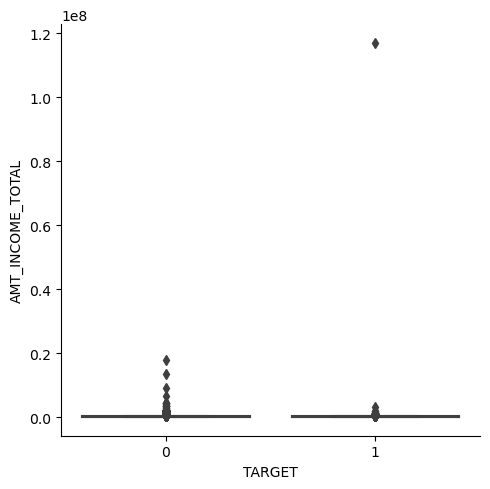

In [30]:
# BoxPlot for AMT_INCOME_TOTAL
box_plot("AMT_INCOME_TOTAL")

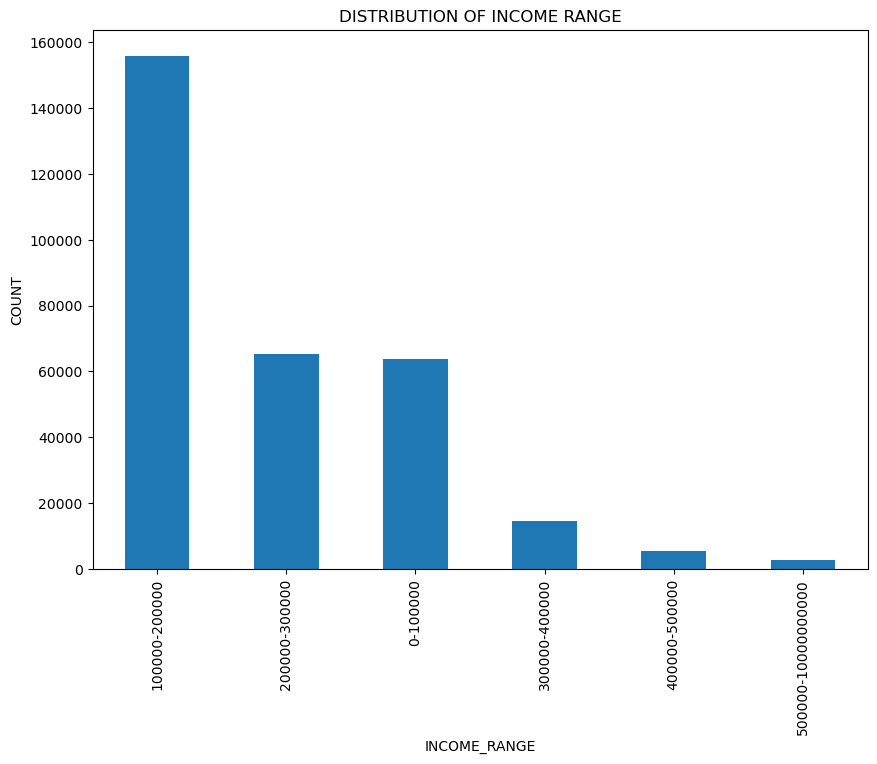

In [31]:
# Binning the AMT_INCOME_TOTAL data
plt.figure(figsize=[10,7])
data["AMT_INCOME_TOTAL_Range"] = pd.cut(data["AMT_INCOME_TOTAL"], bins= [0,100000,200000,300000,400000,500000,10000000000], labels = ["0-100000","100000-200000","200000-300000","300000-400000","400000-500000","500000-10000000000"]).value_counts().plot(kind = "bar")
plt.xlabel("INCOME_RANGE")
plt.ylabel("COUNT")
plt.title("DISTRIBUTION OF INCOME RANGE")
plt.show()

<Figure size 1000x500 with 0 Axes>

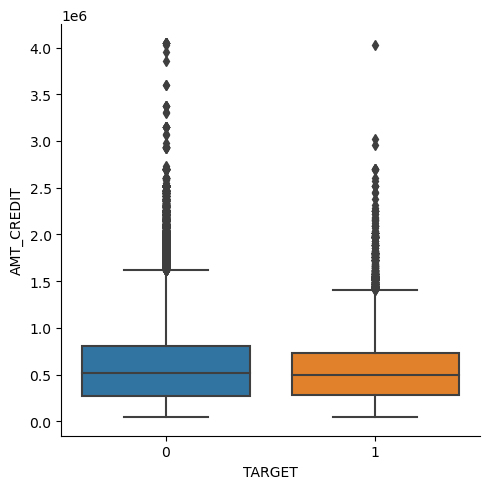

In [32]:
# BoxPlot for AMT_CREDIT
box_plot("AMT_CREDIT")

<Figure size 1000x500 with 0 Axes>

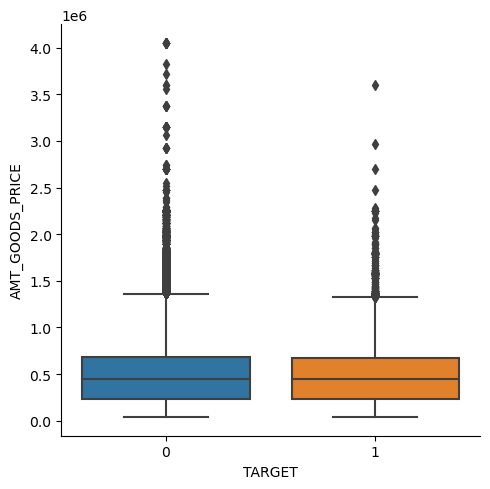

In [34]:
# BoxPlot for AMT_GOODS_PRICE
box_plot("AMT_GOODS_PRICE")

<Figure size 1000x500 with 0 Axes>

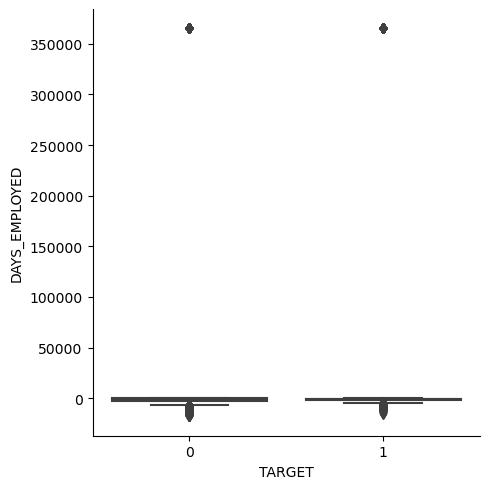

In [35]:
# BoxPlot for DAYS_EMPLOYED
box_plot("DAYS_EMPLOYED")

<Figure size 1000x500 with 0 Axes>

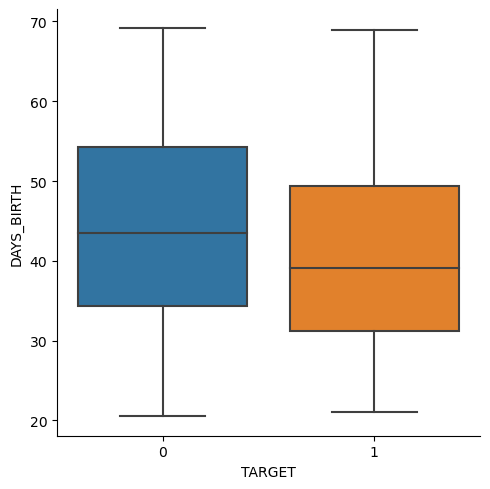

In [36]:
# BoxPlot for AMT_GOODS_PRICE
box_plot("DAYS_BIRTH")

<Figure size 1000x500 with 0 Axes>

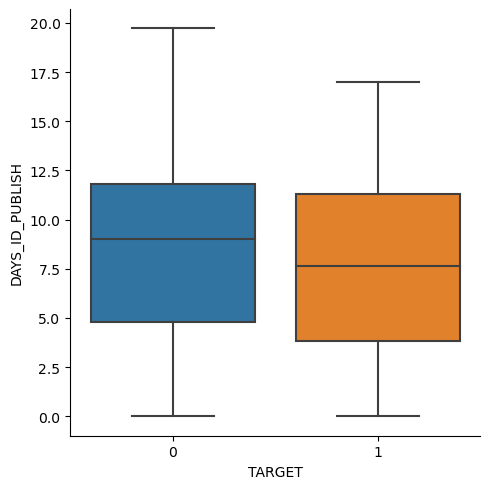

In [37]:
# BoxPlot for AMT_GOODS_PRICE
box_plot("DAYS_ID_PUBLISH")

# ANALYSING THE APPLICATION DATA


In [38]:
# Checking the data imbalance
data.TARGET.value_counts(normalize= True) 

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

# UNIVARIATE ANALYSIS OF CATAGORICAL VARIABLES

In [39]:
# Developing a function to perform efficient univariate analysis of categorical variables:
def bar_plot(Attribute, hori = True, rot = False):
    variable = data[Attribute].value_counts(normalize = True)
    Variable_Data_Percentage = data.groupby(data[Attribute]).mean()
    Variable_Data_plot = Variable_Data_Percentage['TARGET']
    if hori:
        plt.figure(figsize=[15,7])
        plt.subplot(1,2,1)
        sns.barplot(x = variable.index, y = variable.values, palette= 'magma')
        plt.xlabel(Attribute)
        plt.ylabel("Percentage of Applicants")
        if rot:
            plt.xticks(rotation = 90)    
        plt.subplot(1,2,2)
        sns.barplot(x = Variable_Data_plot.index, y = Variable_Data_plot.values, palette= 'magma')
        plt.xlabel(Attribute)
        plt.ylabel("Percentage of clients having difficulty in repaying loan")
        if rot:
            plt.xticks(rotation = 90)
        plt.show()
    else:
        plt.figure(figsize=[14,20])
        plt.subplot(2,1,1)
        sns.barplot(x = variable.index, y = variable.values, palette= 'magma')
        plt.xlabel(Attribute)
        plt.ylabel("Percentage of Applicants")
        if rot:
            plt.xticks(rotation = 90)
        
        plt.subplot(2,1,2)
        sns.barplot(x =  Variable_Data_plot.index, y =  Variable_Data_plot.values, palette= 'magma')
        plt.xlabel(Attribute)
        plt.ylabel("Percentage of clients having difficulty in repaying loan")
        if rot:
            plt.xticks(rotation = 90)
        plt.show()

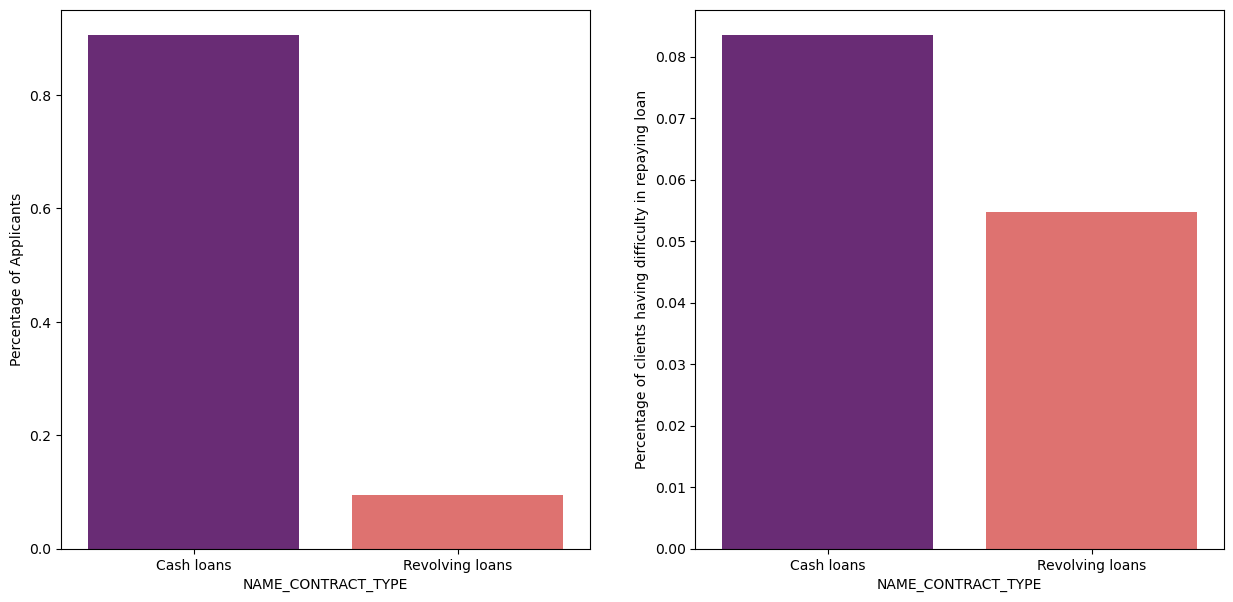

In [40]:
# BarPlots for NAME_CONTRACT_TYPE
bar_plot("NAME_CONTRACT_TYPE")

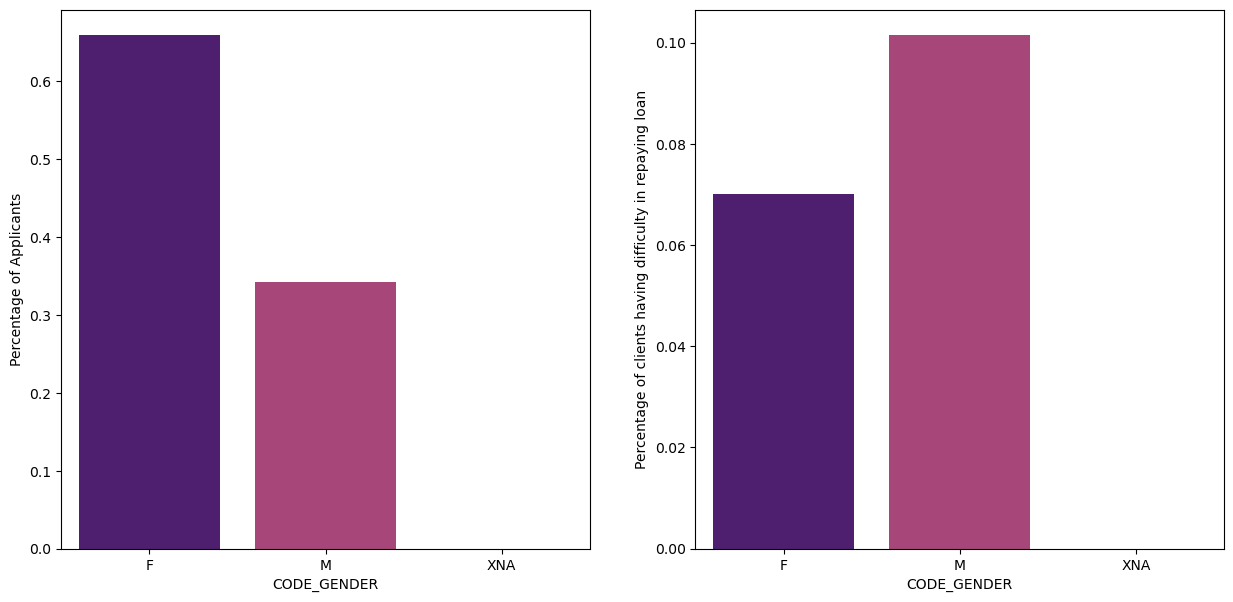

In [41]:
# BarPlots for CODE_GENDER
bar_plot('CODE_GENDER')


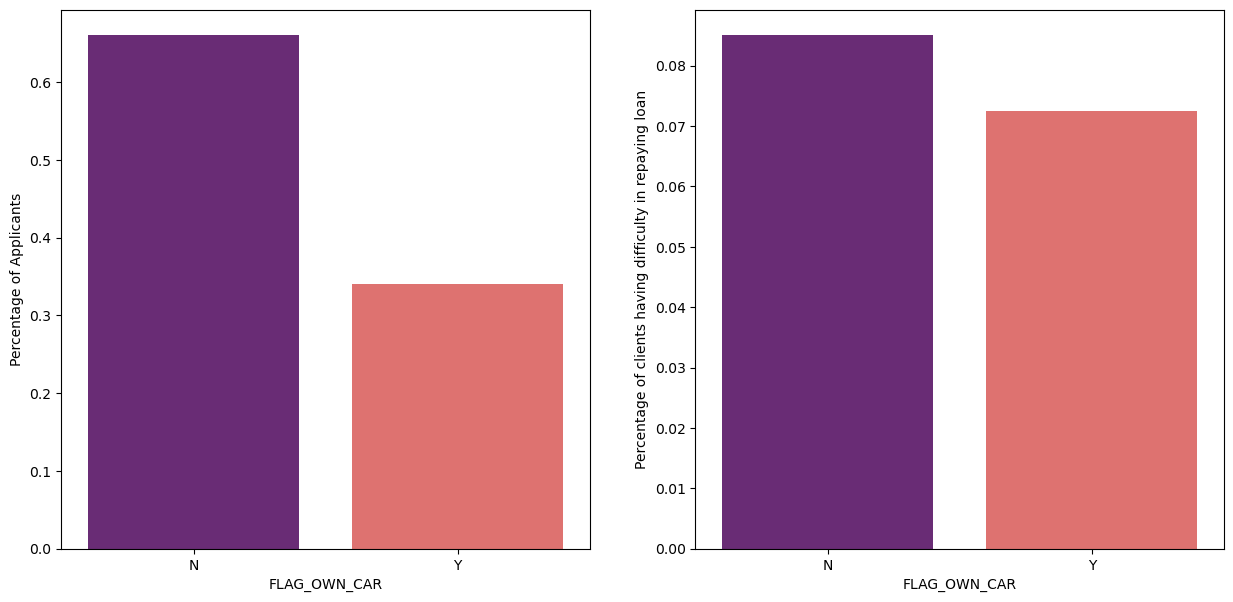

In [42]:
# BarPlots for FLAG_OWN_CAR
bar_plot("FLAG_OWN_CAR")

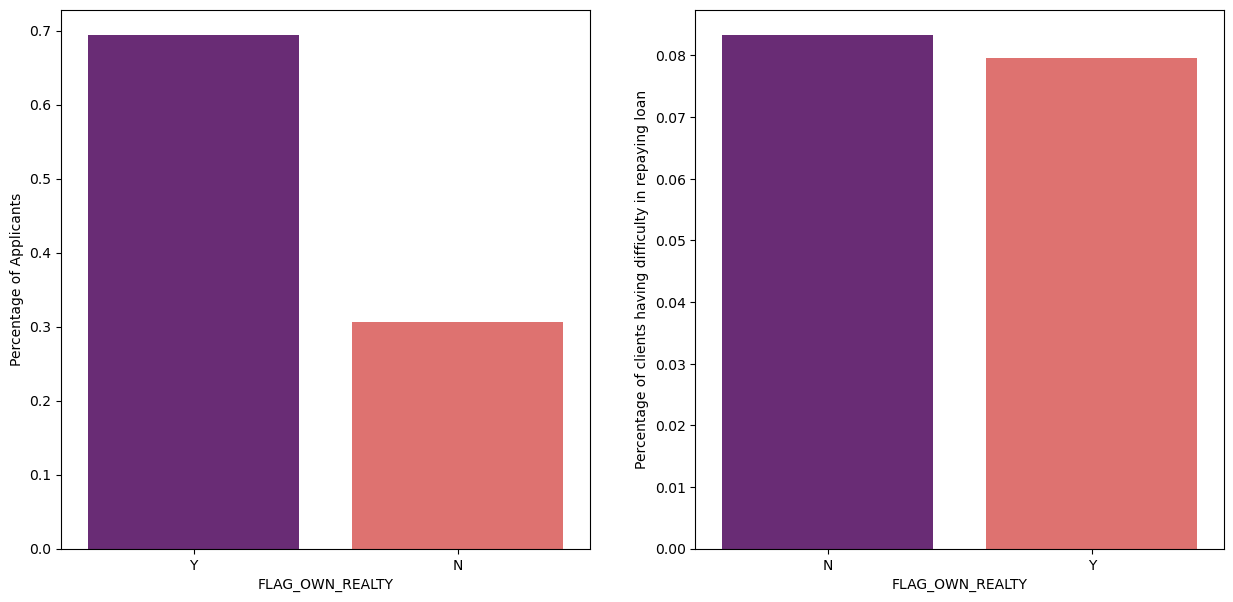

In [43]:

# BarPlots for FLAG_OWN_REALTY
bar_plot("FLAG_OWN_REALTY")

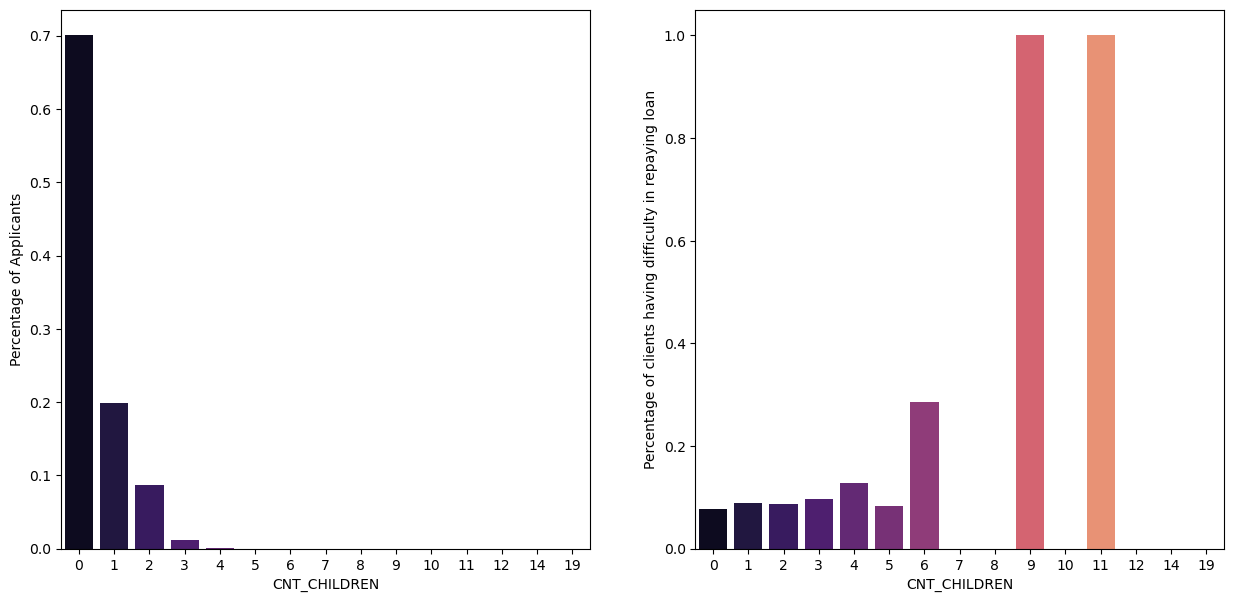

In [44]:
# BarPlots for CNT_CHILDREN
bar_plot("CNT_CHILDREN")

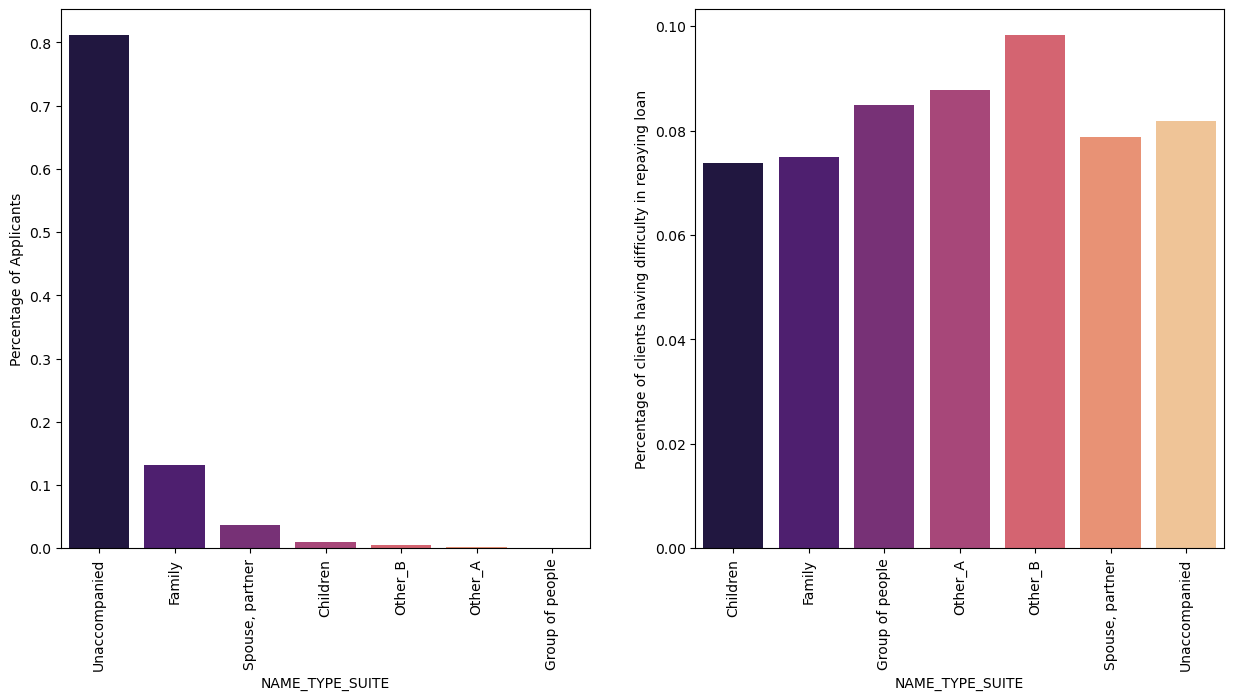

In [45]:
# BarPlots for NAME_TYPE_SUITE
bar_plot("NAME_TYPE_SUITE", rot = True)

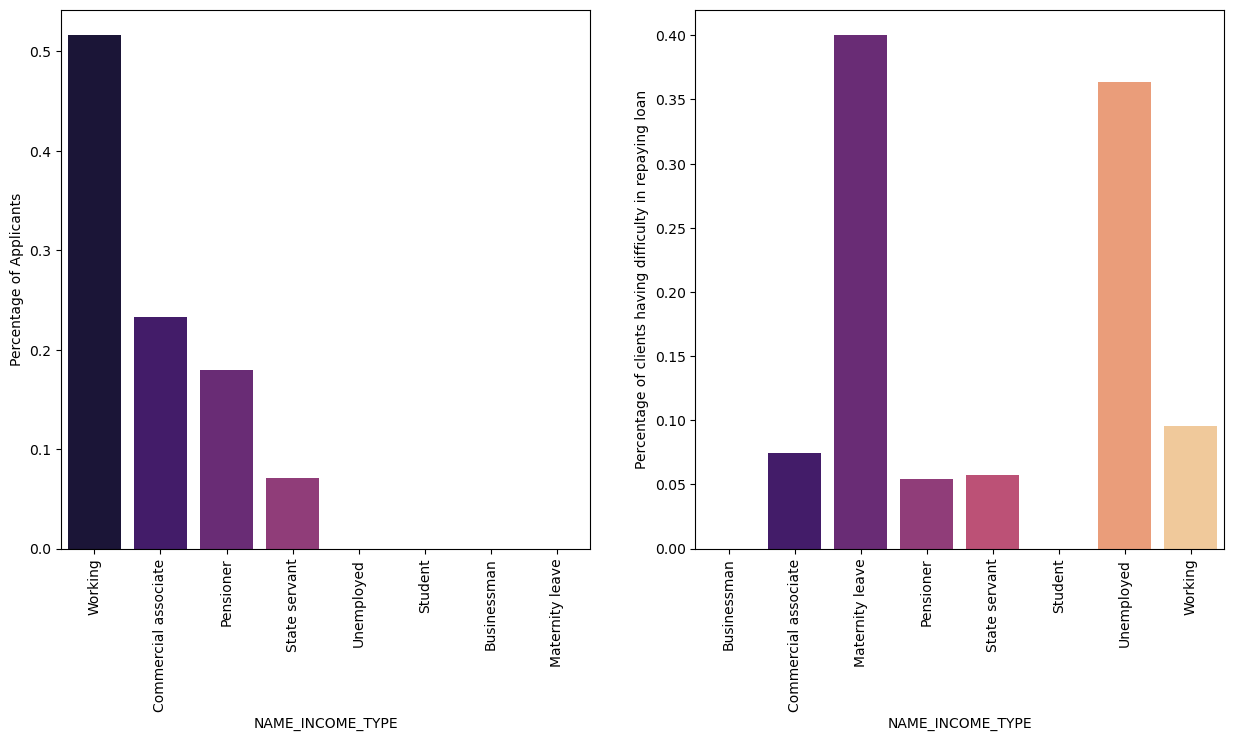

In [46]:
# BarPlots for NAME_INCOME_TYPE
bar_plot("NAME_INCOME_TYPE", rot = True)

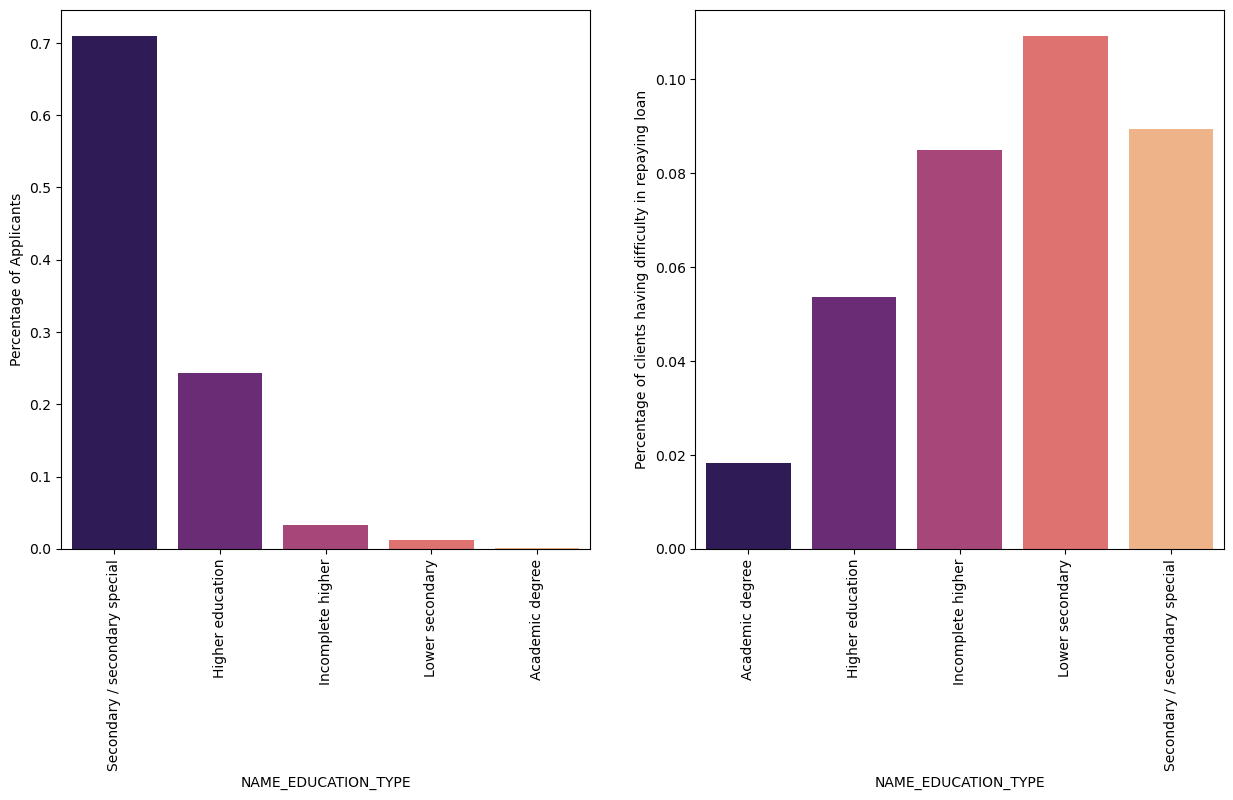

In [47]:
# BarPlots for NAME_EDUCATION_TYPE
bar_plot("NAME_EDUCATION_TYPE", rot = True)

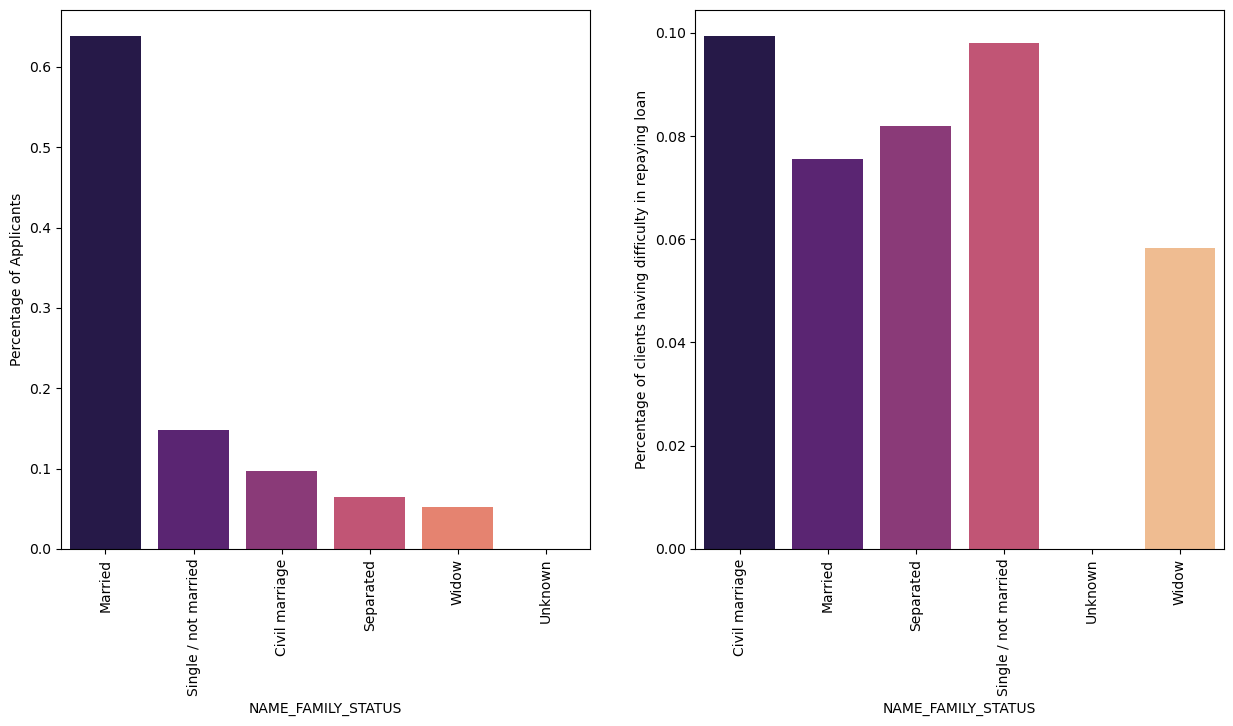

In [48]:
# BarPlots for NAME_FAMILY_STATUS
bar_plot("NAME_FAMILY_STATUS", rot = True)

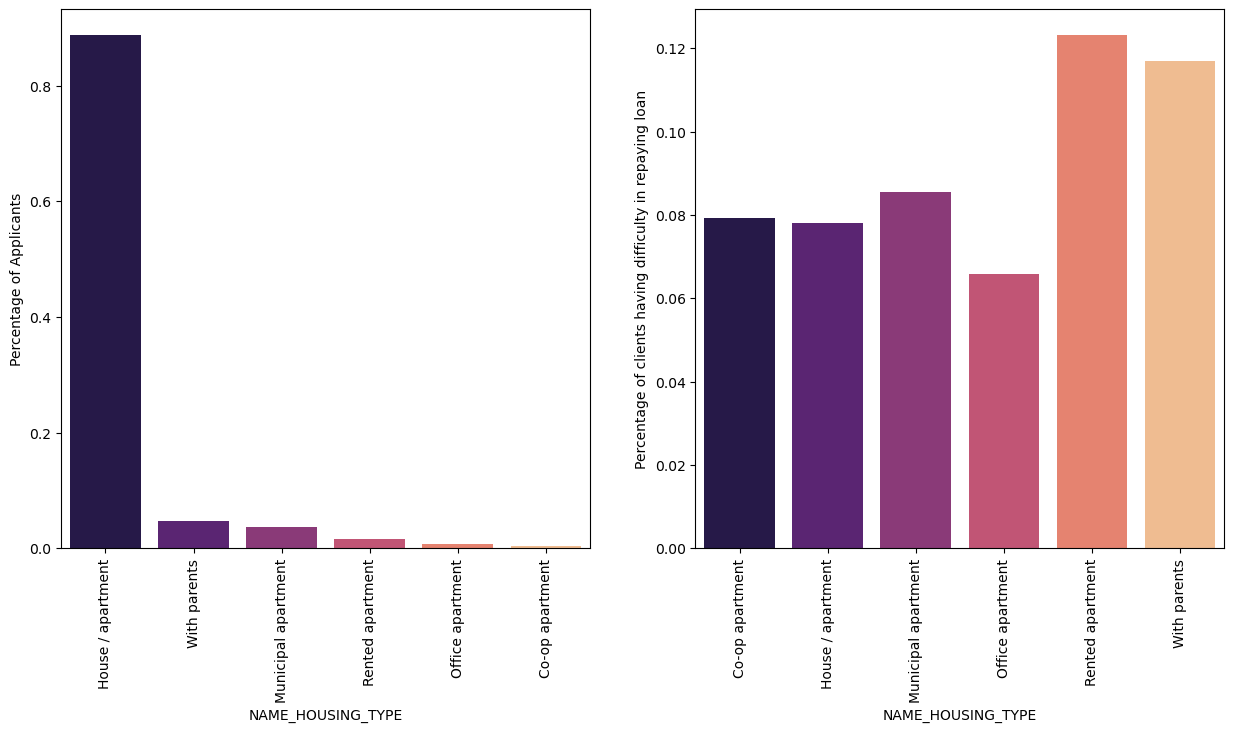

In [49]:
# BarPlots for NAME_HOUSING_TYPE
bar_plot("NAME_HOUSING_TYPE", rot = True)

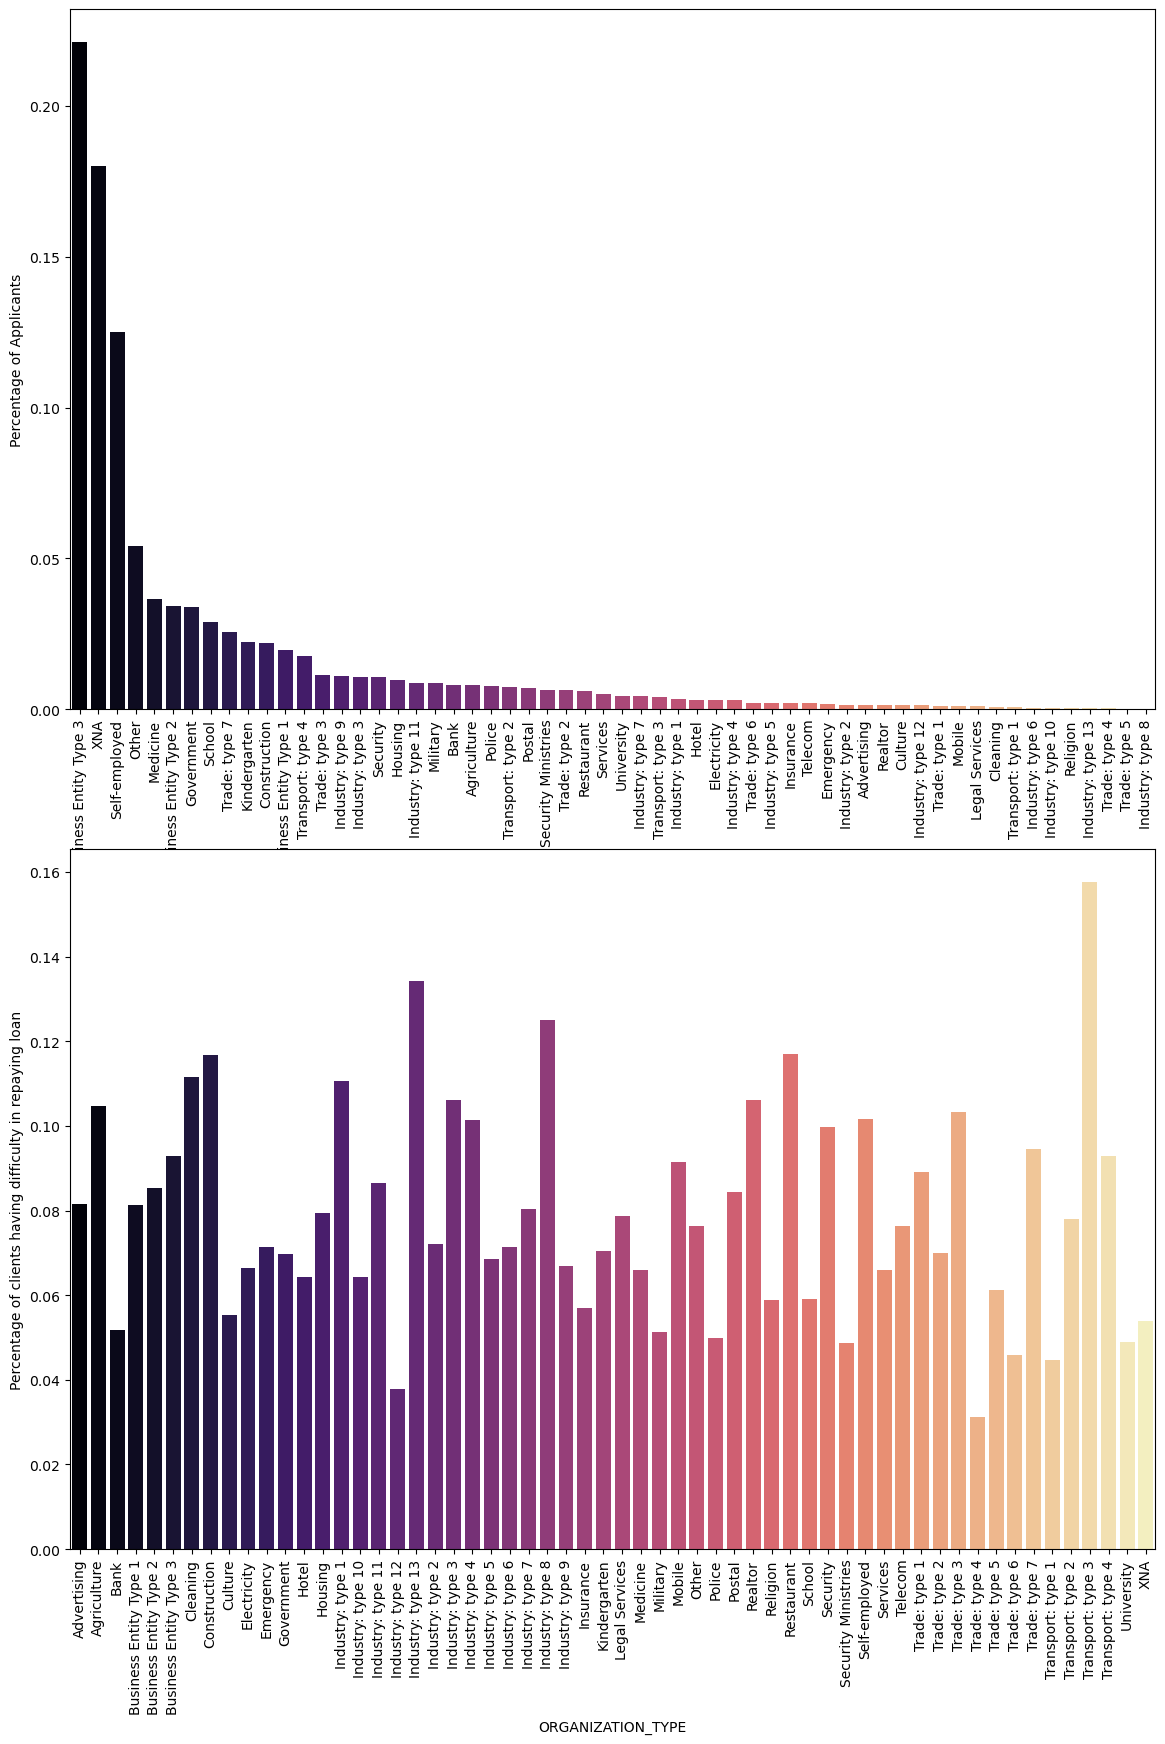

In [50]:
# BarPlots for ORGANIZATION_TYPE
bar_plot("ORGANIZATION_TYPE",hori=False, rot = True)

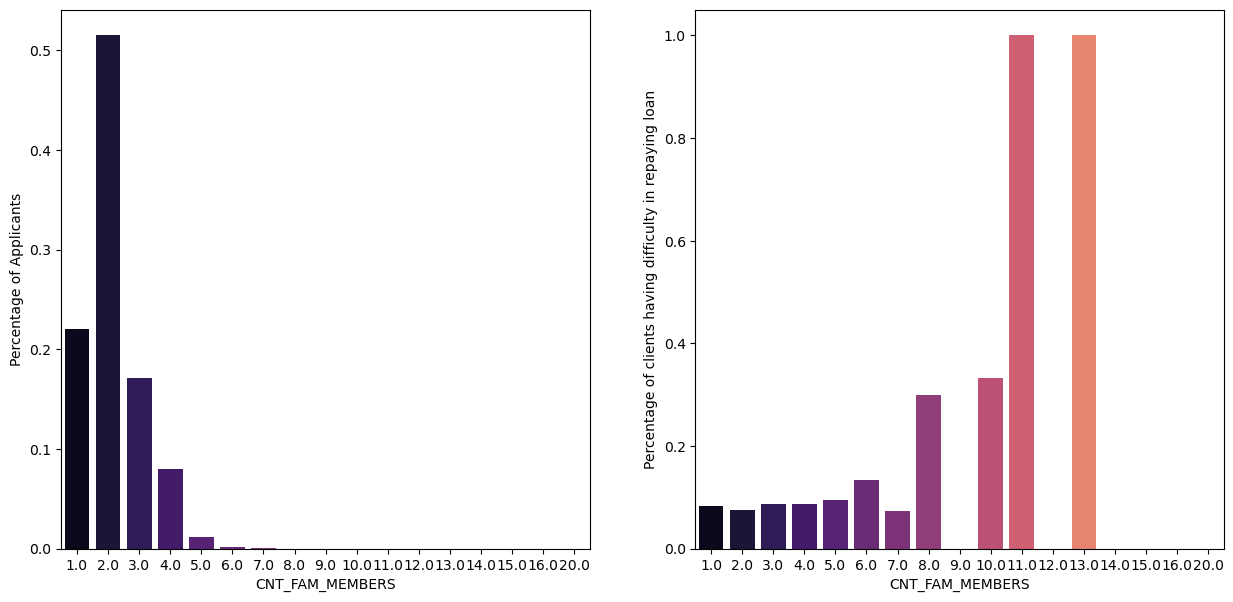

In [51]:
# BarPlots for CNT_FAM_MEMBERS
bar_plot("CNT_FAM_MEMBERS")

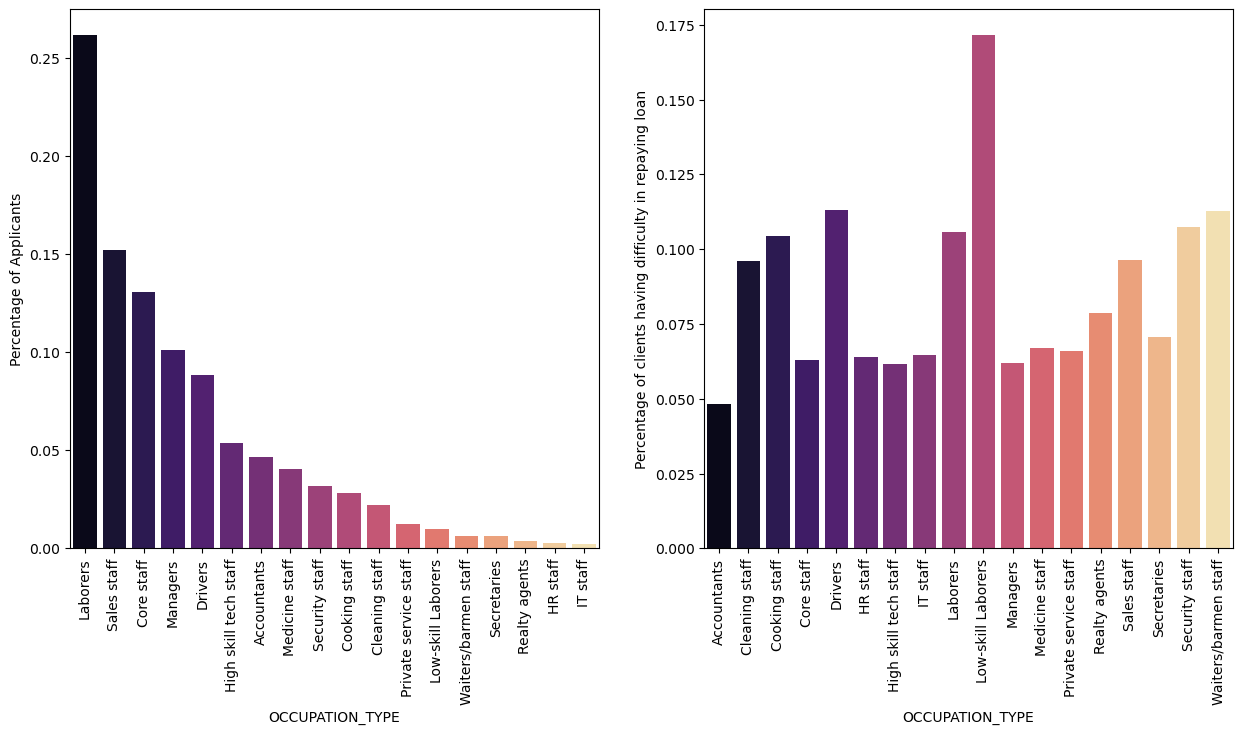

In [52]:
# BarPlots for OCCUPATION_TYPE
bar_plot("OCCUPATION_TYPE", rot = True)

# UNIVARIATE ANALYSIS OF CONTINUOUS VARIABLES


In [53]:
# Segmenting the data based on the TARGET variable
target_0 = data.loc[data['TARGET'] == 0]
target_1 = data.loc[data['TARGET'] == 1]

In [54]:
# Developing a function to analyse continuous variables
def distribution_plot(Attribute):

    plt.figure(figsize = [15,7])
    plt.subplot(1,2,1)
    sns.distplot(data[Attribute], bins= 50, kde= True, rug = True, hist = False)
    plt.ylabel("Frequency")
    plt.subplot(1,2,2)
    sns.distplot(target_0[Attribute], bins = 50, kde = True, rug= True, hist = False, label = 'TARGET = 0')
    sns.distplot(target_1[Attribute], bins = 50, kde = True, rug = True, hist = False, label= 'TARGET = 1')
    plt.ylabel("Frequency")
    plt.show()

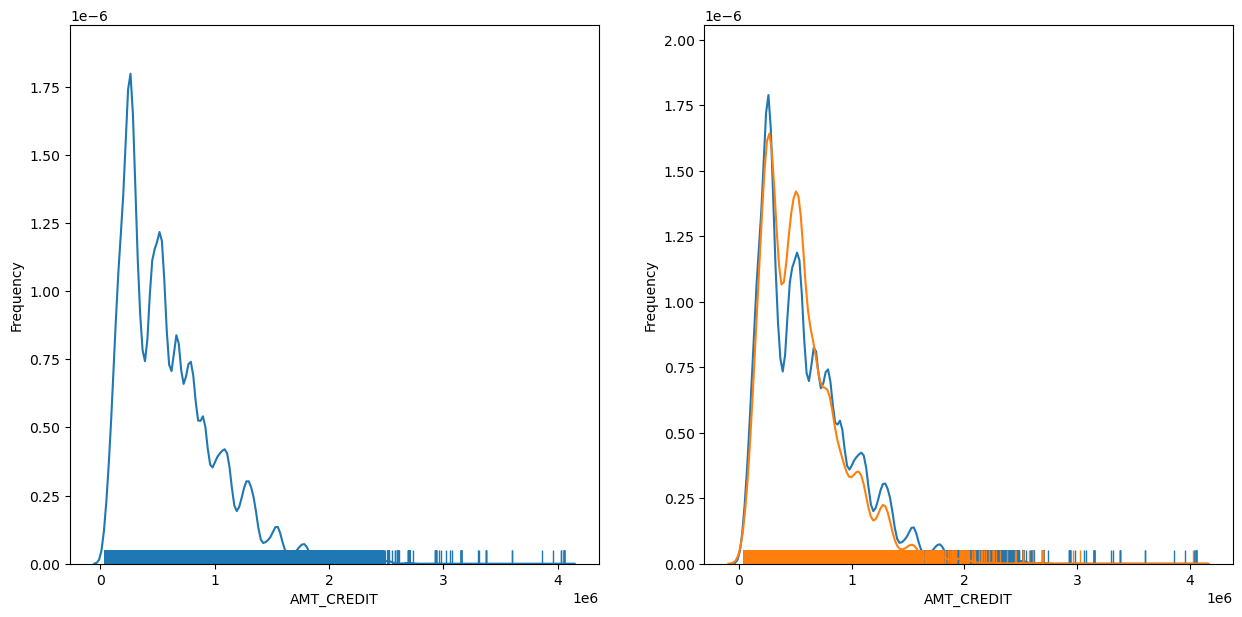

In [55]:
# DistPlots for AMT_CREDIT 
distribution_plot('AMT_CREDIT')

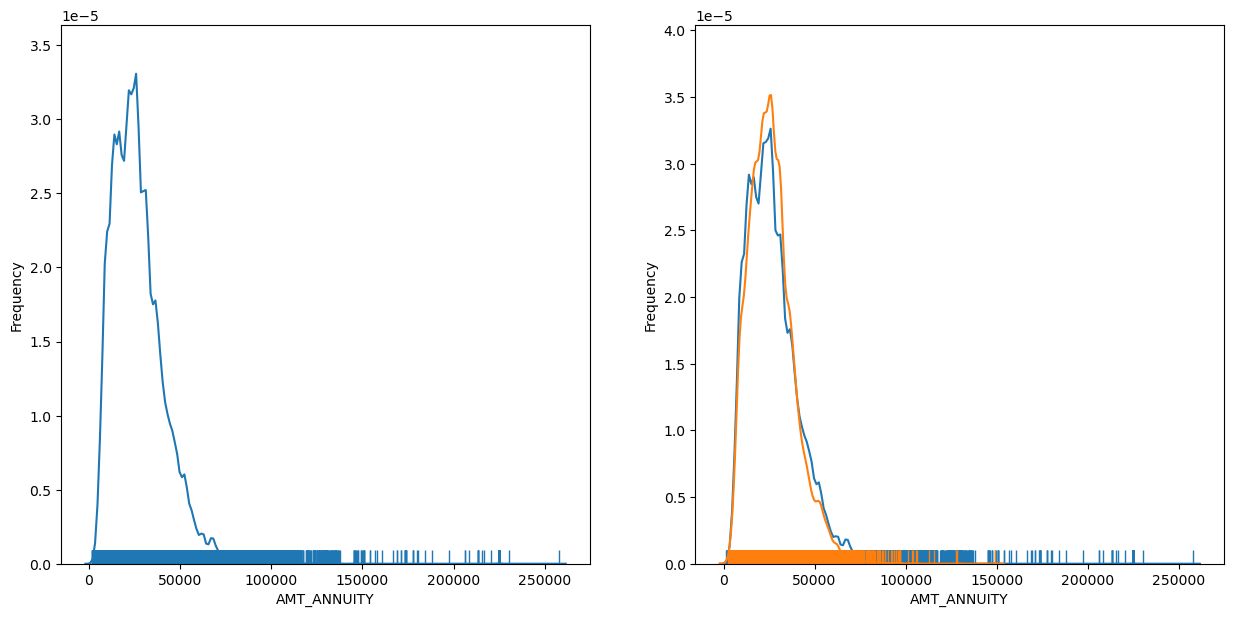

In [61]:
# DistPlots for AMT_ANNUITY 
distribution_plot('AMT_ANNUITY')

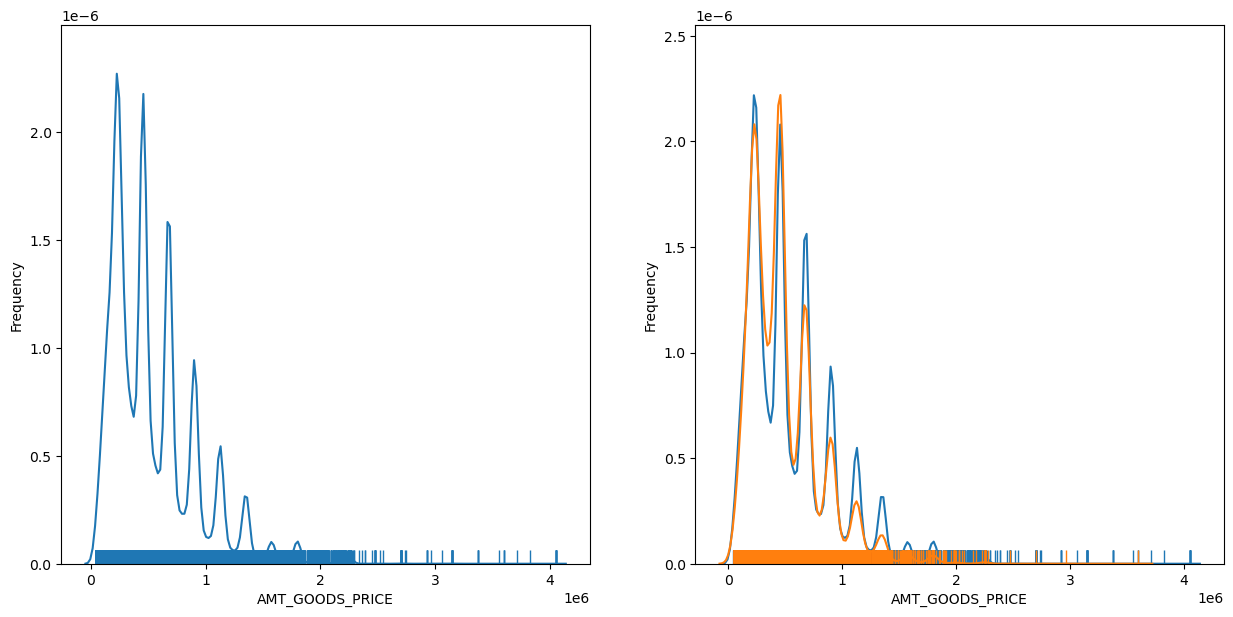

In [62]:
# DistPlots for AMT_GOODS_PRICE 
distribution_plot("AMT_GOODS_PRICE")

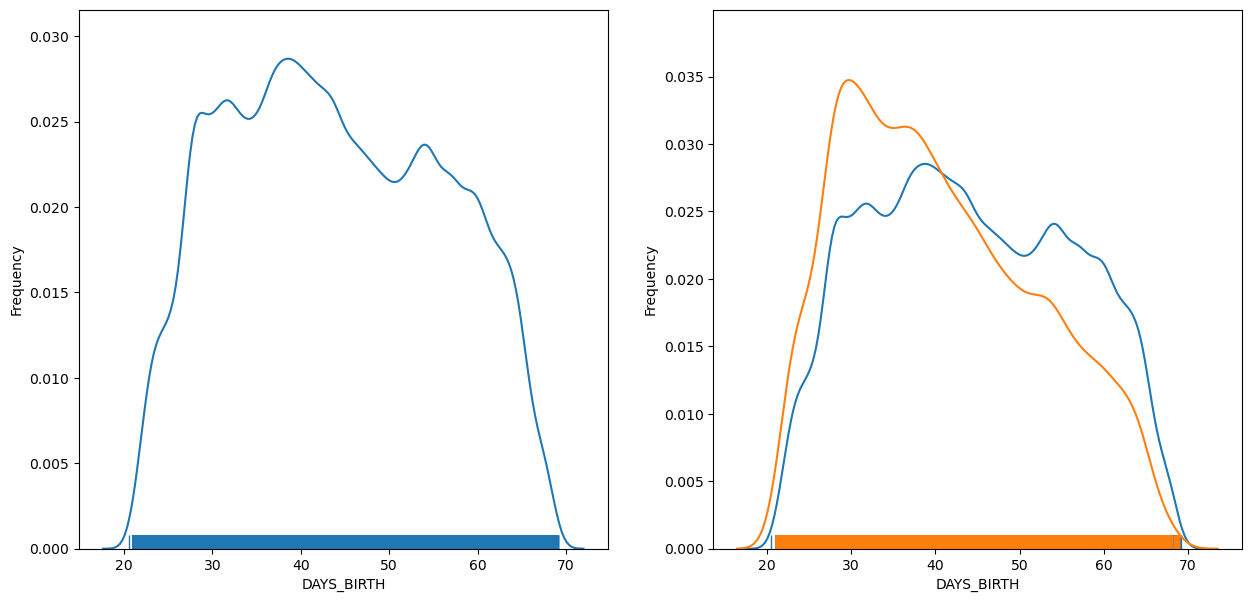

In [63]:
# DistPlots for DAYS_BIRTH 
distribution_plot("DAYS_BIRTH")

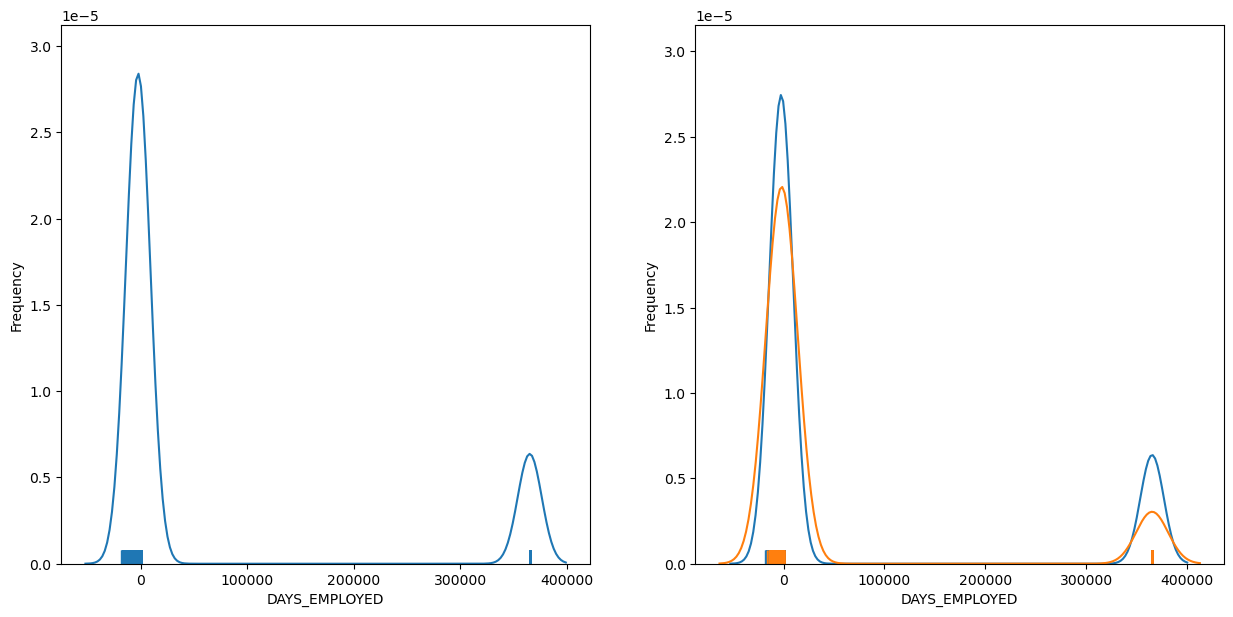

In [64]:
# DistPlots for DAYS_EMPLOYED 
distribution_plot("DAYS_EMPLOYED")

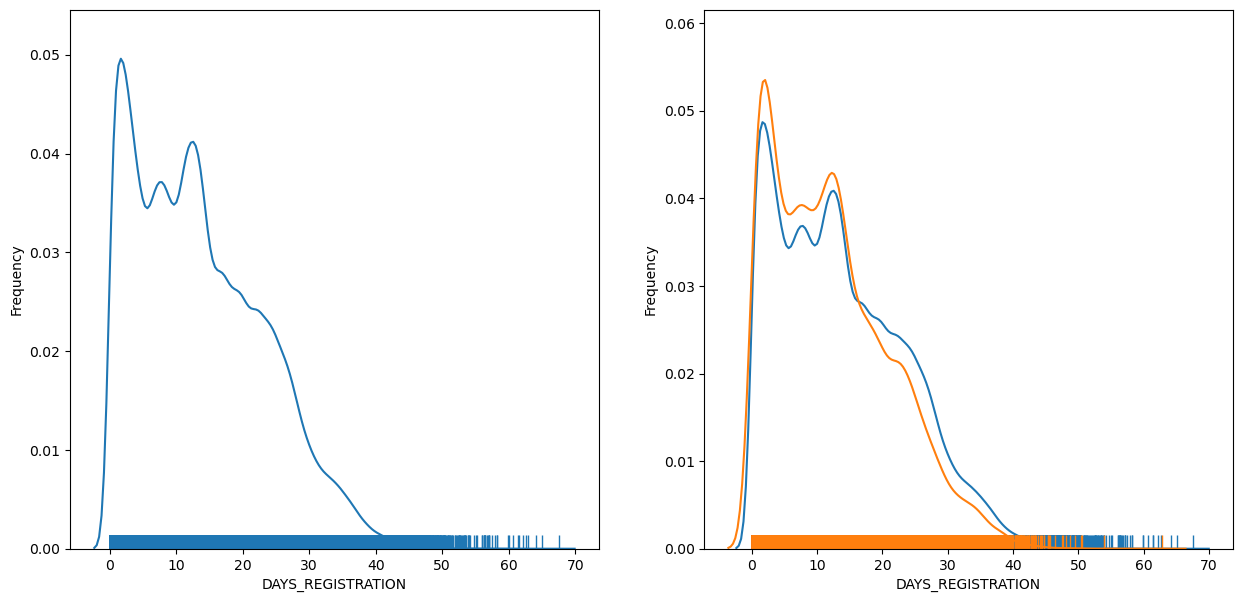

In [65]:
# DistPlots for DAYS_REGISTRATION 
distribution_plot('DAYS_REGISTRATION')

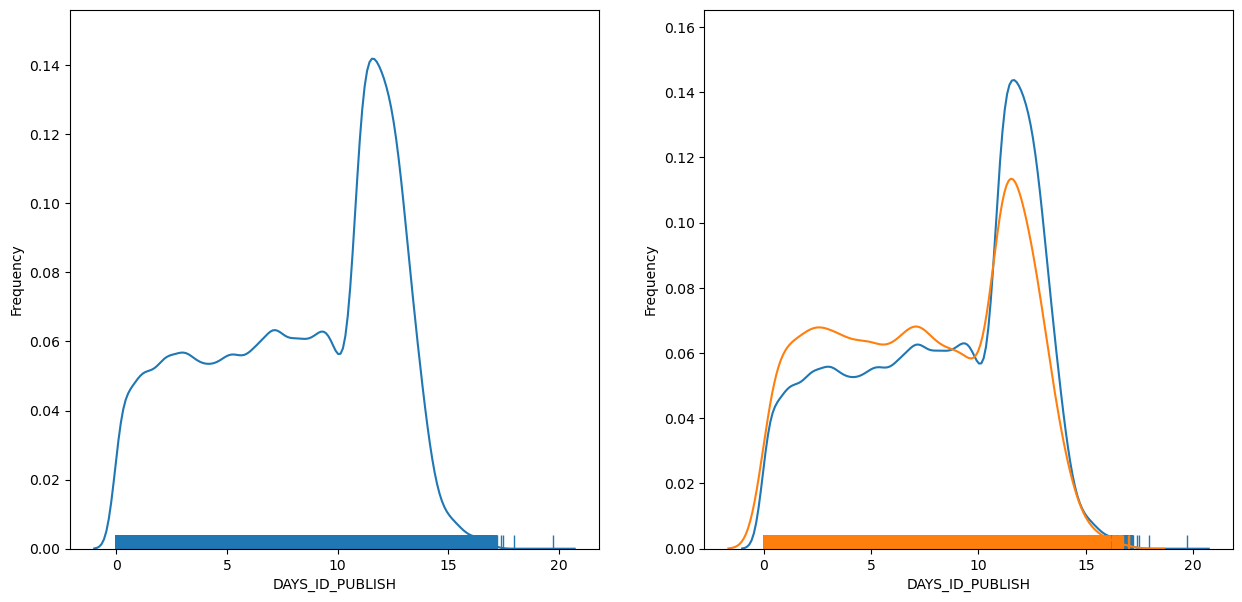

In [66]:
# DistPlots for DAYS_ID_PUBLISH 
distribution_plot("DAYS_ID_PUBLISH")

# BIVARIATE ANALYSIS
NUMERICAL TO NUMERICAL ANALYSIS


In [67]:
##Defining new data frame for numeric-numeric analysis
data_T1 = data[data["TARGET"] == 1]
data_T0 = data[data['TARGET'] == 0]
data_numeric_corr_T0 = data_T0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]].corr()
data_numeric_corr_T1 = data_T1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_POPULATION_

SyntaxError: EOL while scanning string literal (1049074397.py, line 5)

In [69]:
##Defining new data frame for numeric-numeric analysis
data_T1 = data[data["TARGET"] == 1]
data_T0 = data[data['TARGET'] == 0]
data_numeric_corr_T0 = data_T0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]].corr()
data_numeric_corr_T1 = data_T1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]].corr()

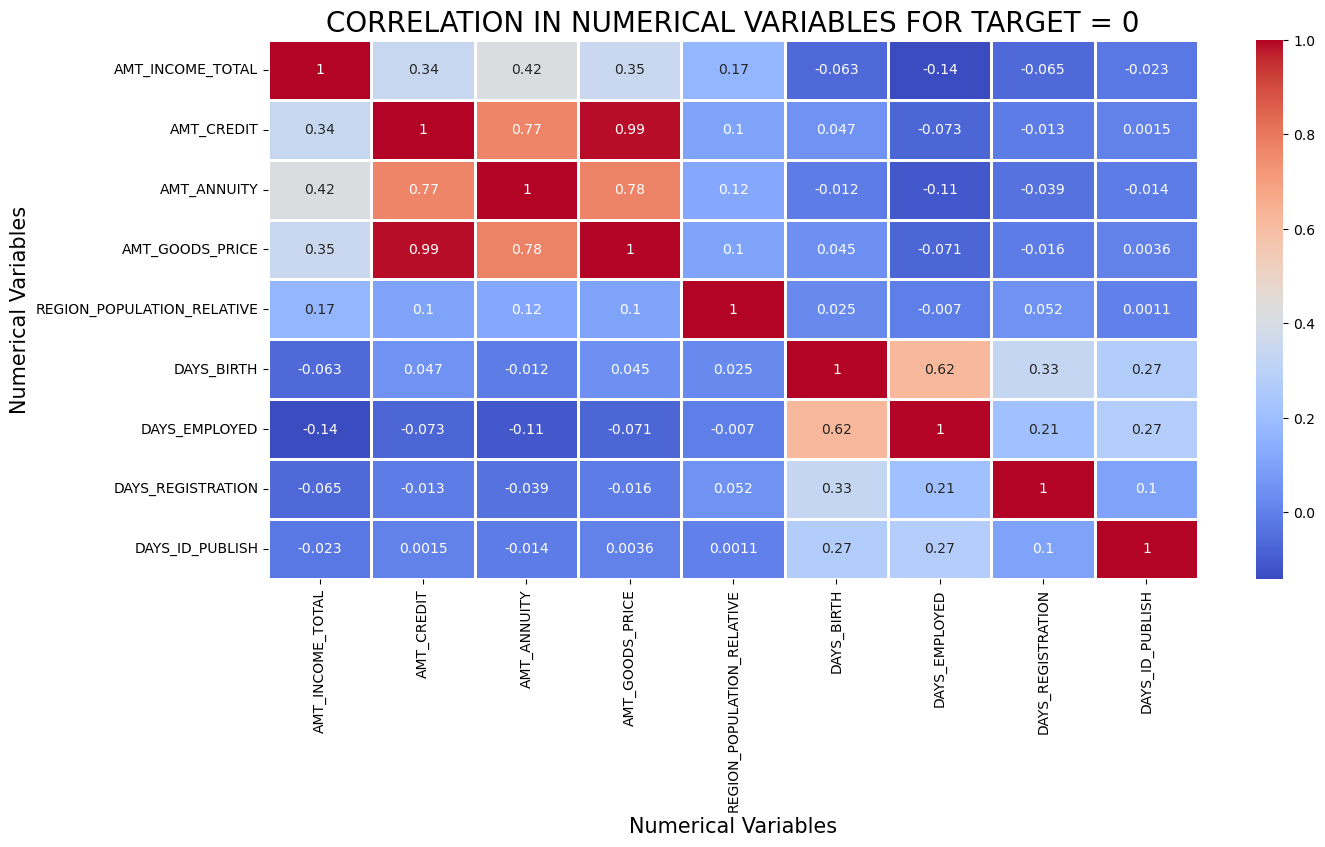

In [70]:
# Heatmap to visualize the correlation between numeric variables for TARGET = 0 
plt.figure(figsize = [15,7])
sns.heatmap(data_numeric_corr_T0, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Numerical Variables", fontdict={"fontsize": 15})
plt.ylabel("Numerical Variables", fontdict={"fontsize": 15})
plt.title("CORRELATION IN NUMERICAL VARIABLES FOR TARGET = 0",fontdict={"fontsize": 20} )
plt.show()

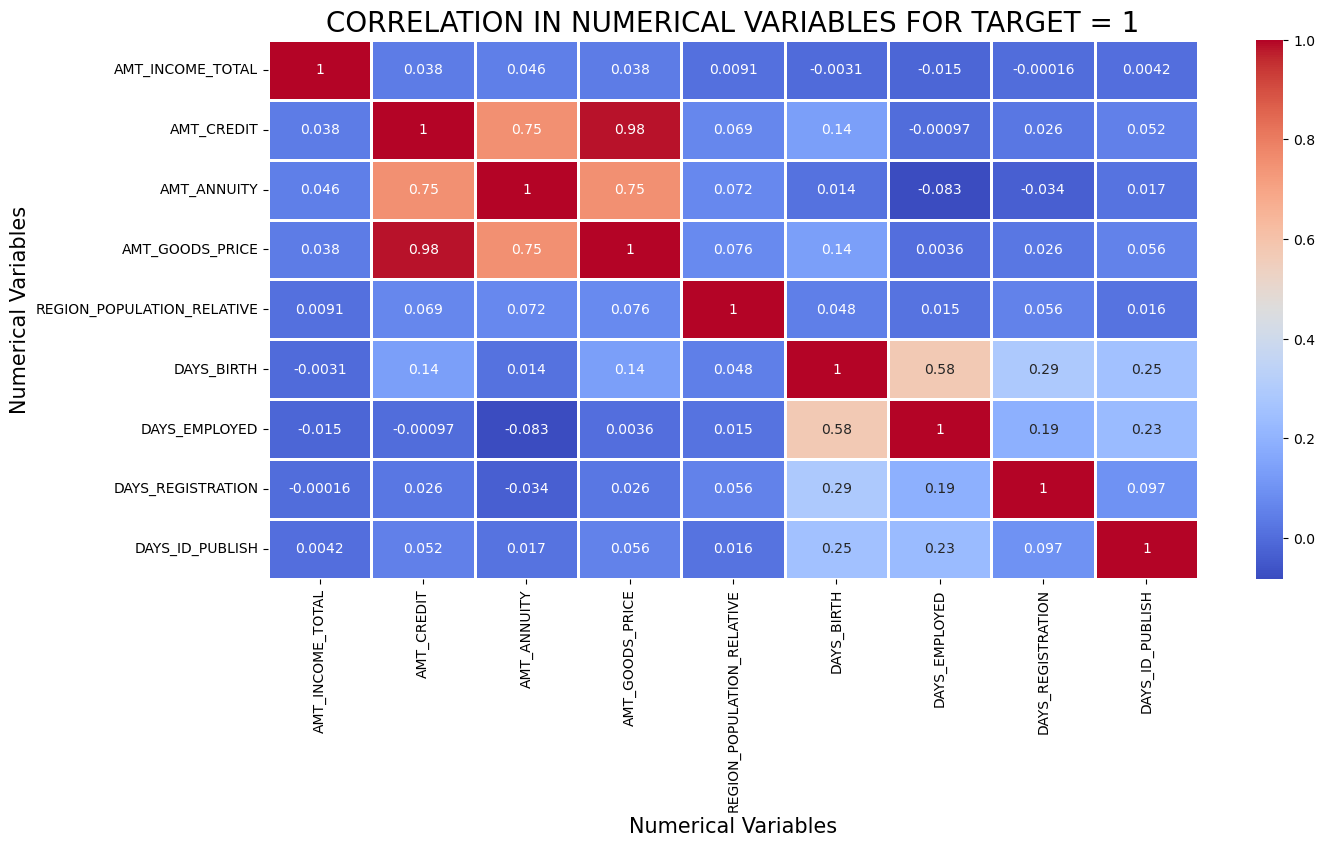

In [71]:
# Heatmap to visualize the correlation between numeric variables for TARGET = 1
plt.figure(figsize = [15,7])
sns.heatmap(data_numeric_corr_T1, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Numerical Variables", fontdict={"fontsize": 15})
plt.ylabel("Numerical Variables", fontdict={"fontsize": 15})
plt.title("CORRELATION IN NUMERICAL VARIABLES FOR TARGET = 1",fontdict={"fontsize": 20} )
plt.show()

# NUMERICAL TO CATEGORICAL ANALYSIS


In [72]:
#Defining a function for numerical-categorical variable analysis
def NUMCAT_ANALYSIS(CATVAR, NUMVAR, rot = False):
    
    plt.figure(figsize=[15,7])
    if rot:
        plt.xticks(rotation = 90)
    sns.boxplot(data = data, x=CATVAR, y= NUMVAR, hue = "TARGET")

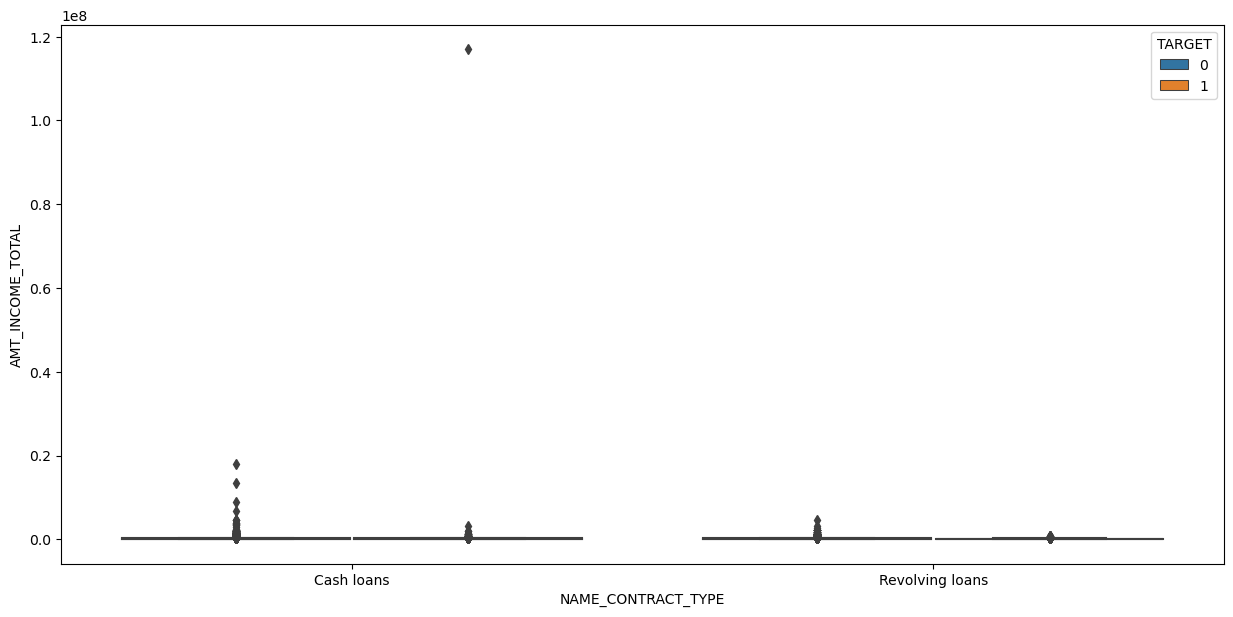

In [73]:
# BoxPlots for NAME_CONTRACT_TYPE vs AMT_INCOME_TOTAL
NUMCAT_ANALYSIS("NAME_CONTRACT_TYPE","AMT_INCOME_TOTAL" )

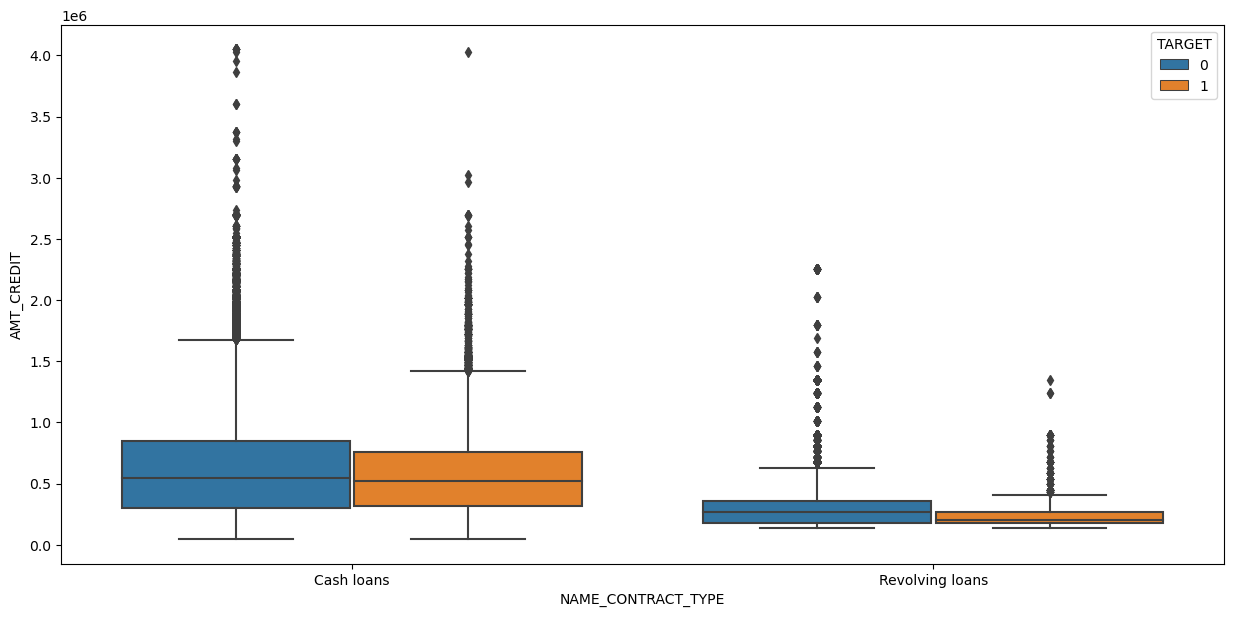

In [74]:
# BoxPlots for NAME_CONTRACT_TYPE vs AMT_CREDIT
NUMCAT_ANALYSIS("NAME_CONTRACT_TYPE","AMT_CREDIT" )

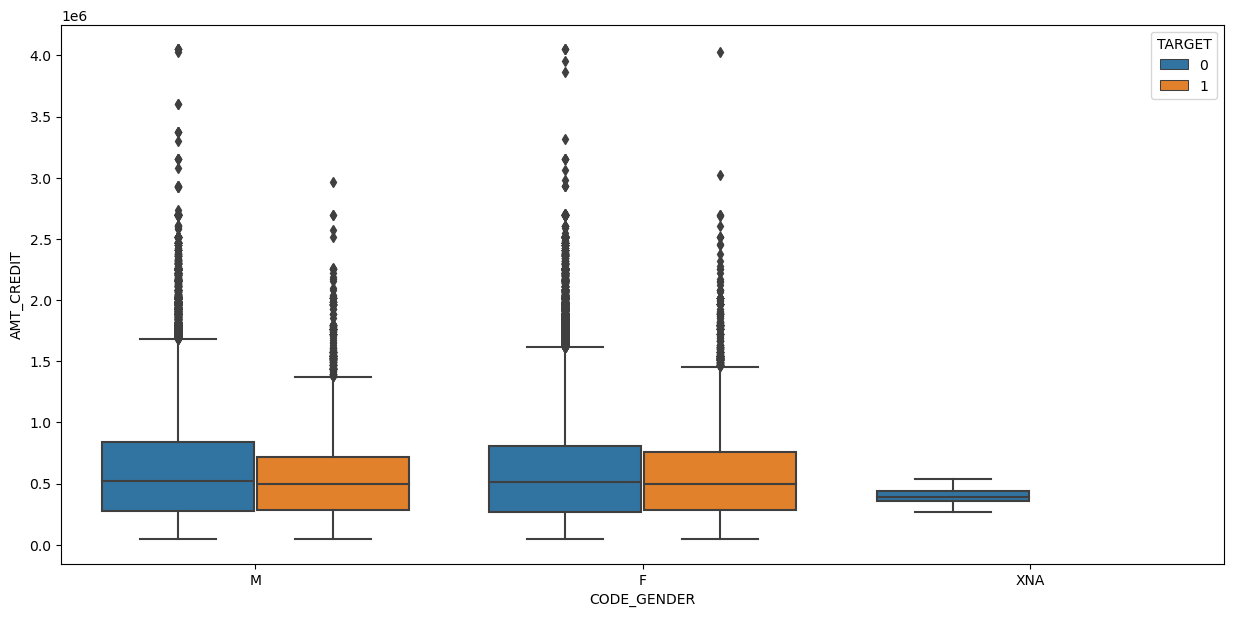

In [75]:
# BoxPlots for CODE_GENDER vs AMT_CREDIT
NUMCAT_ANALYSIS("CODE_GENDER", "AMT_CREDIT")

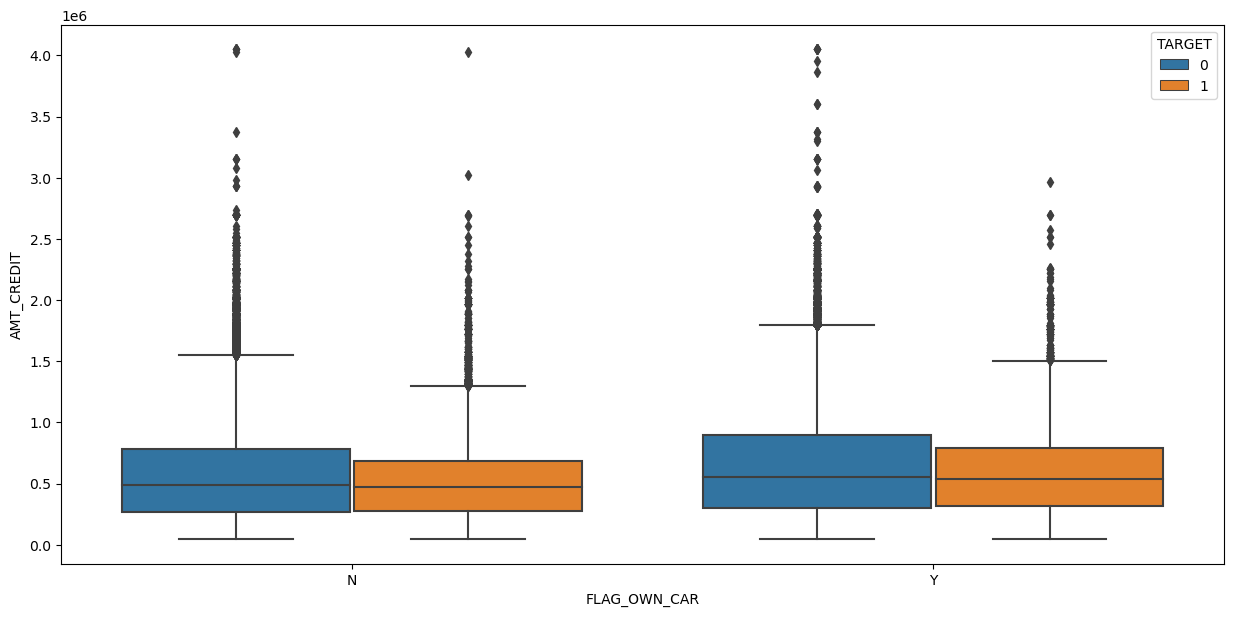

In [76]:
# BoxPlots for FLAG_OWN_CAR vs AMT_CREDIT
NUMCAT_ANALYSIS("FLAG_OWN_CAR", "AMT_CREDIT")


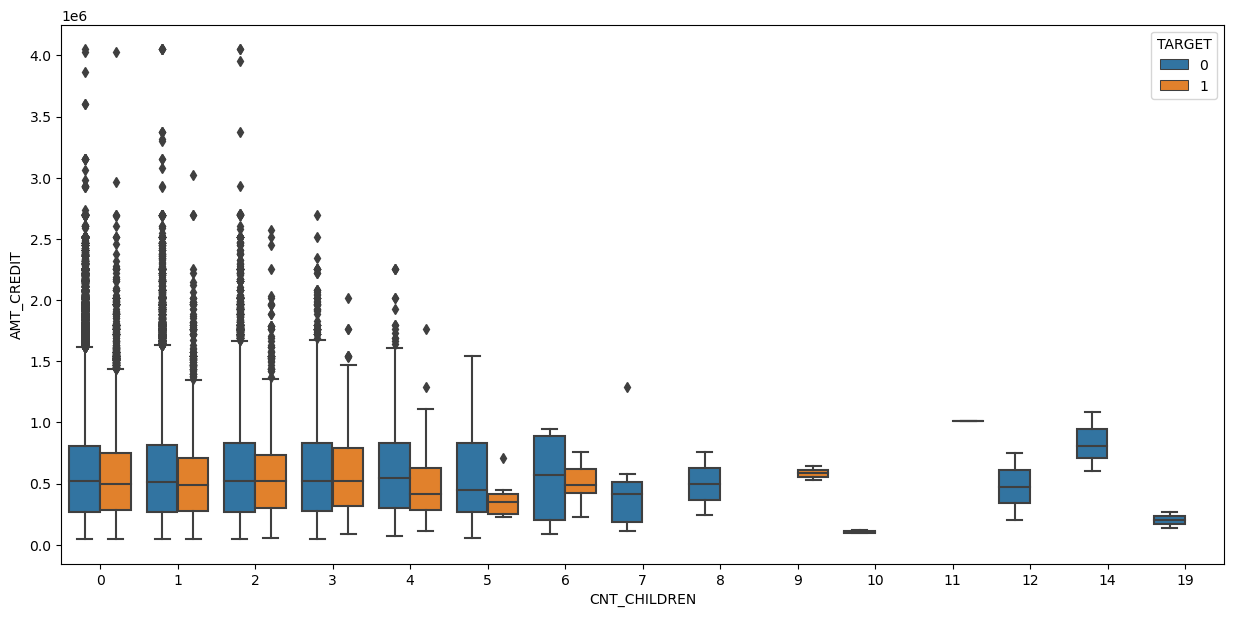

In [77]:
# BoxPlots for CNT_CHILDREN vs AMT_CREDIT
NUMCAT_ANALYSIS("CNT_CHILDREN", "AMT_CREDIT")

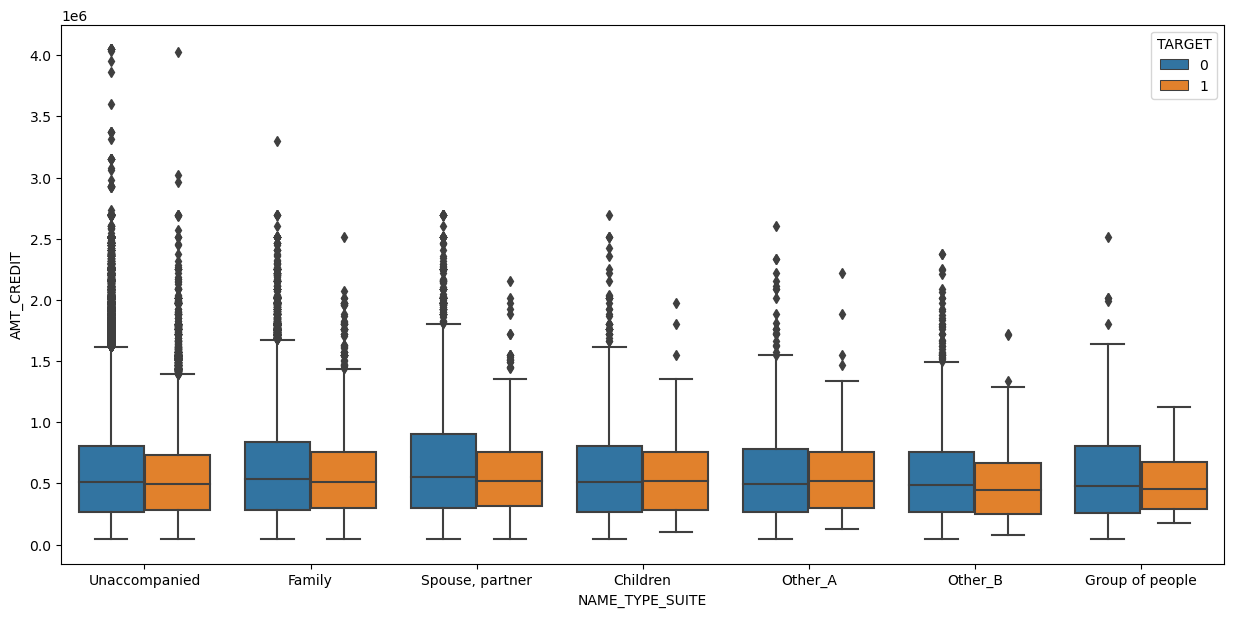

In [78]:
# BoxPlots for NAME_TYPE_SUITE vs AMT_CREDIT
NUMCAT_ANALYSIS("NAME_TYPE_SUITE","AMT_CREDIT" )

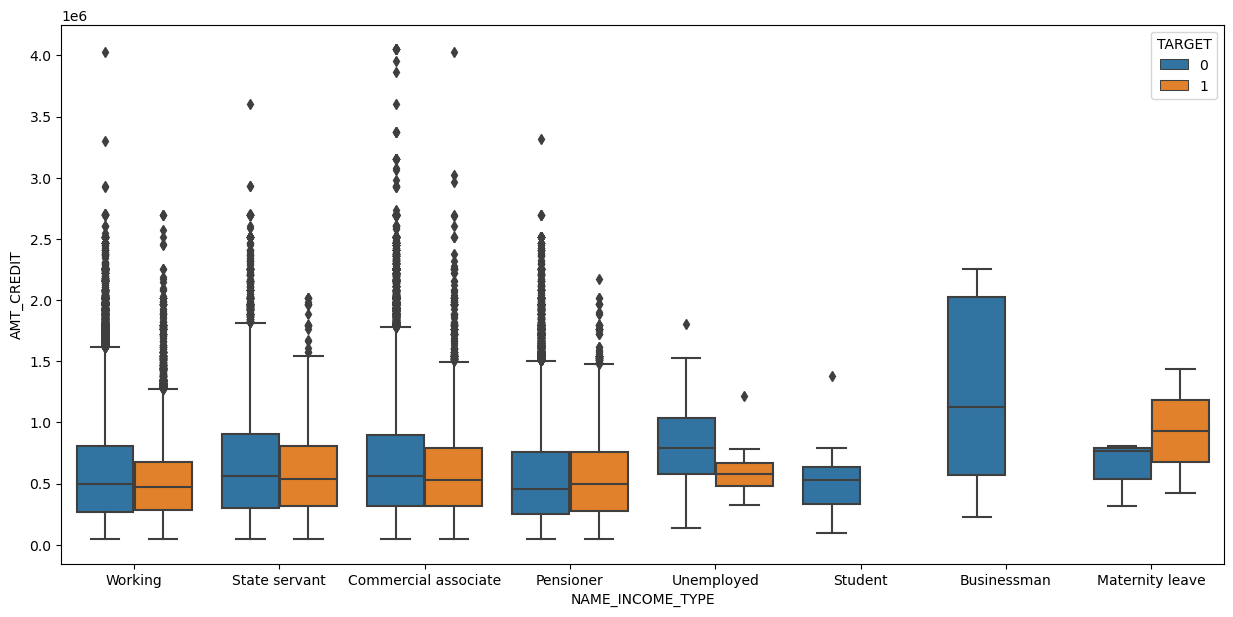

In [79]:
# BoxPlots for NAME_INCOME_TYPE vs AMT_CREDIT
NUMCAT_ANALYSIS("NAME_INCOME_TYPE", "AMT_CREDIT")

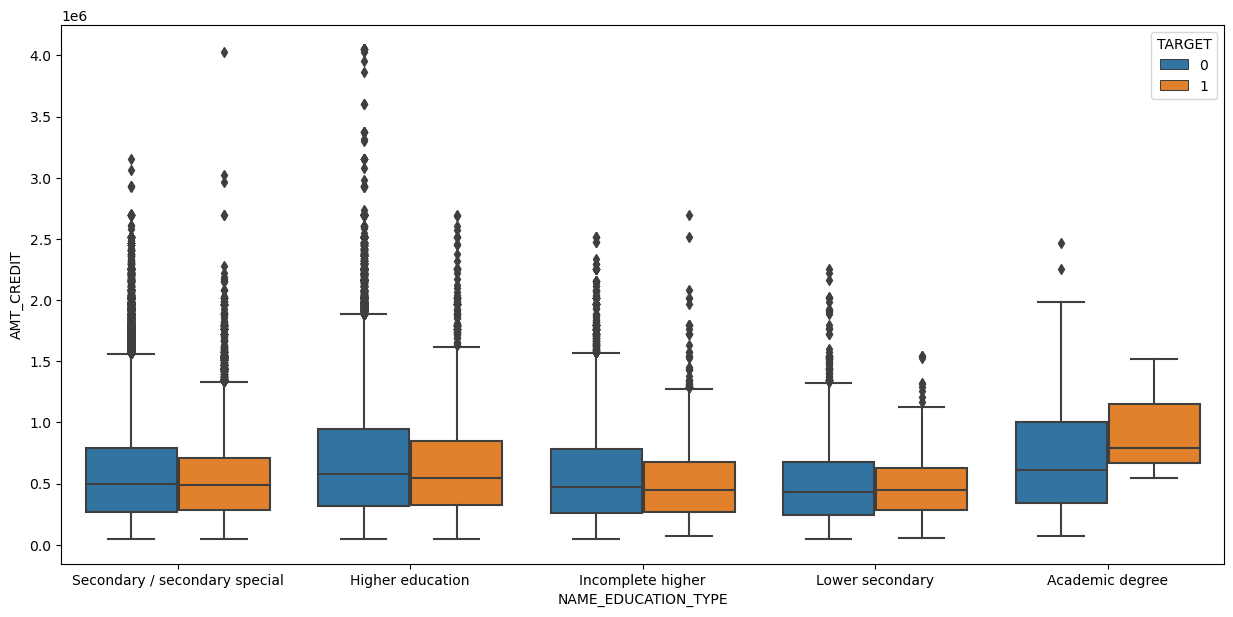

In [80]:
# BoxPlots for NAME_EDUCATION_TYPE vs AMT_CREDIT
NUMCAT_ANALYSIS("NAME_EDUCATION_TYPE", "AMT_CREDIT")

# CATEGORICAL TO CATEGORICAL VARIABLE ANALYSIS

In [81]:
# Creating a list of important categorical variables for our analysis
CAT_VAR_LIST = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR","FLAG_OWN_REALTY", "CNT_CHILDREN","NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE"]

In [82]:
# Defining a function for categorical-categorical variable analysis
def CAT_CAT_ANALYSIS(CAT1, CAT2, rot = False):
    res = pd.pivot_table(data = data, index = CAT1, columns= CAT2, values = "TARGET")
    plt.figure(figsize = [35, 10])
    sns.heatmap(data = res, annot = True, cmap = "coolwarm",linewidths= 0.3)
    if rot:
        plt.xticks(rotation = 90)
    plt.show()

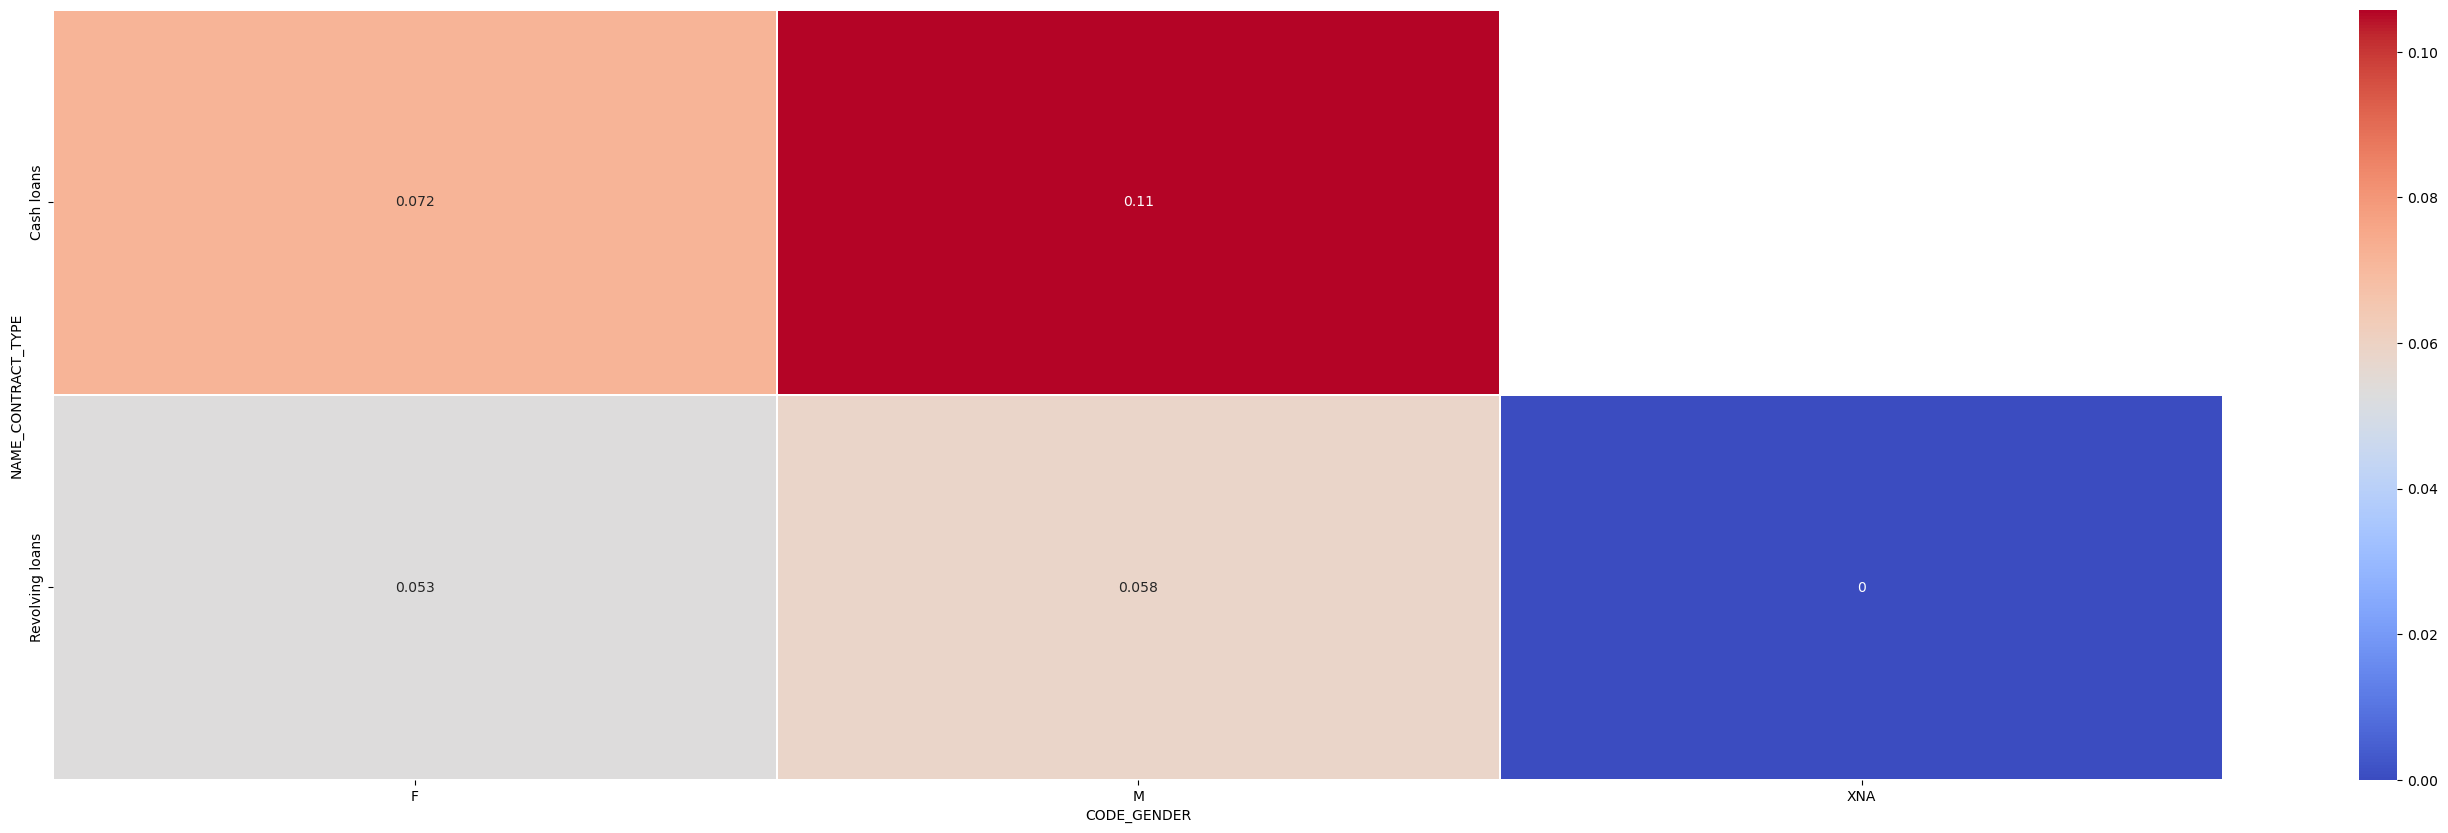

In [83]:
# Heatmap to find the association between NAME_CONTRACT_TYPE and CODE_GENDER
CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE", "CODE_GENDER")

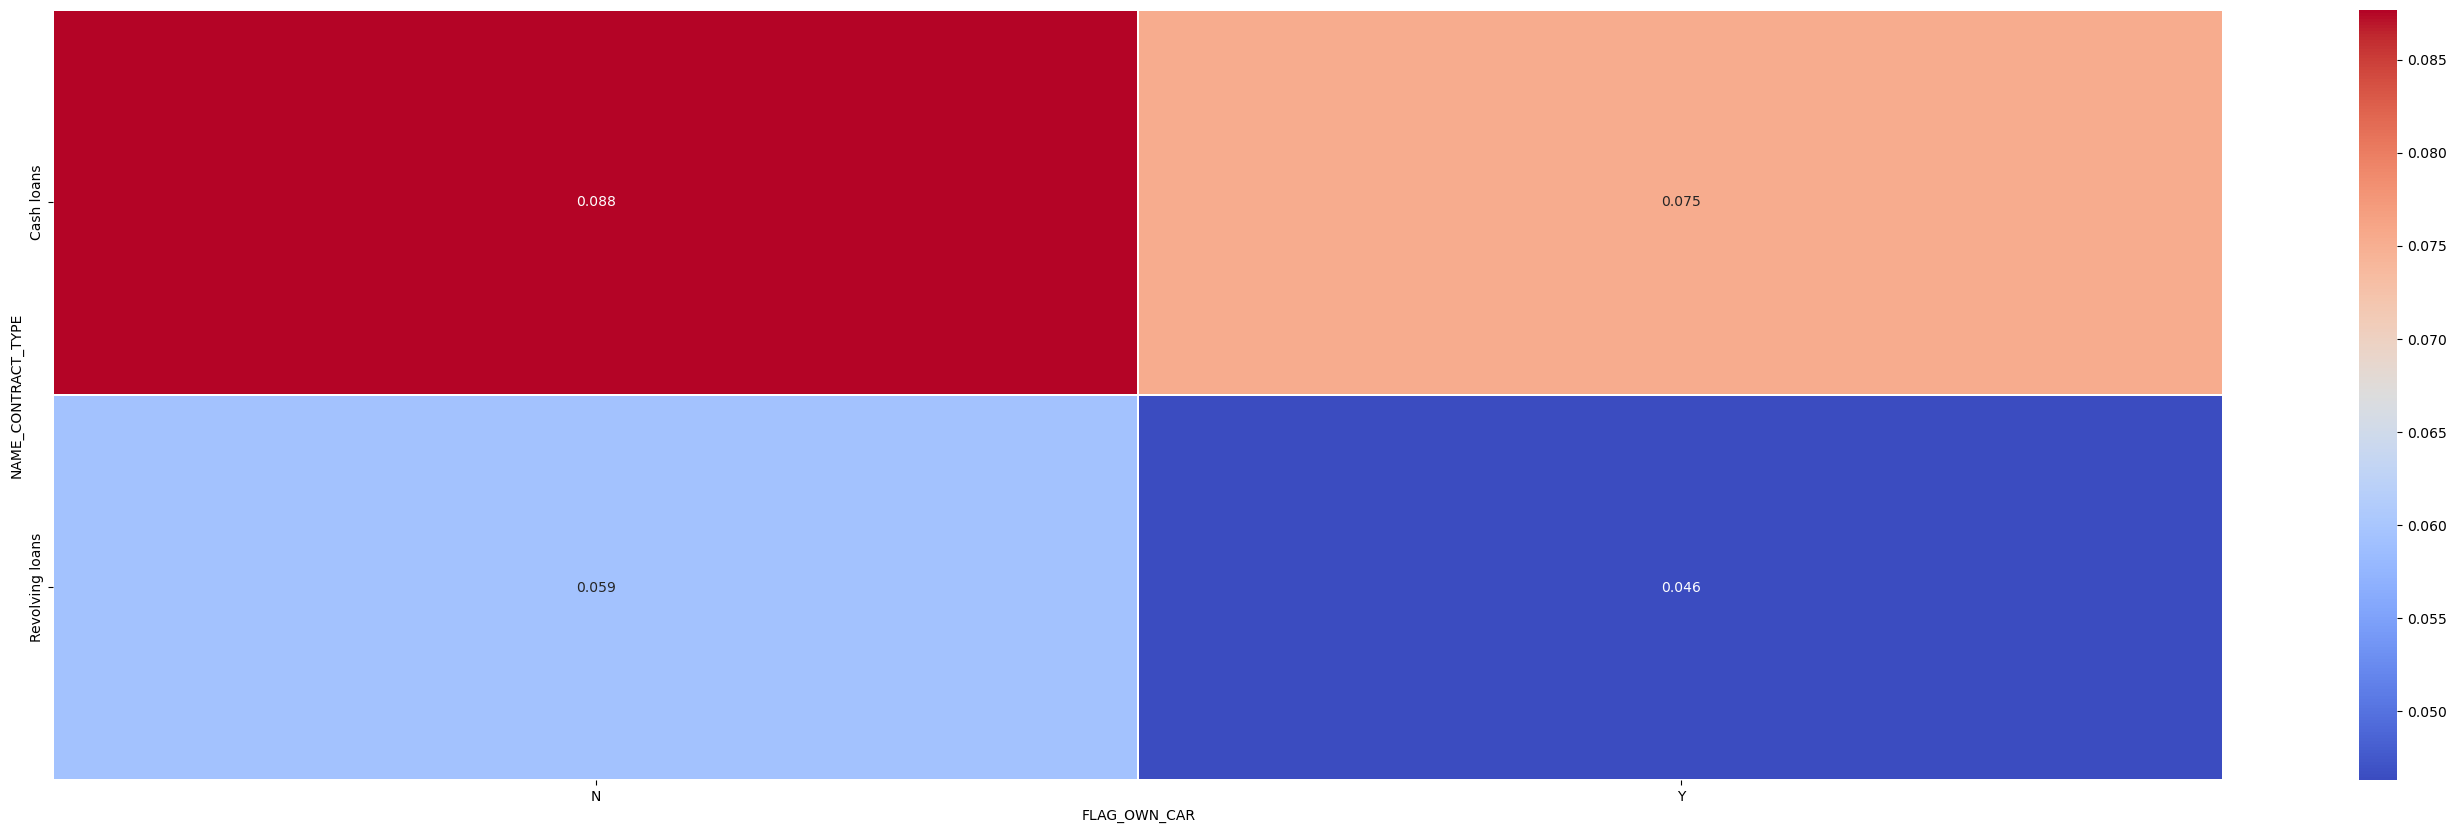

In [84]:
# Heatmap to find the association between NAME_CONTRACT_TYPE and FLAG_OWN_CAR
CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE","FLAG_OWN_CAR")

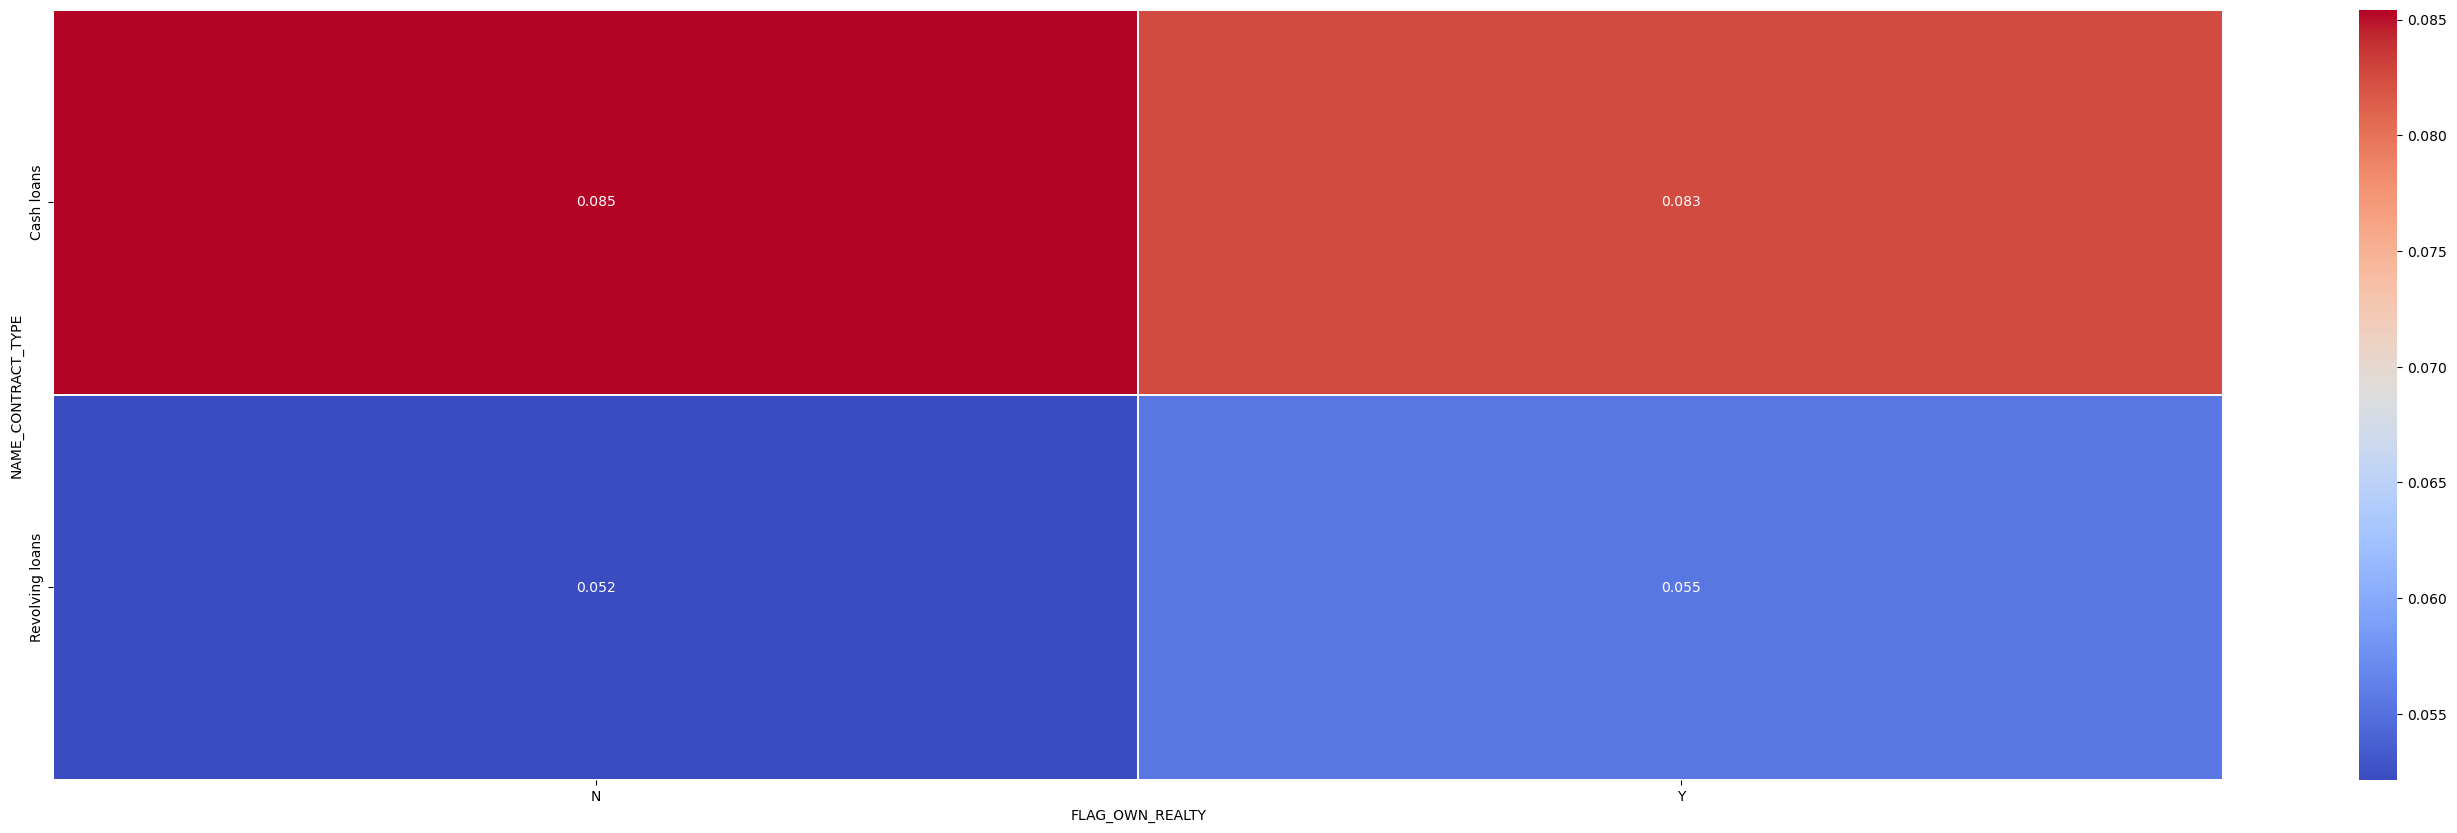

In [85]:
# Heatmap to find the association between NAME_CONTRACT_TYPE and FLAG_OWN_REALTY
CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE","FLAG_OWN_REALTY")

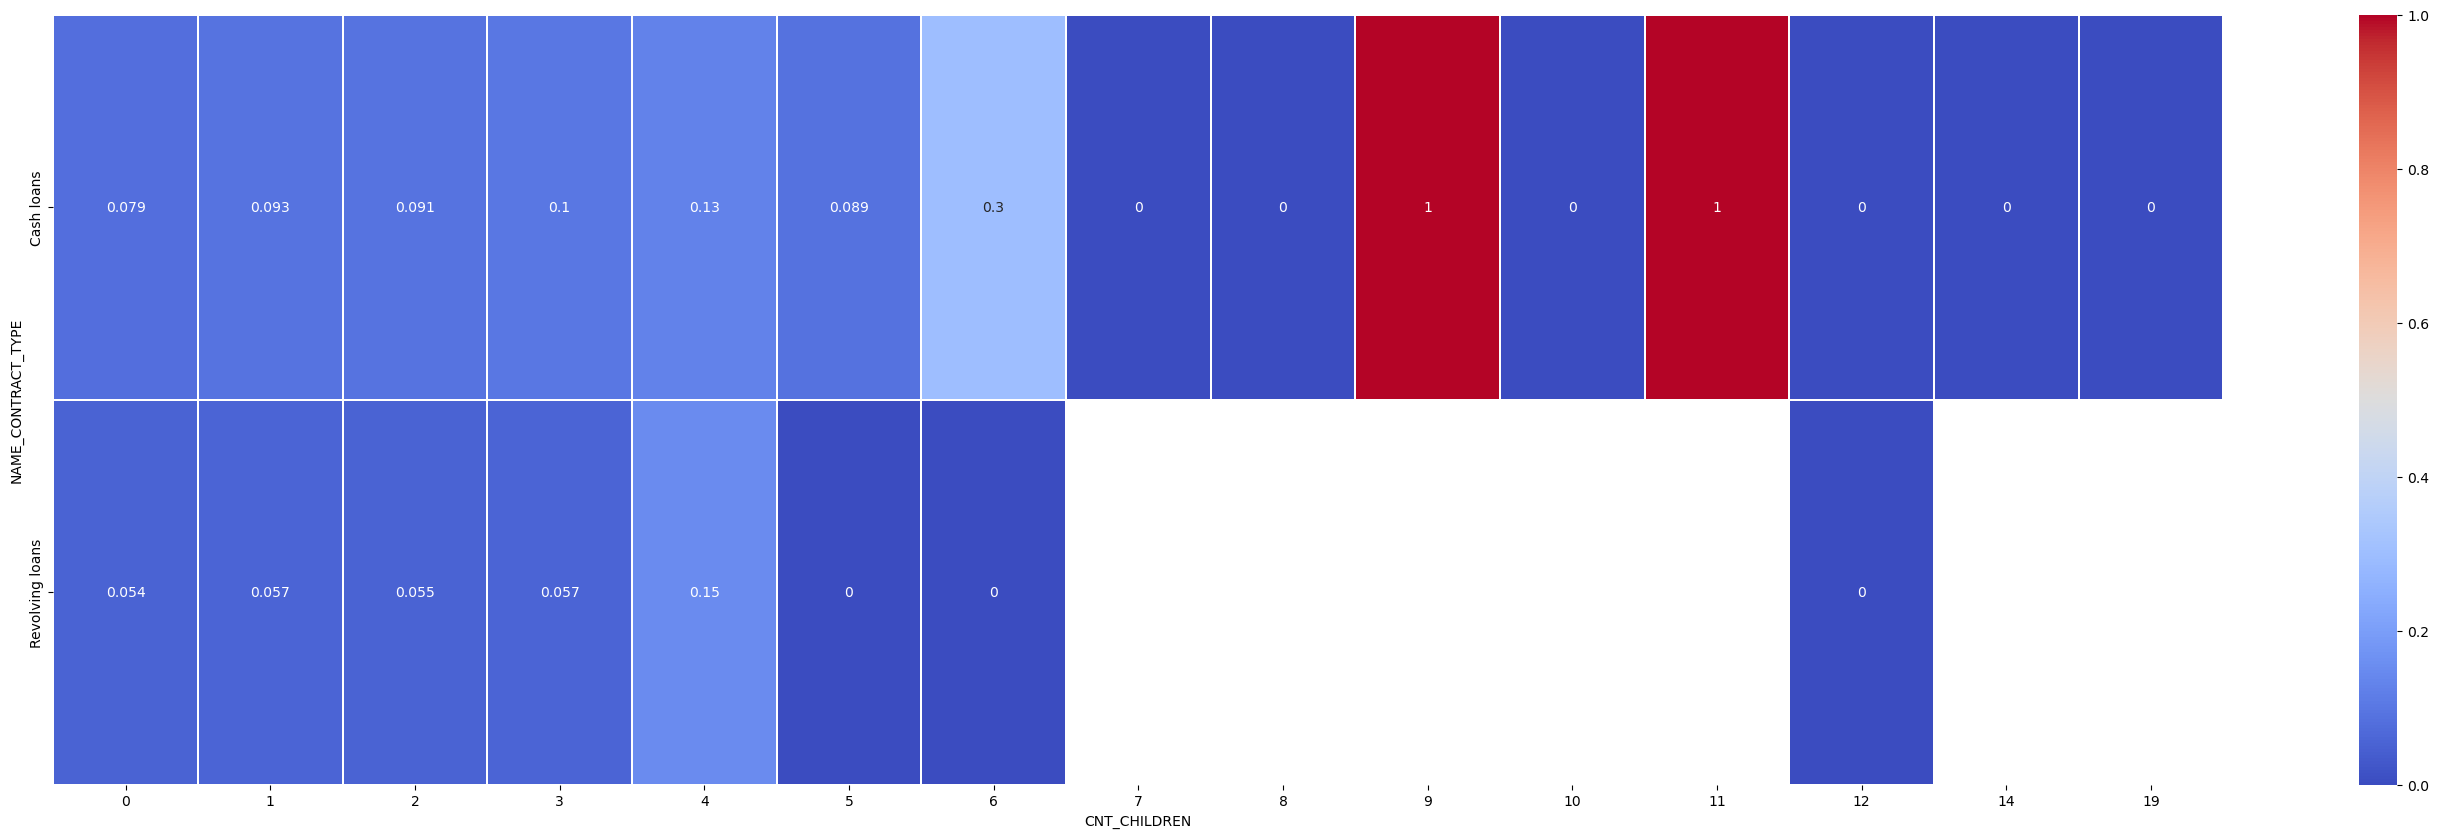

In [86]:
# Heatmap to find the association between NAME_CONTRACT_TYPE and CNT_CHILDREN
CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE", "CNT_CHILDREN")

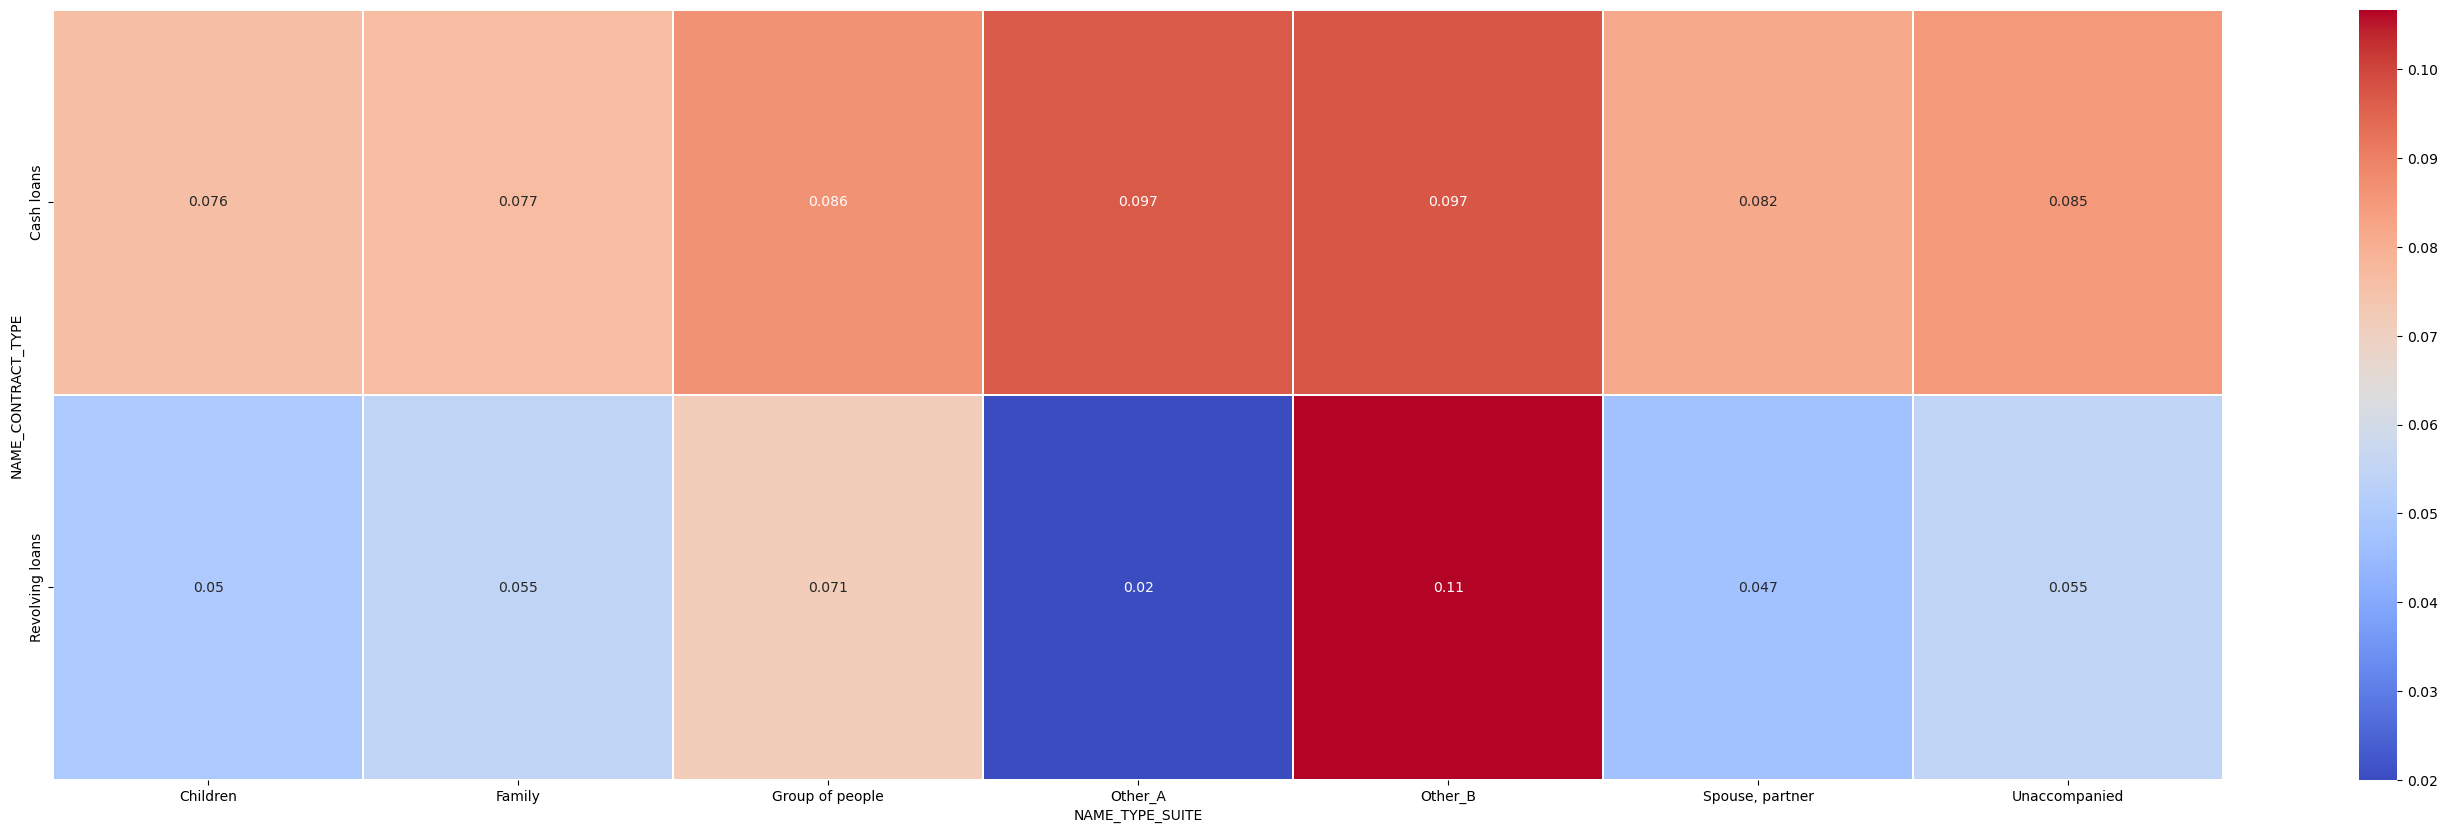

In [87]:
# Heatmap to find the association between NAME_CONTRACT_TYPE and NAME_TYPE_SUITE
CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE","NAME_TYPE_SUITE")

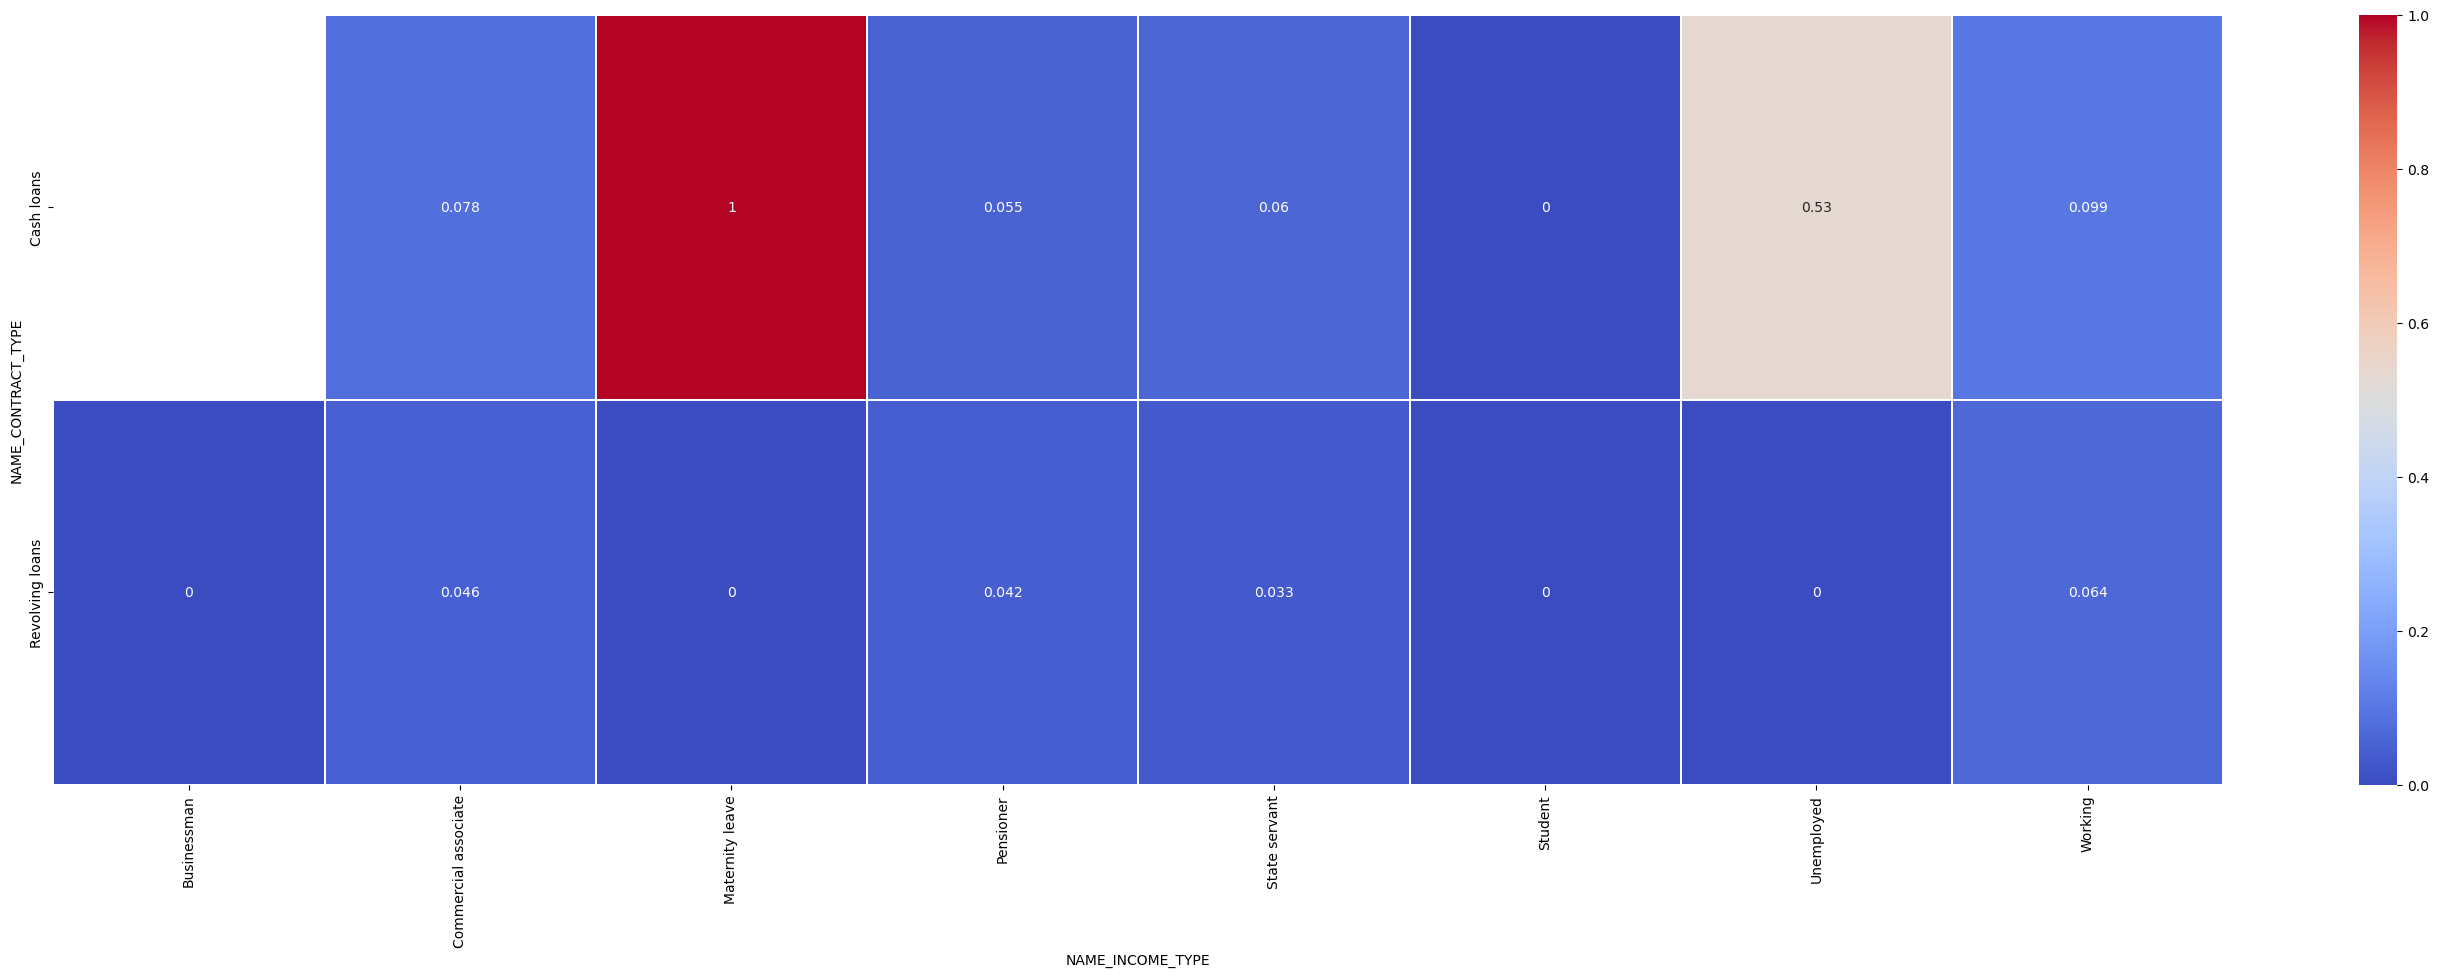

In [88]:
# Heatmap to find the association between NAME_CONTRACT_TYPE and NAME_INCOME_TYPE
CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE", "NAME_INCOME_TYPE", True)

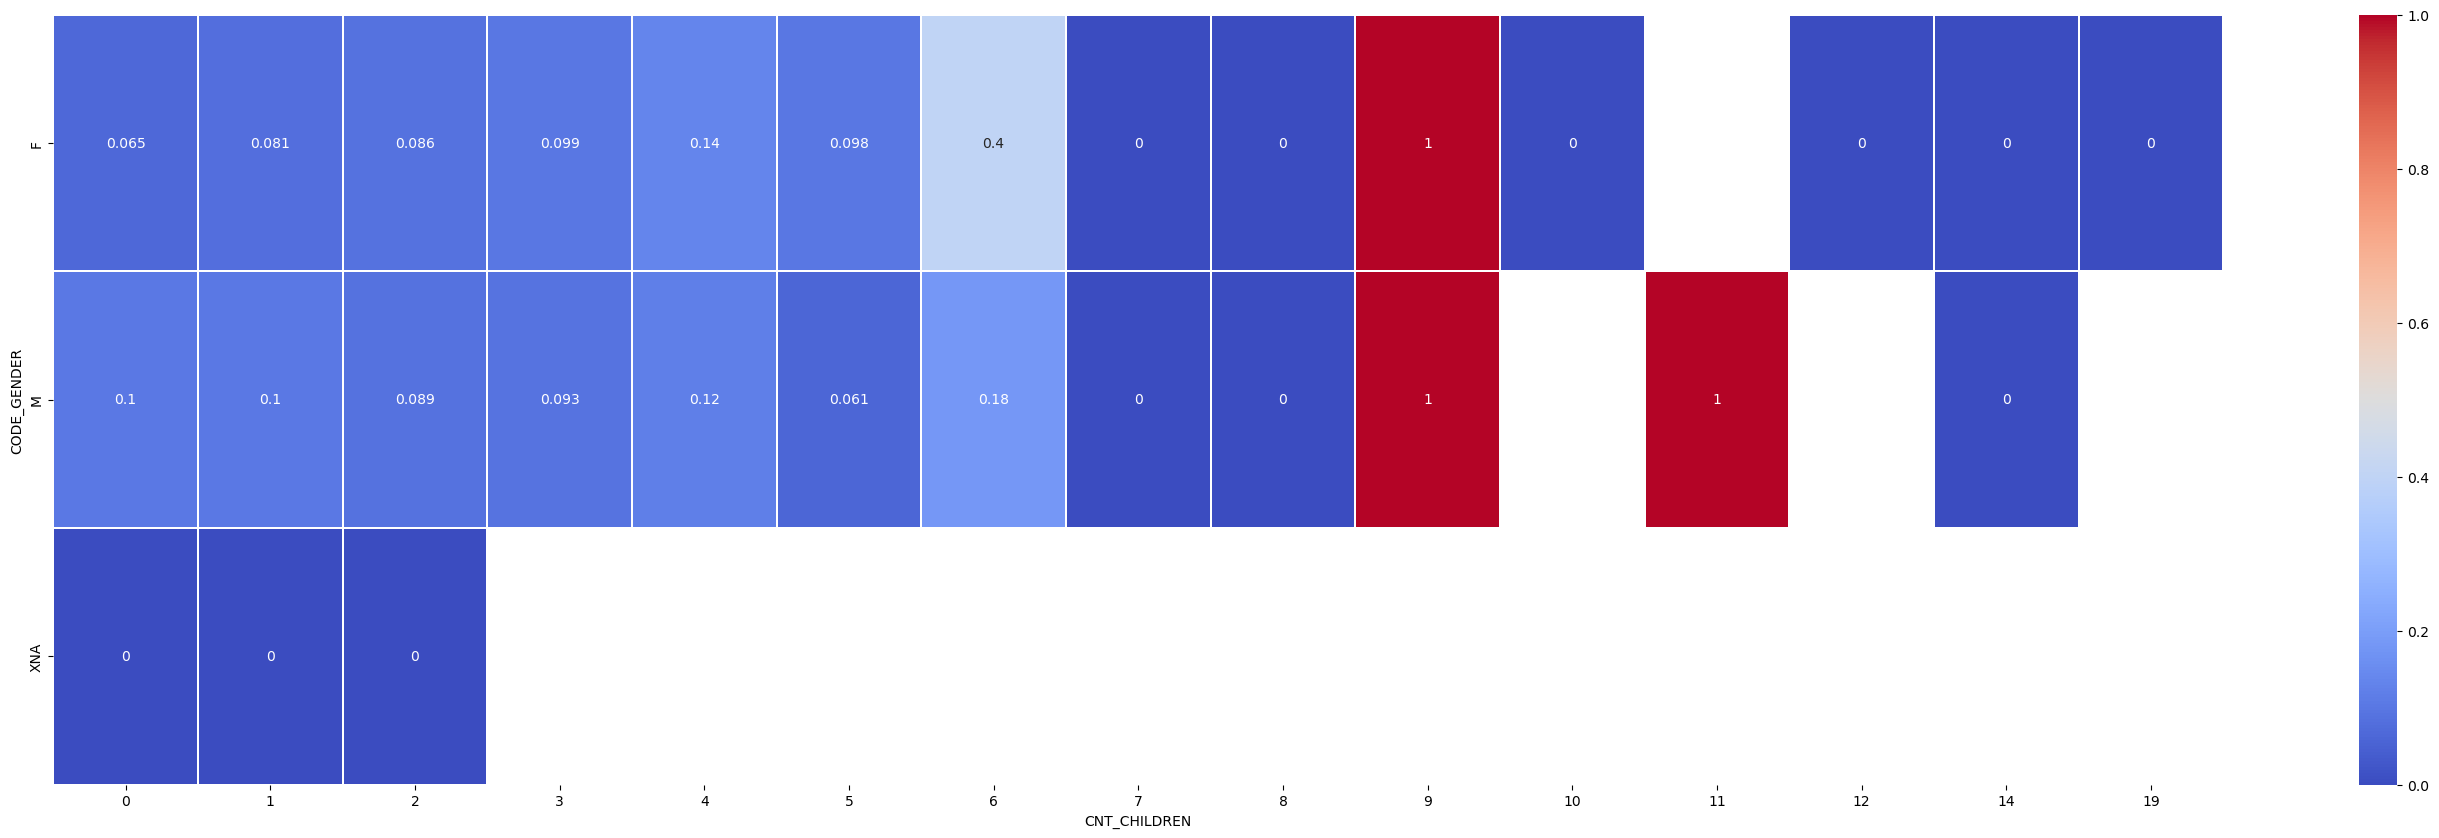

In [89]:
CAT_CAT_ANALYSIS("CODE_GENDER", "CNT_CHILDREN")

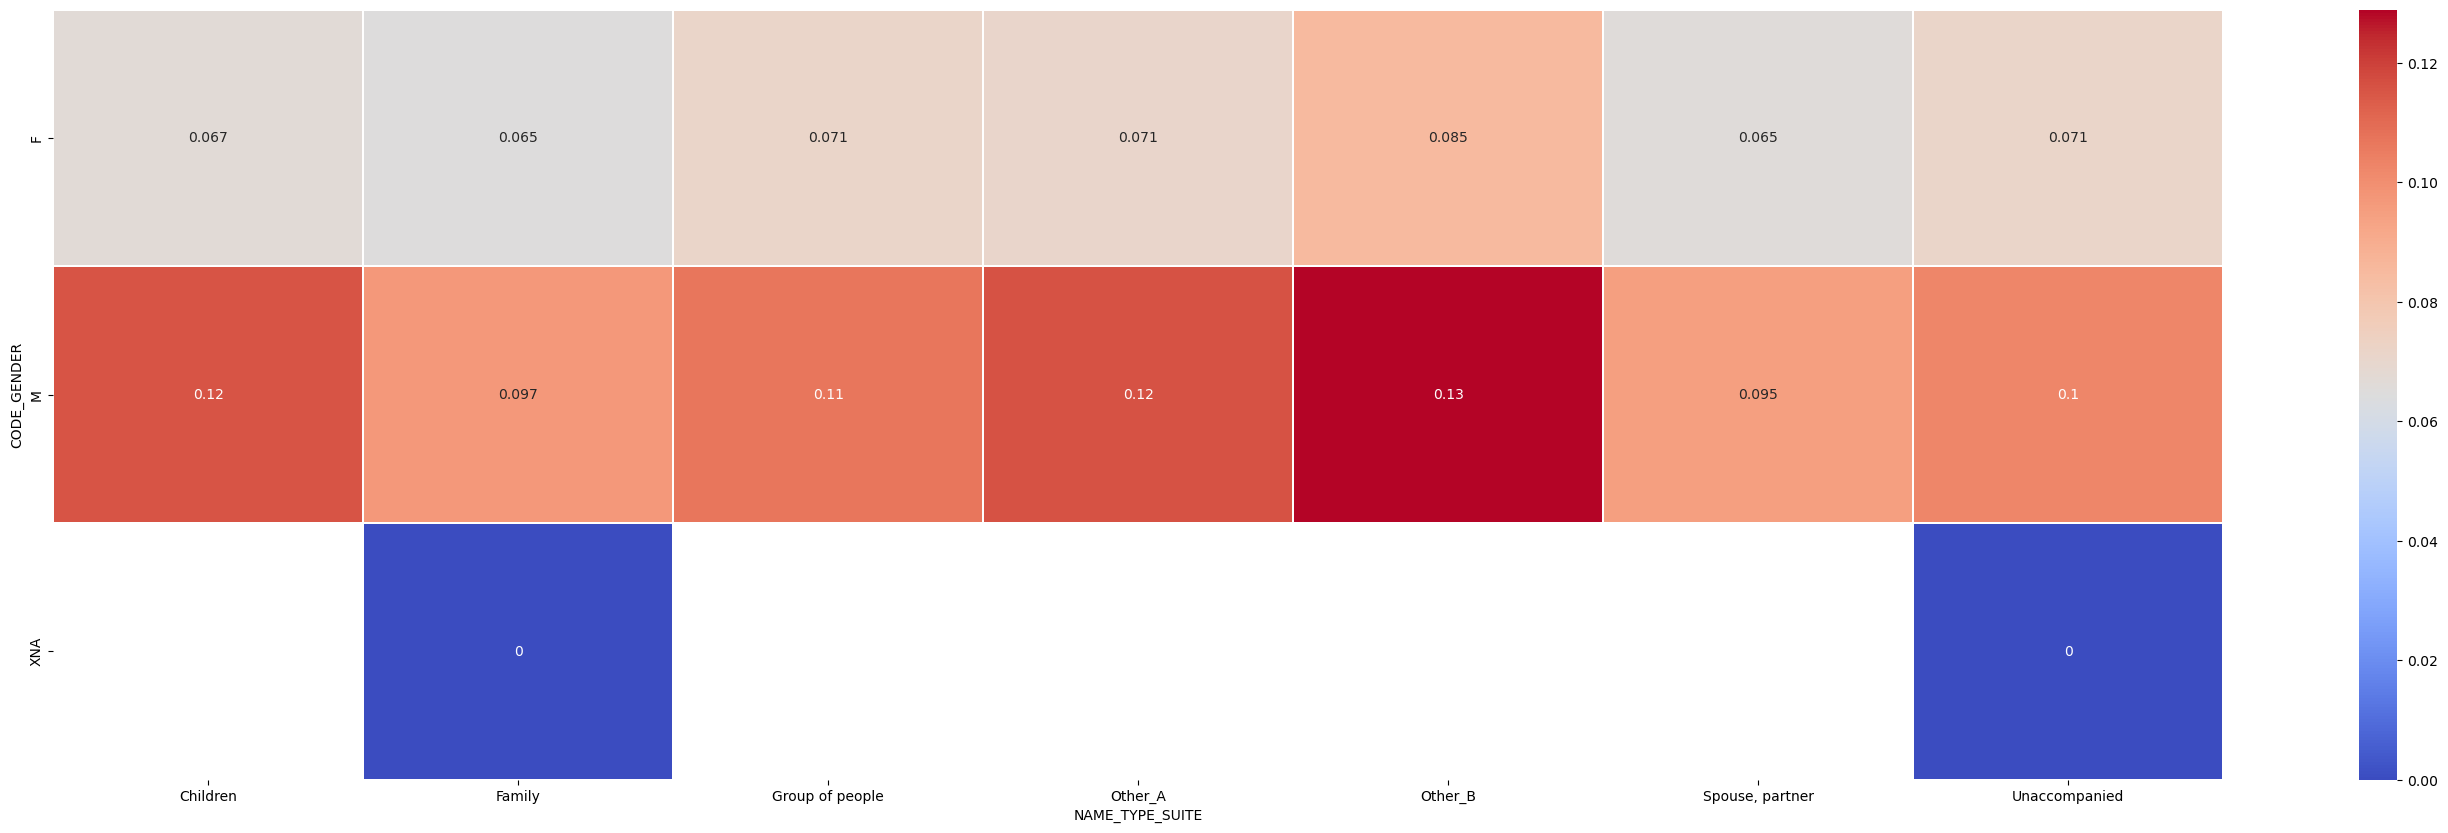

In [90]:
# Heatmap to find the association between CODE_GENDER and NAME_TYPE_SUITE
CAT_CAT_ANALYSIS("CODE_GENDER", "NAME_TYPE_SUITE")

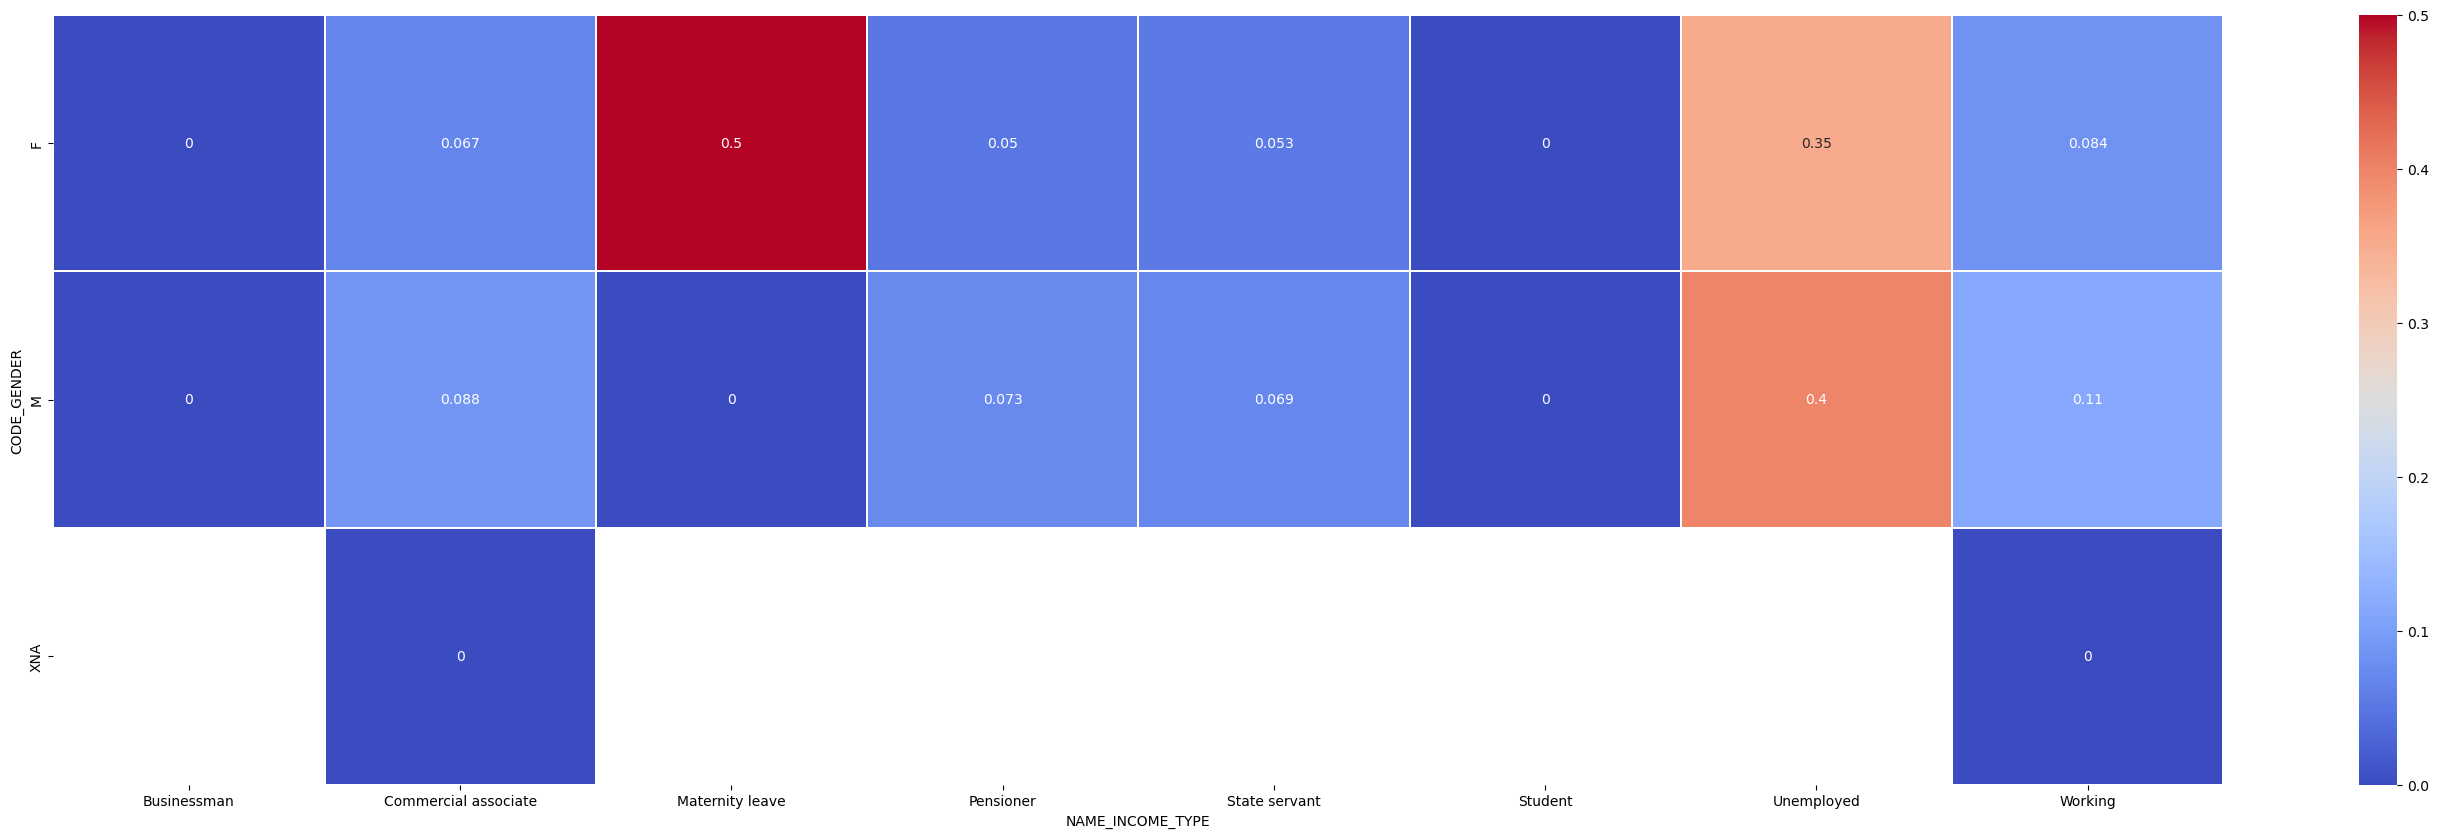

In [91]:
# Heatmap to find the association between CODE_GENDER and NAME_INCOME_TYPE
CAT_CAT_ANALYSIS("CODE_GENDER", "NAME_INCOME_TYPE")

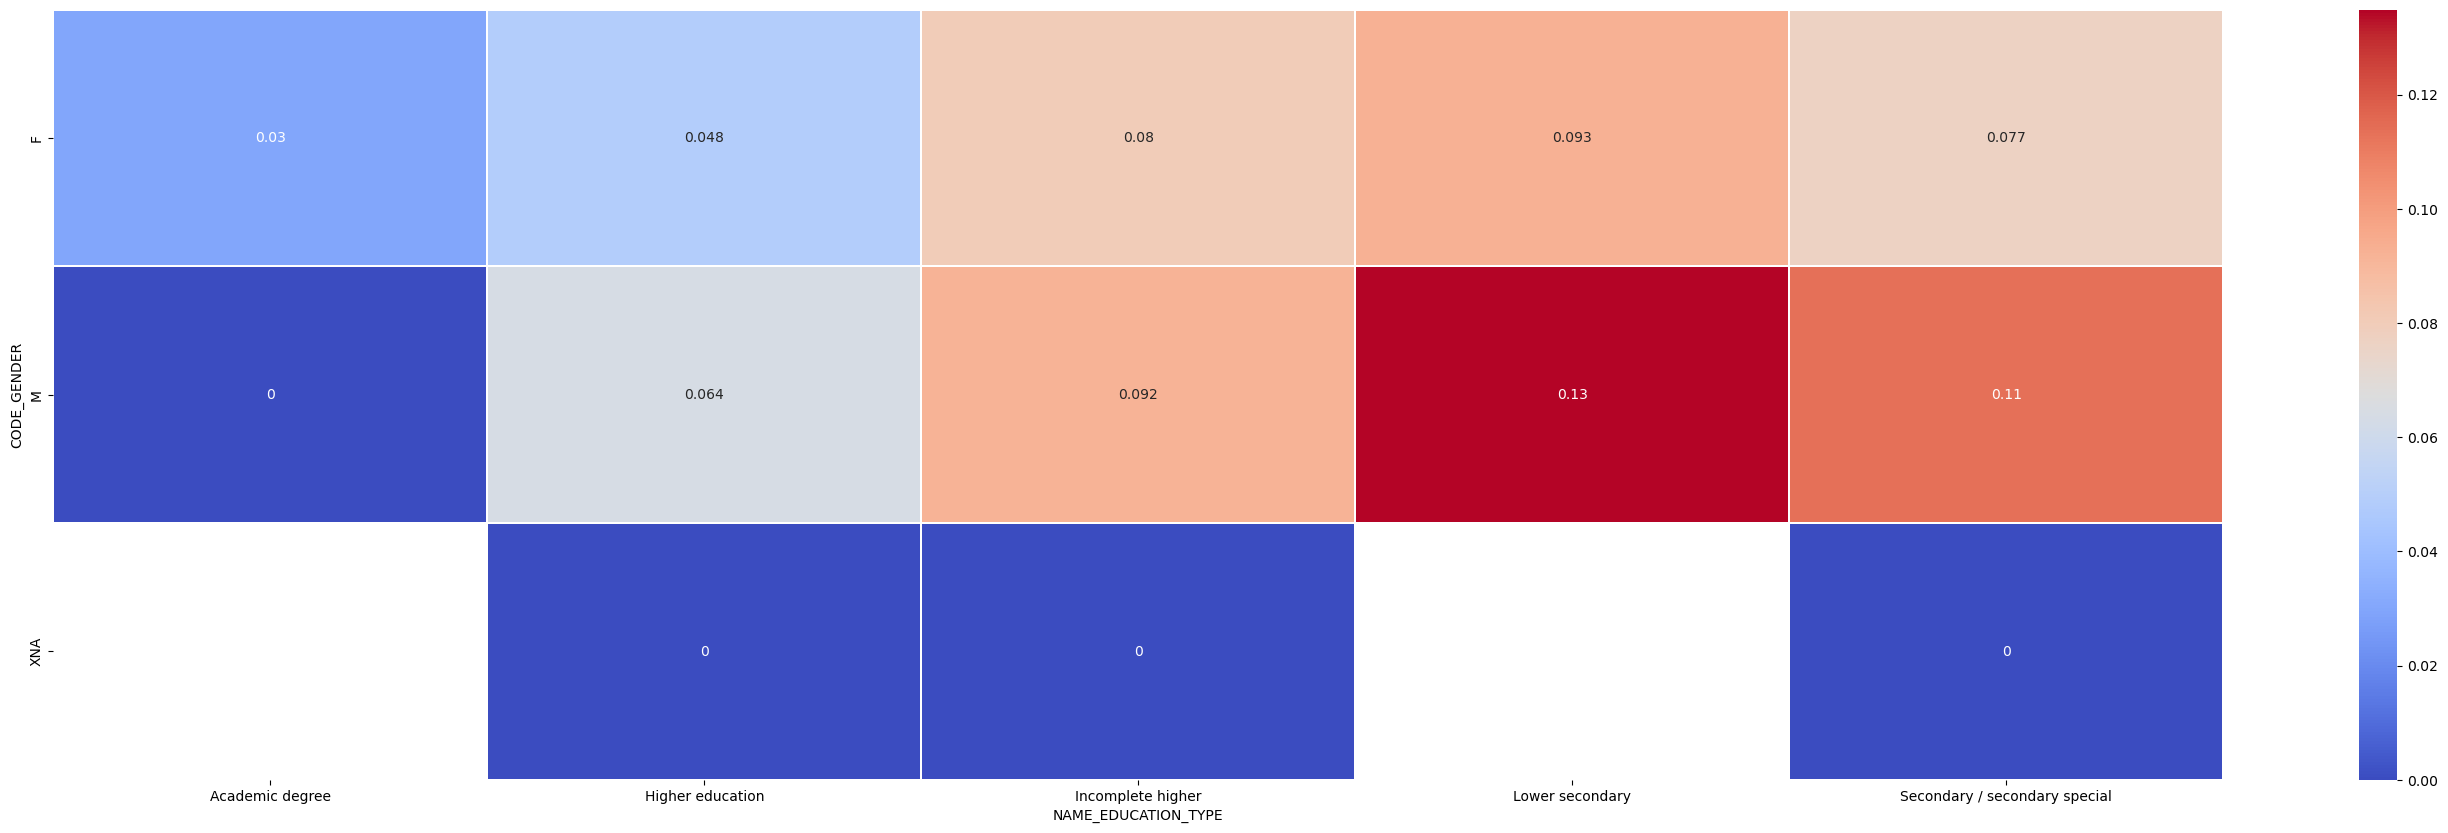

In [92]:
# Heatmap to find the association between CODE_GENDER and NAME_EDUCATION_TYPE
CAT_CAT_ANALYSIS("CODE_GENDER", "NAME_EDUCATION_TYPE")

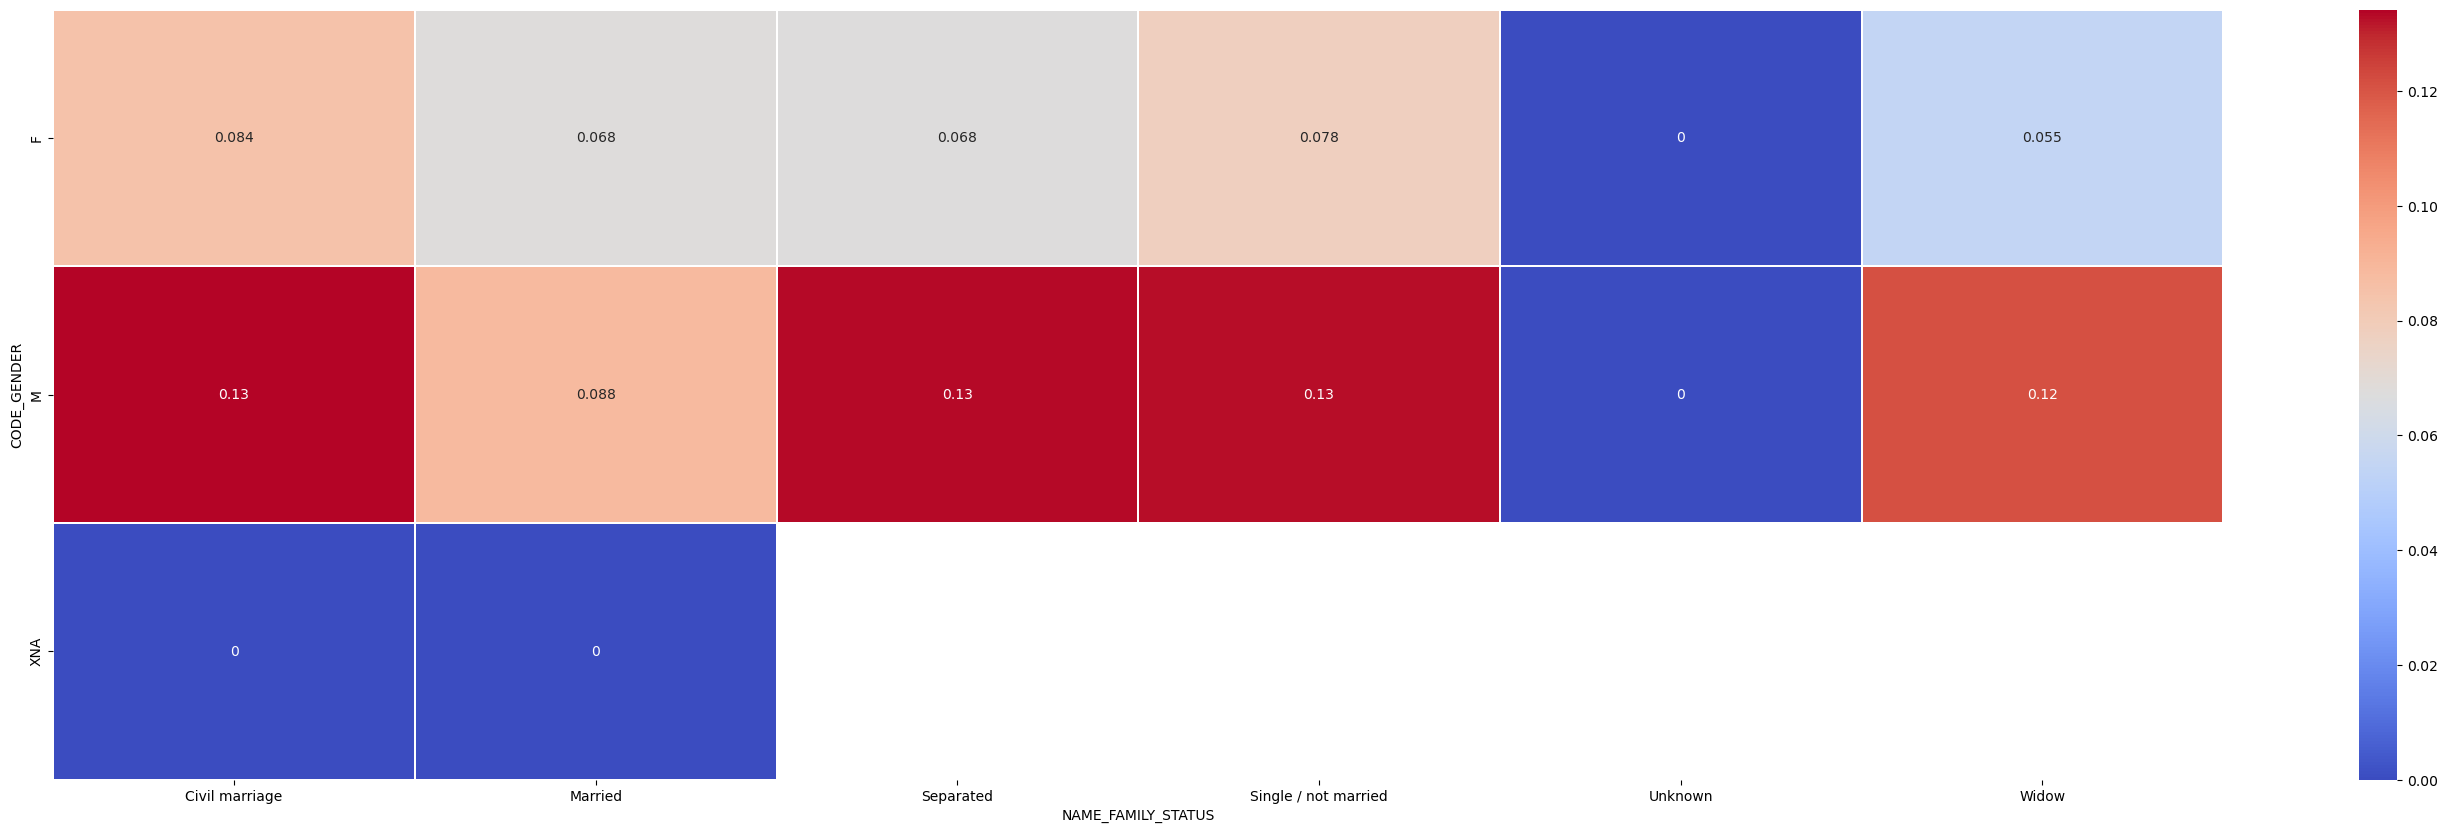

In [93]:
# Heatmap to find the association between CODE_GENDER and NAME_FAMILY_STATUS
CAT_CAT_ANALYSIS("CODE_GENDER", "NAME_FAMILY_STATUS")

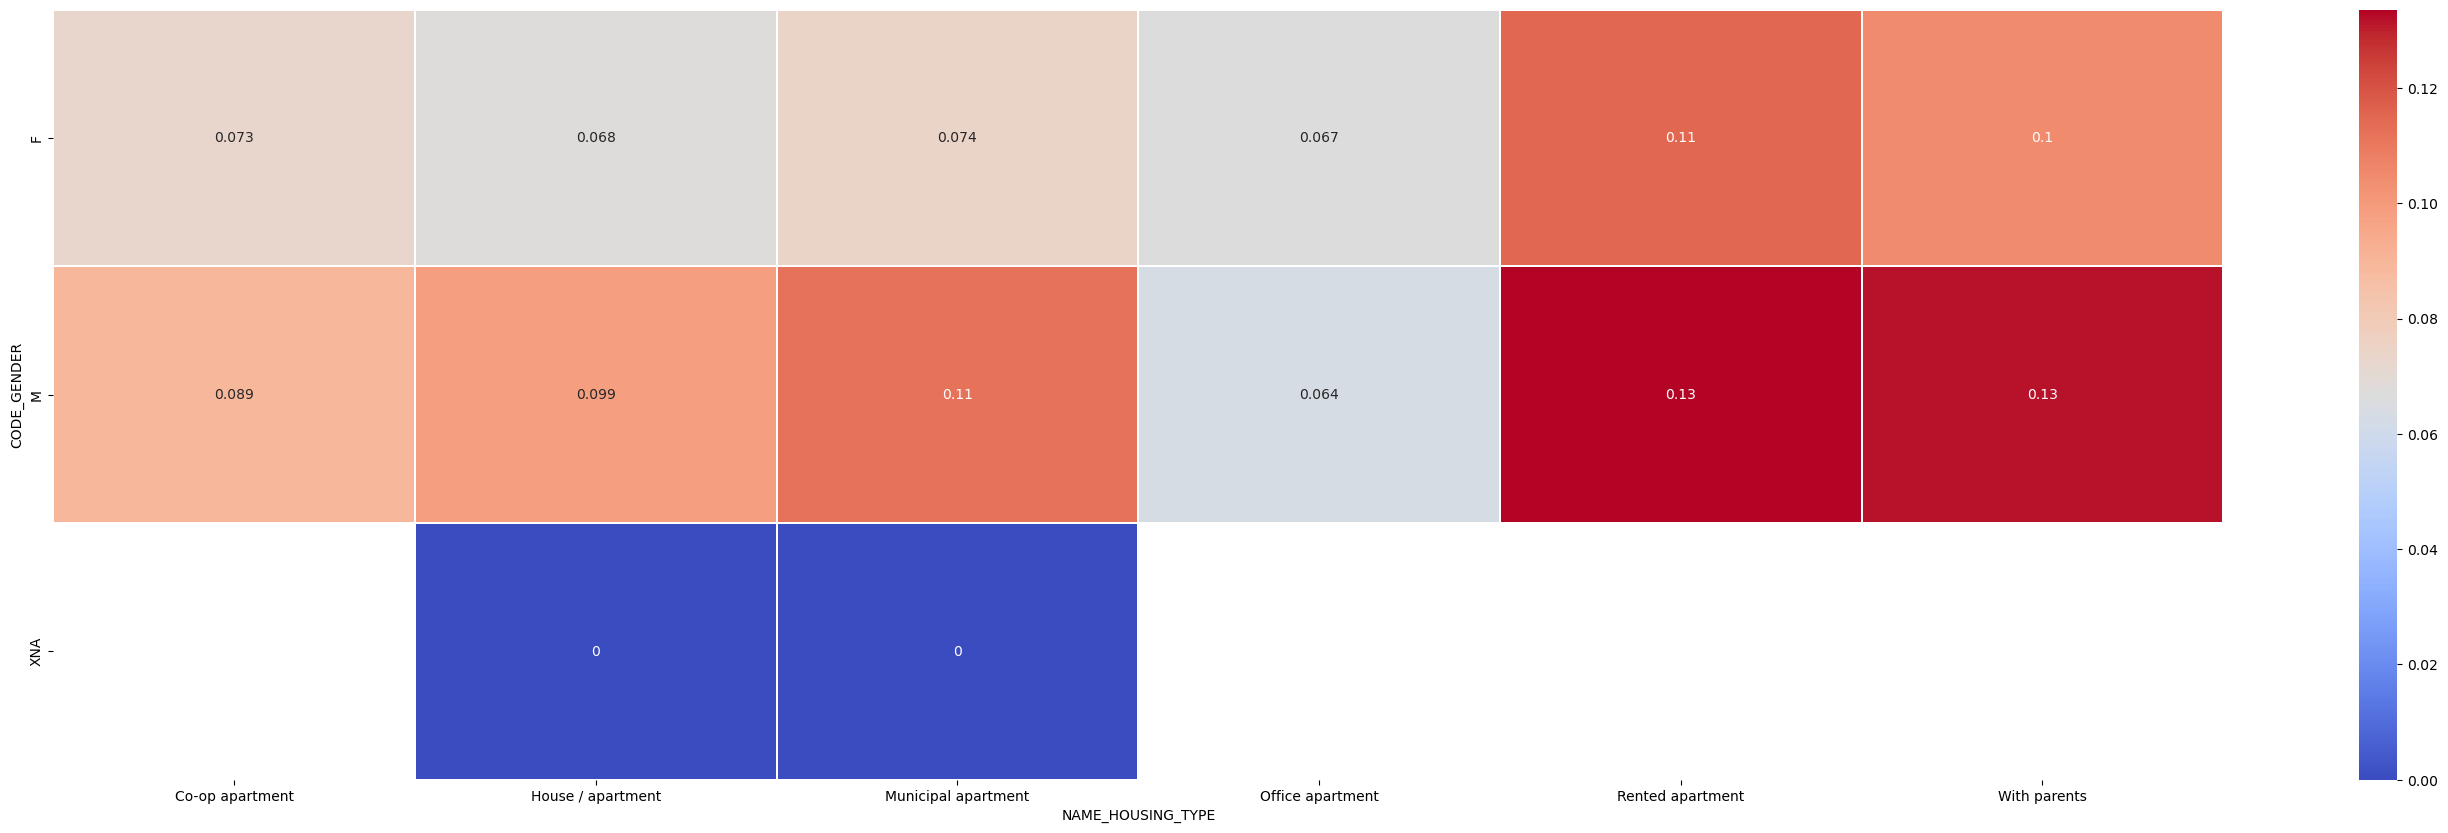

In [94]:
# Heatmap to find the association between CODE_GENDER and NAME_HOUSING_TYPE
CAT_CAT_ANALYSIS("CODE_GENDER", "NAME_HOUSING_TYPE")

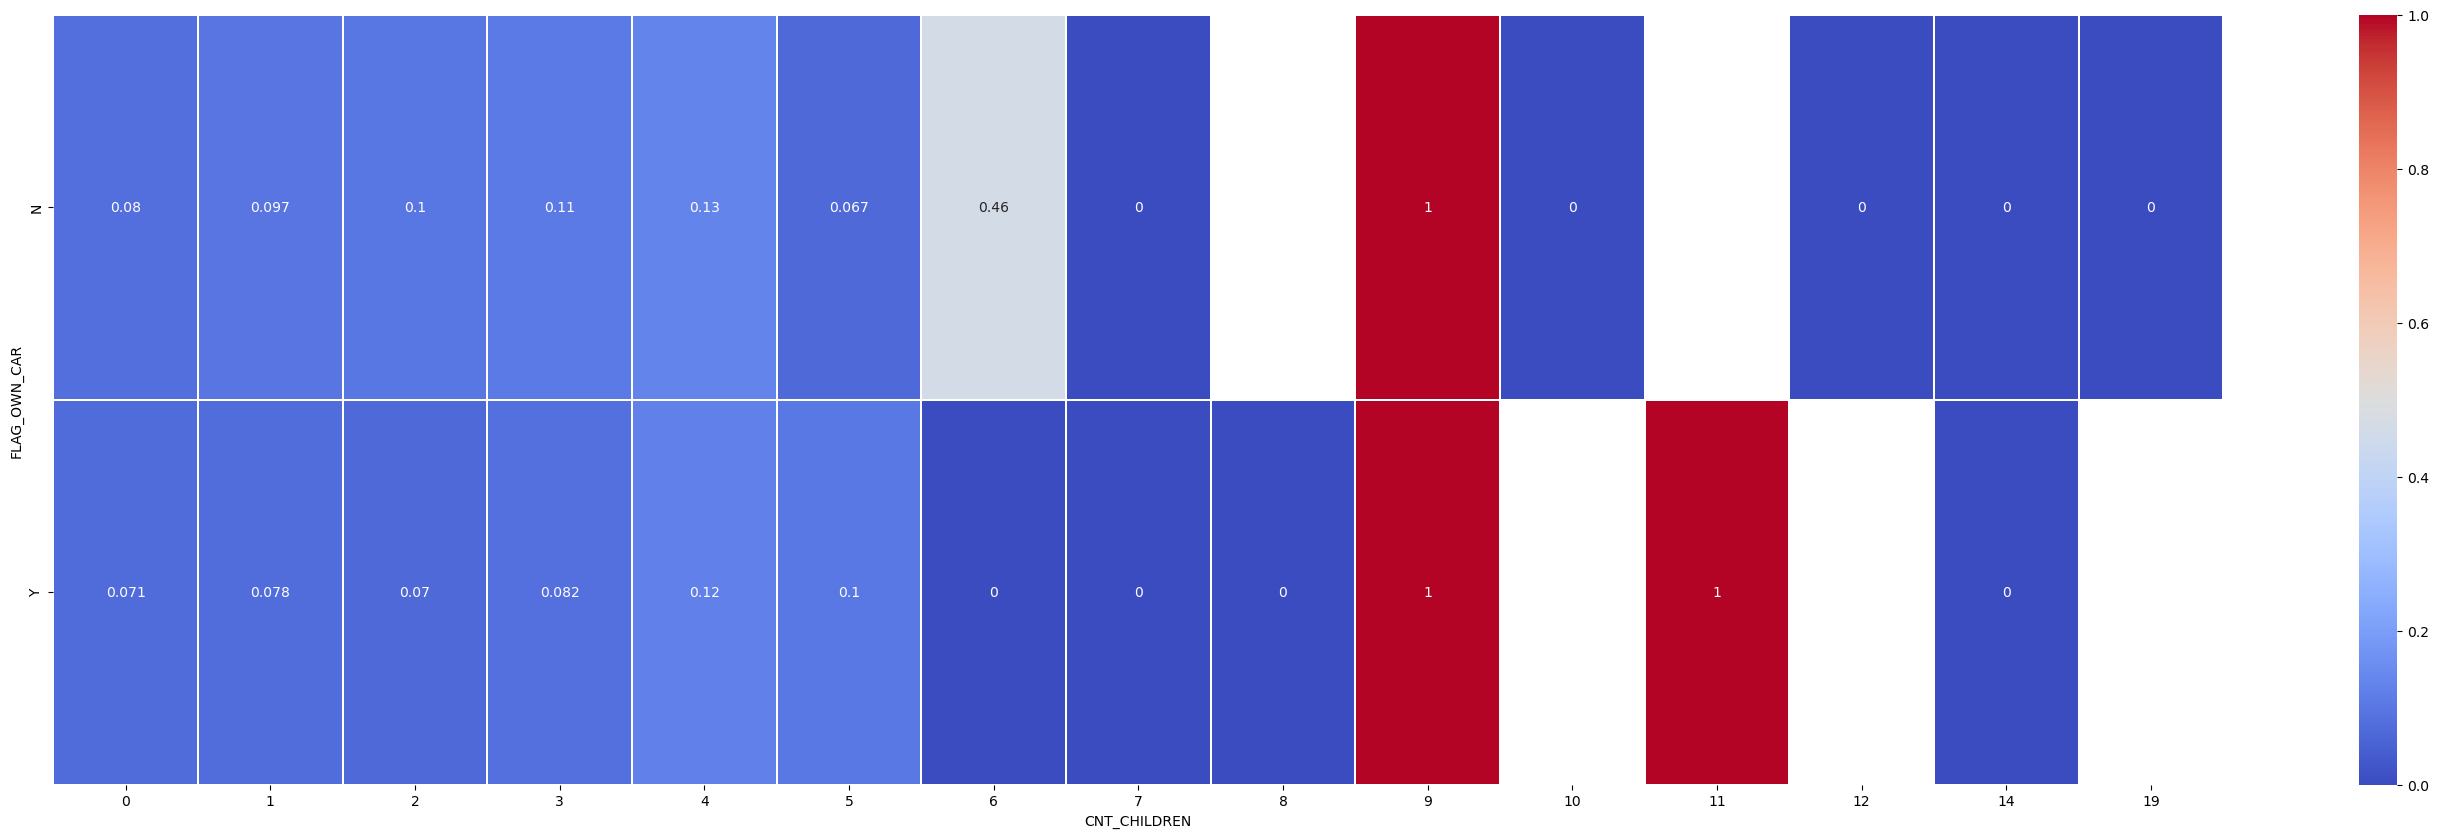

In [95]:
# Heatmap to find the association between FLAG_OWN_CAR and CNT_CHILDREN
CAT_CAT_ANALYSIS("FLAG_OWN_CAR","CNT_CHILDREN")

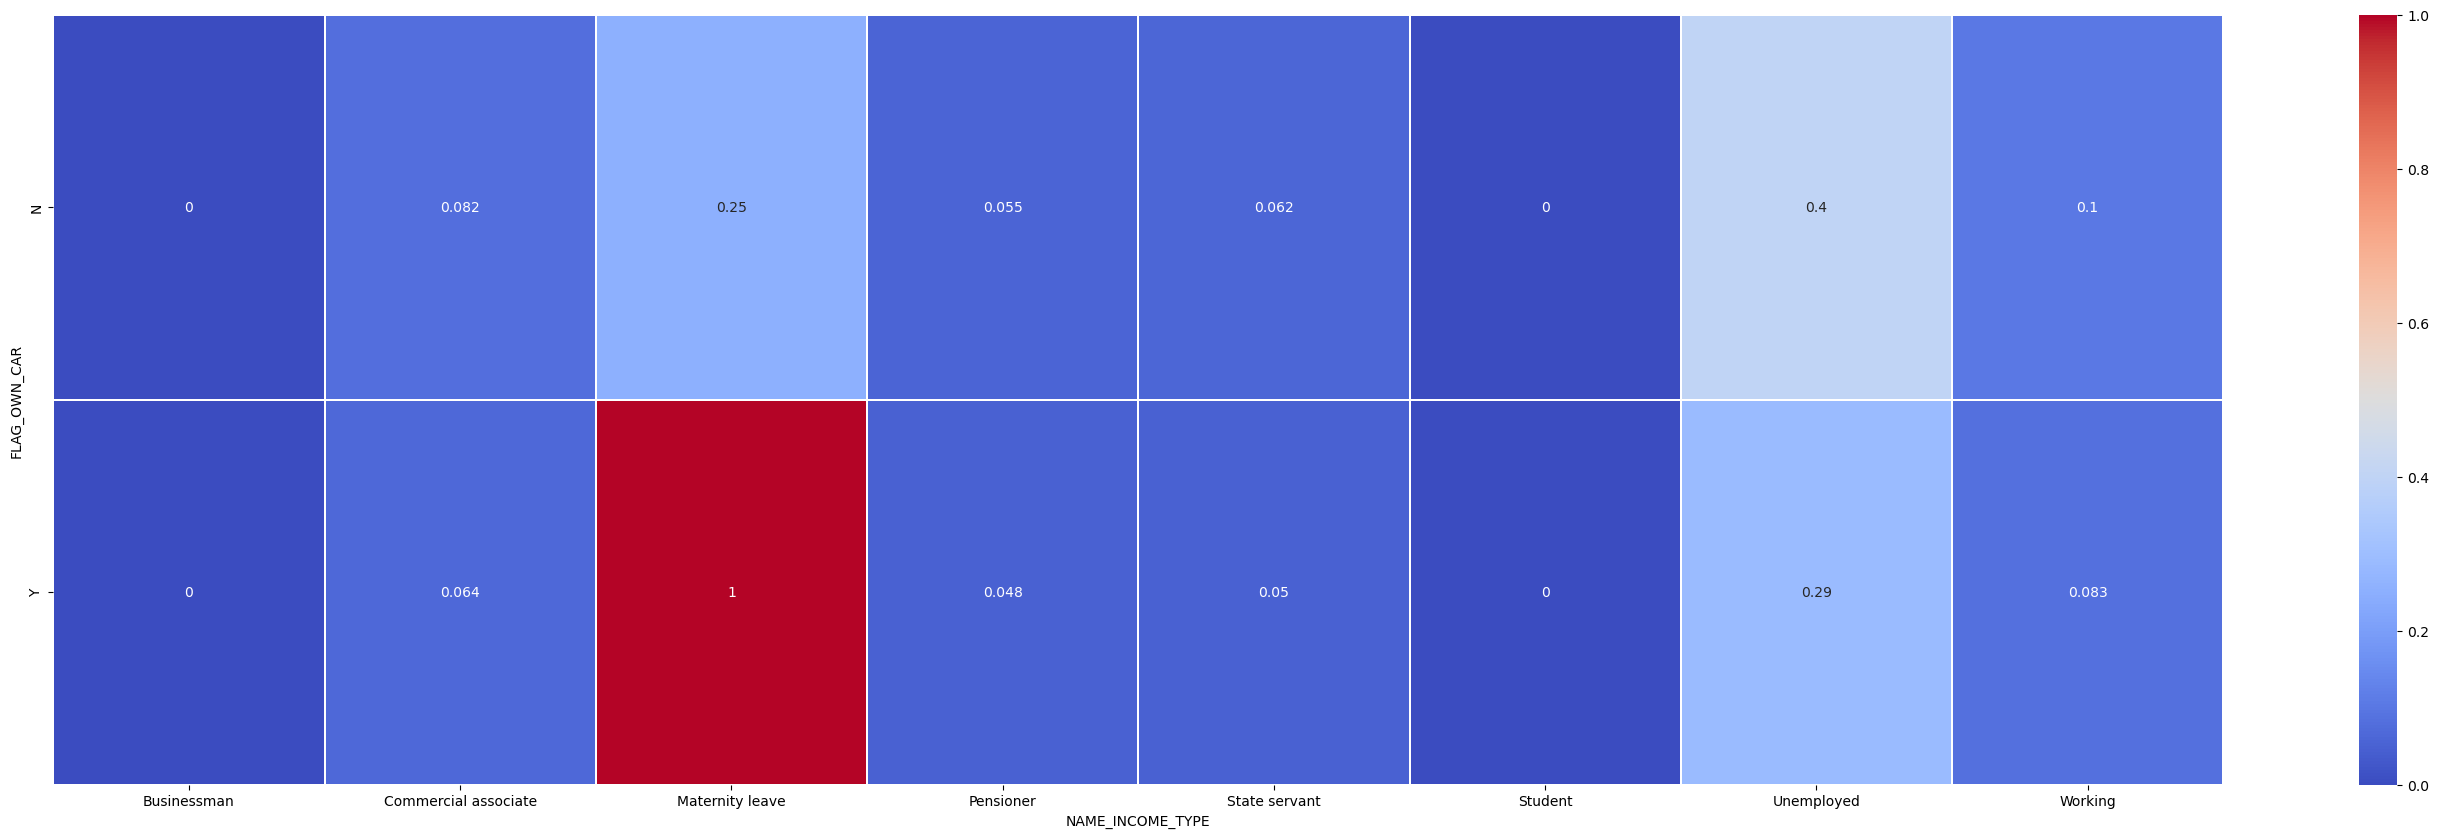

In [96]:
# Heatmap to find the association between FLAG_OWN_CAR and NAME_INCOME_TYPE
CAT_CAT_ANALYSIS("FLAG_OWN_CAR","NAME_INCOME_TYPE")

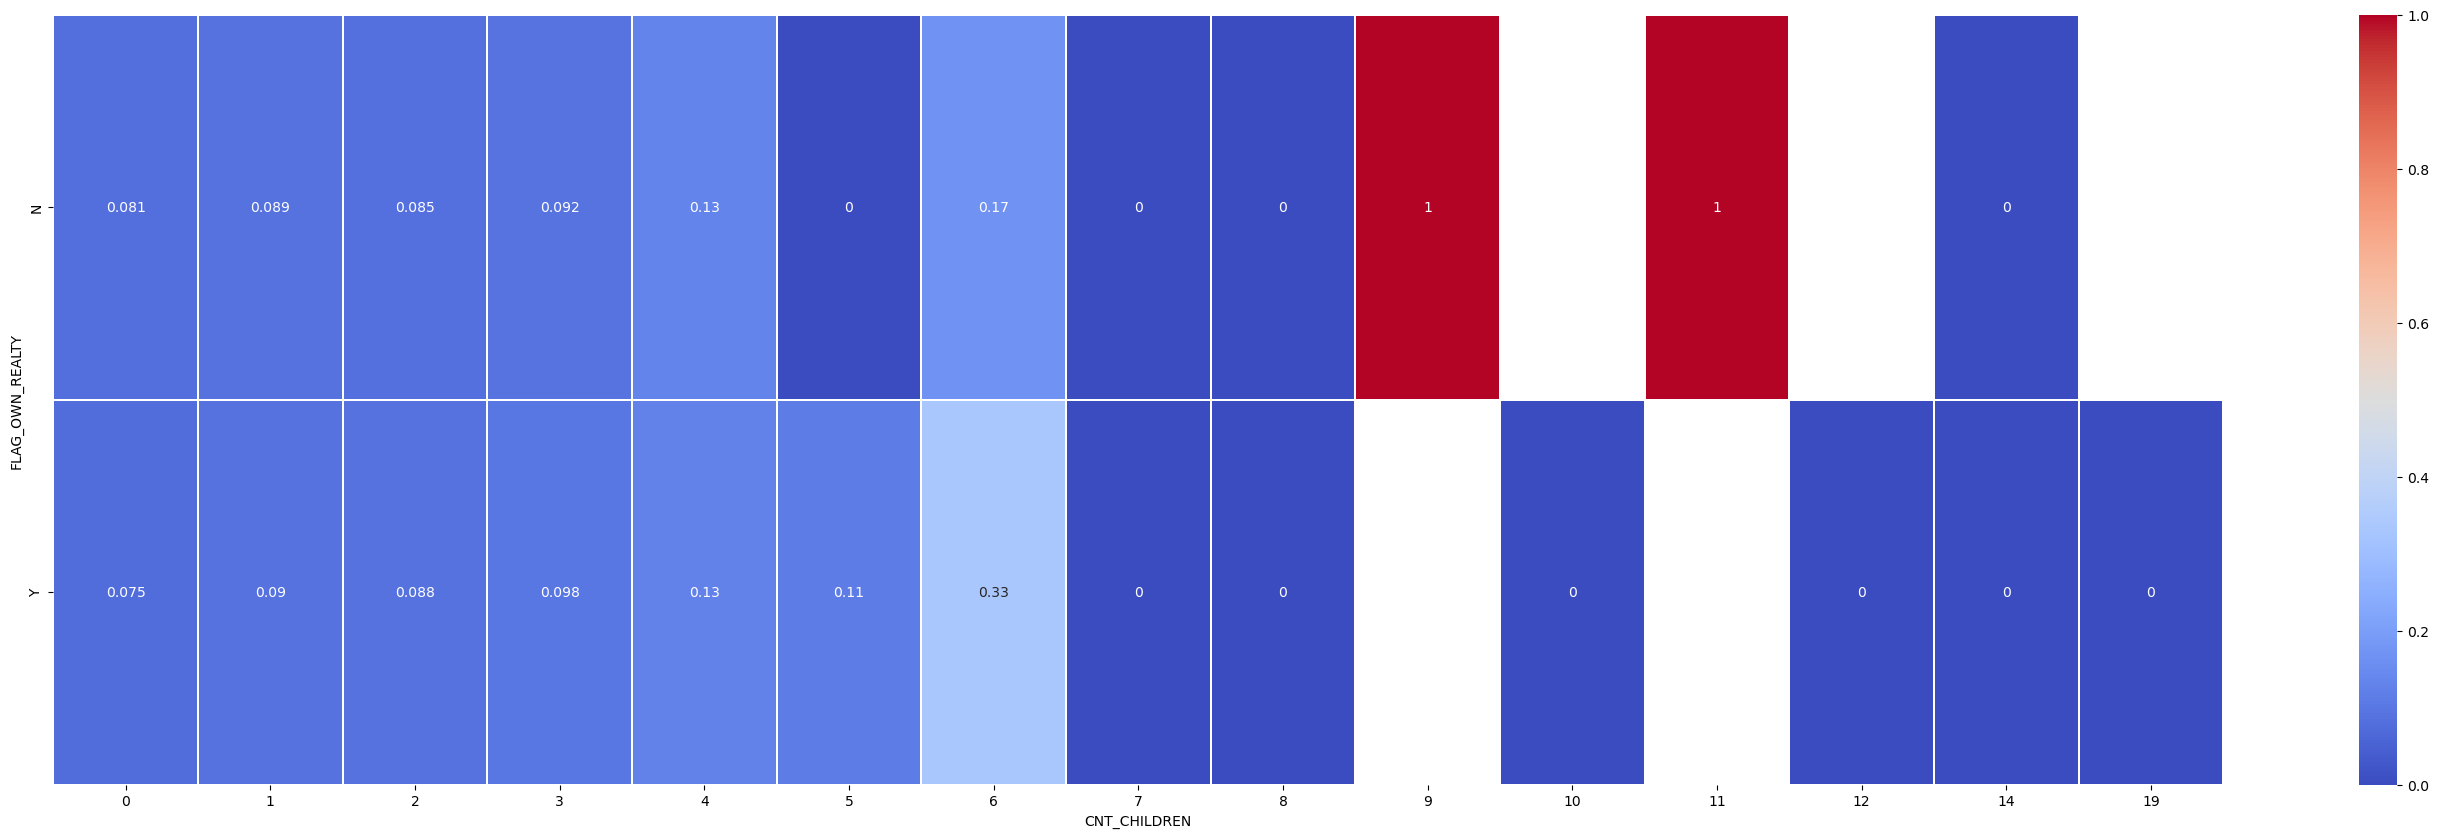

In [97]:
# Heatmap to find the association between FLAG_OWN_REALTY and CNT_CHILDREN
CAT_CAT_ANALYSIS("FLAG_OWN_REALTY","CNT_CHILDREN")

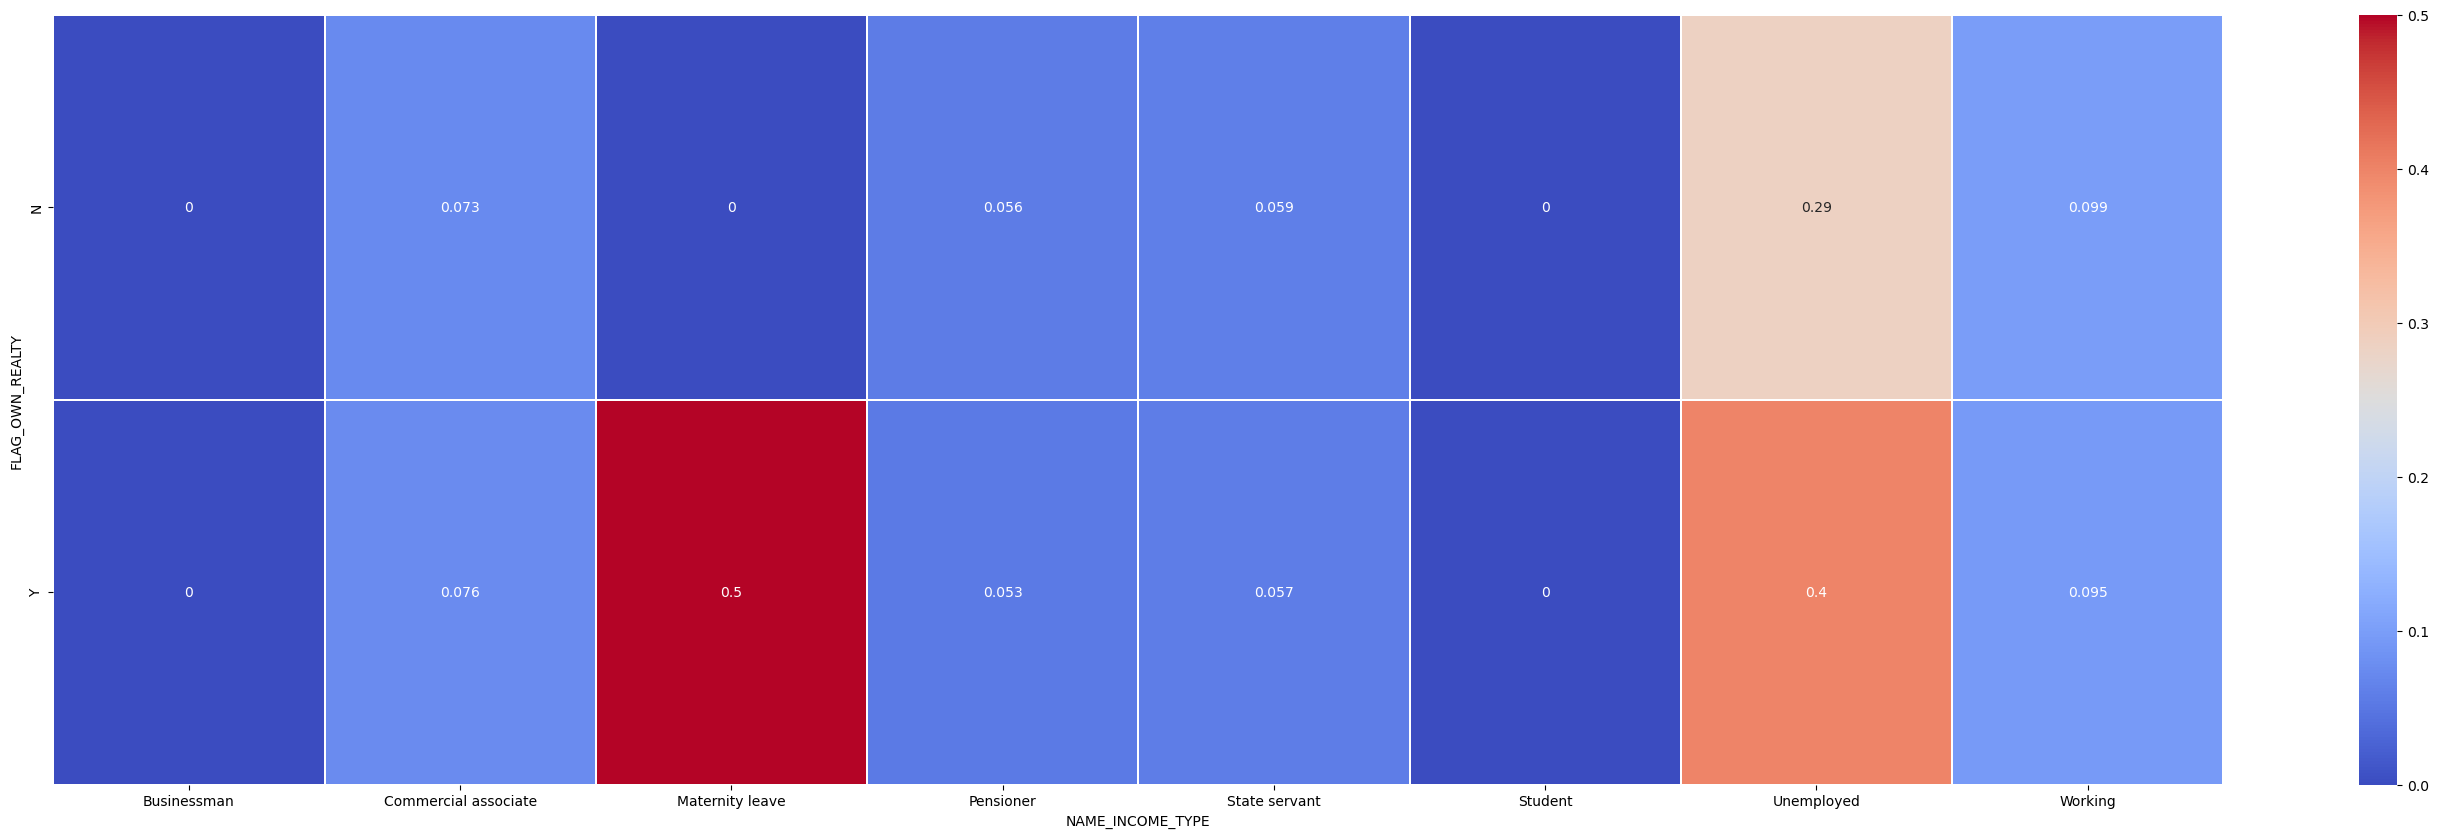

In [98]:
# Heatmap to find the association between FLAG_OWN_REALTY and NAME_INCOME_TYPE
CAT_CAT_ANALYSIS("FLAG_OWN_REALTY","NAME_INCOME_TYPE")

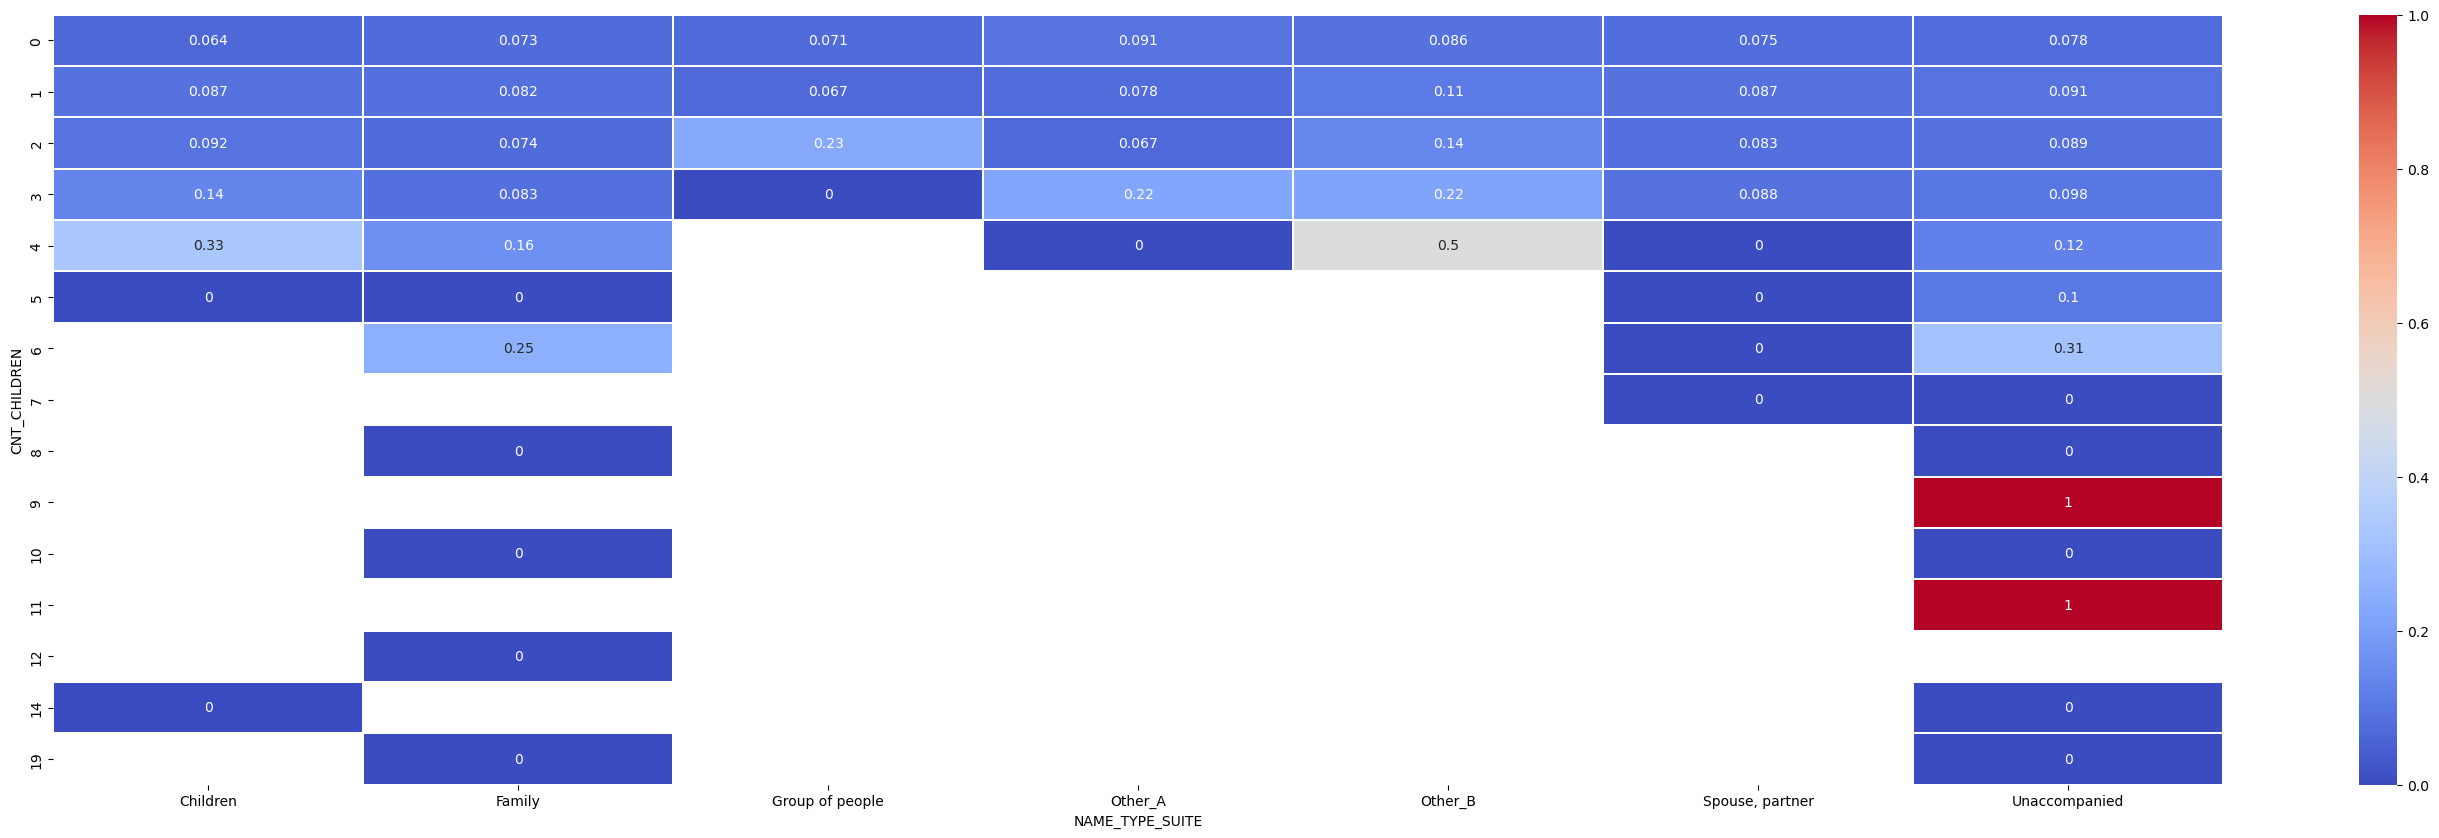

In [99]:
# Heatmap to find the association between CNT_CHILDREN and NAME_TYPE_SUITE
CAT_CAT_ANALYSIS("CNT_CHILDREN","NAME_TYPE_SUITE")

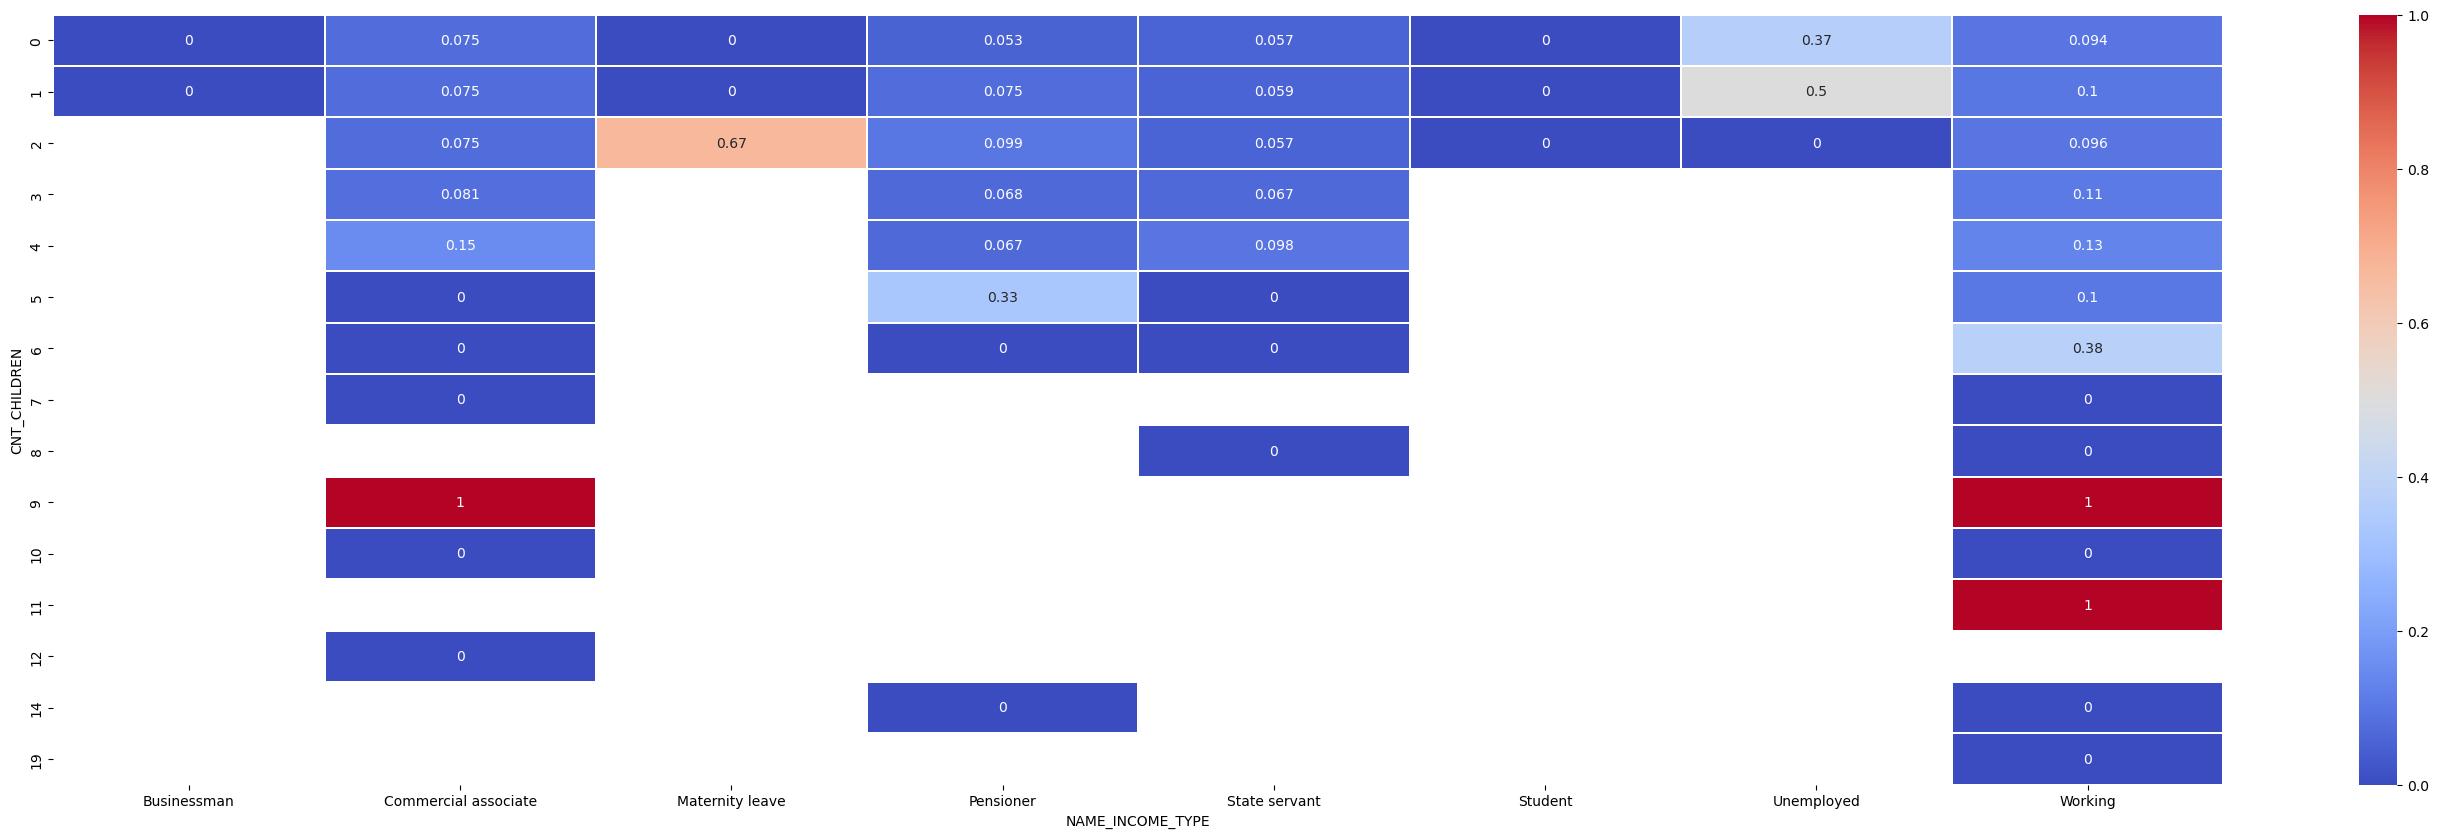

In [100]:
# Heatmap to find the association between CNT_CHILDREN and NAME_INCOME_TYPE
CAT_CAT_ANALYSIS("CNT_CHILDREN","NAME_INCOME_TYPE")

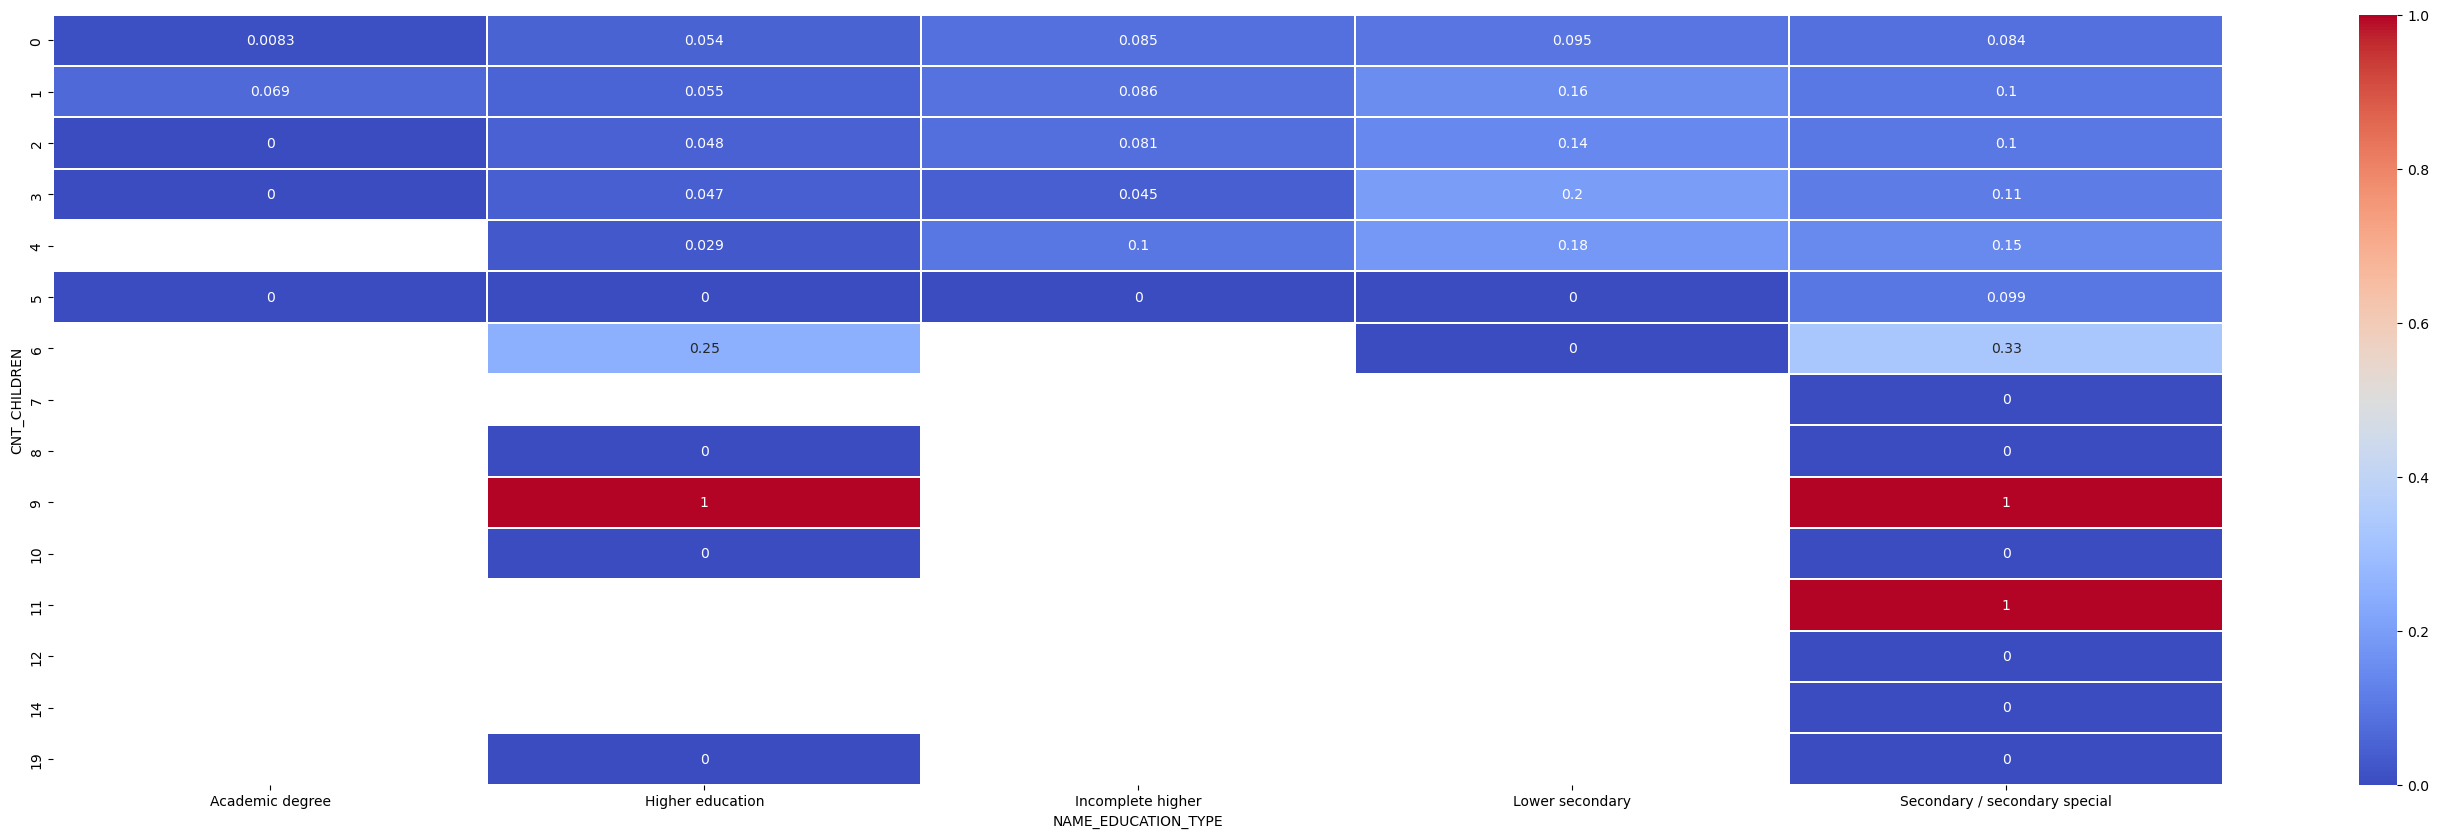

In [101]:
# Heatmap to find the association between CNT_CHILDREN and NAME_EDUCATION_TYPE
CAT_CAT_ANALYSIS("CNT_CHILDREN","NAME_EDUCATION_TYPE")

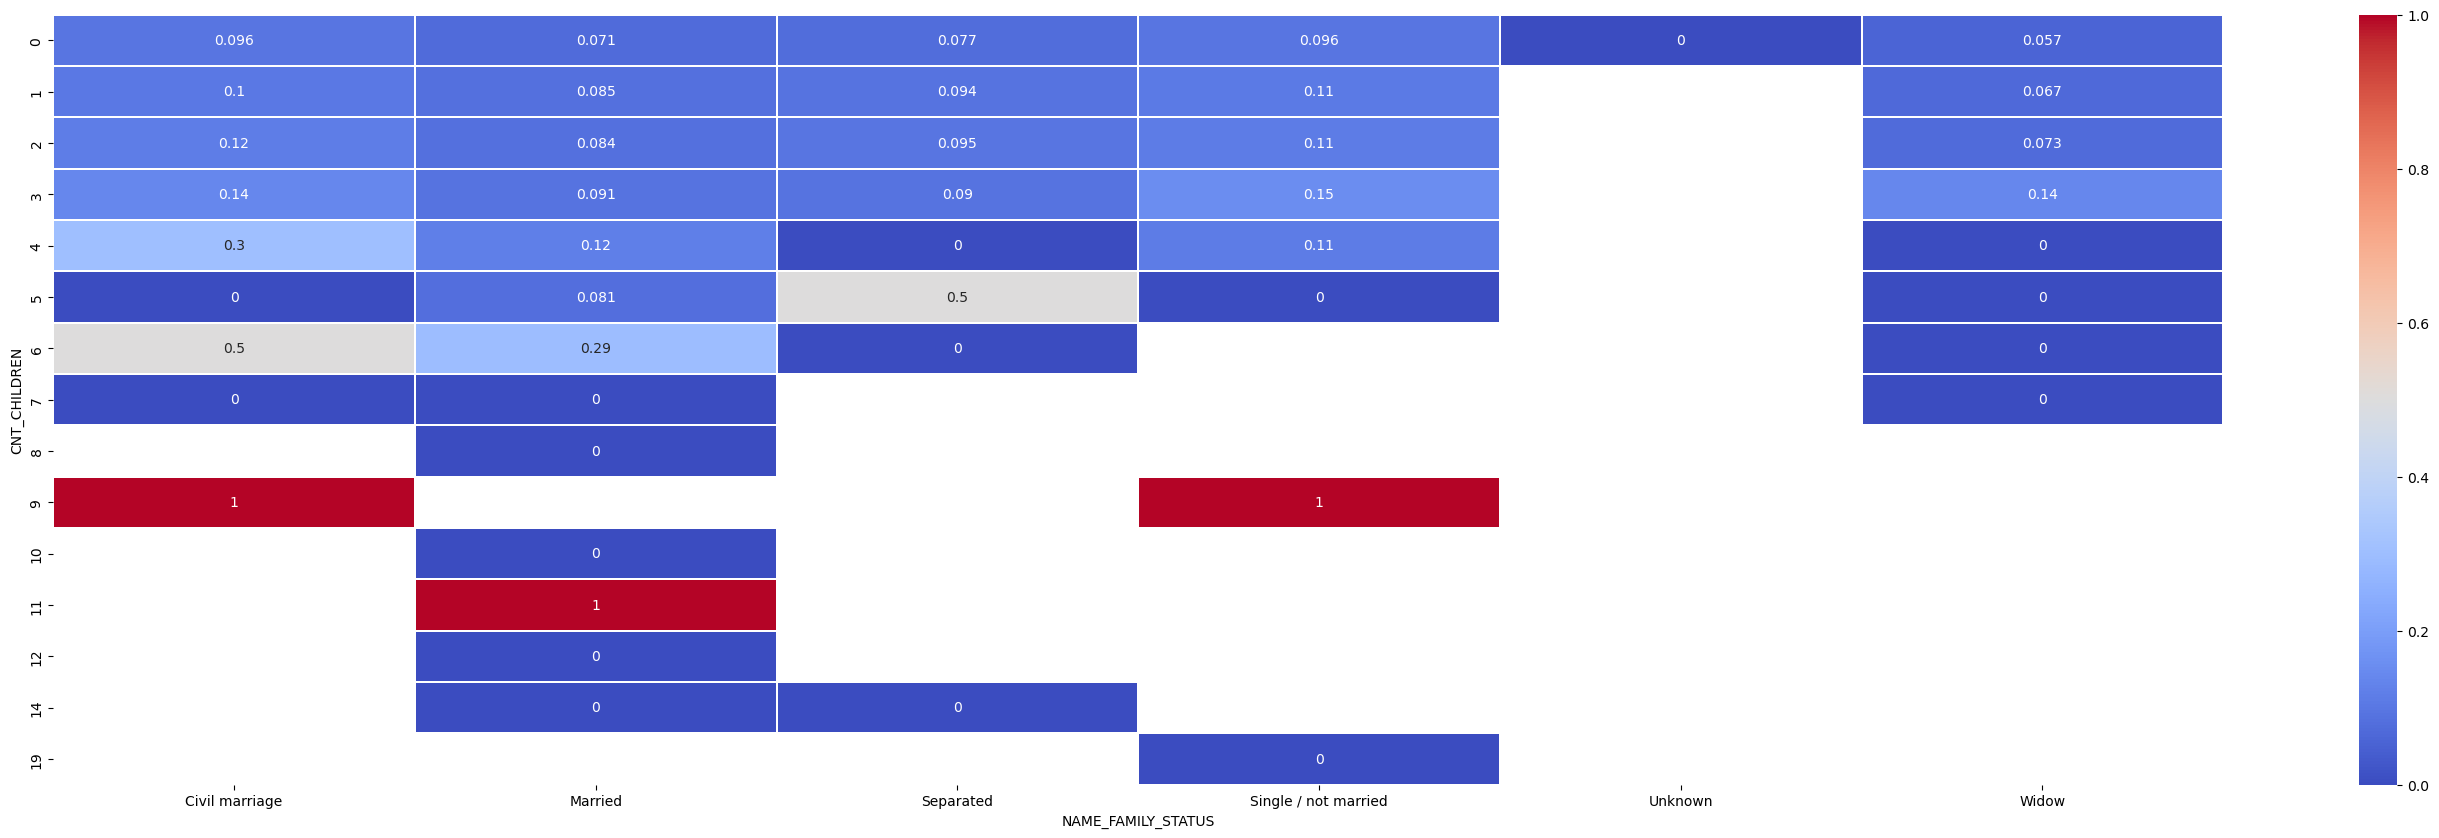

In [102]:
# Heatmap to find the association between CNT_CHILDREN and NAME_FAMILY_STATUS
CAT_CAT_ANALYSIS("CNT_CHILDREN","NAME_FAMILY_STATUS")

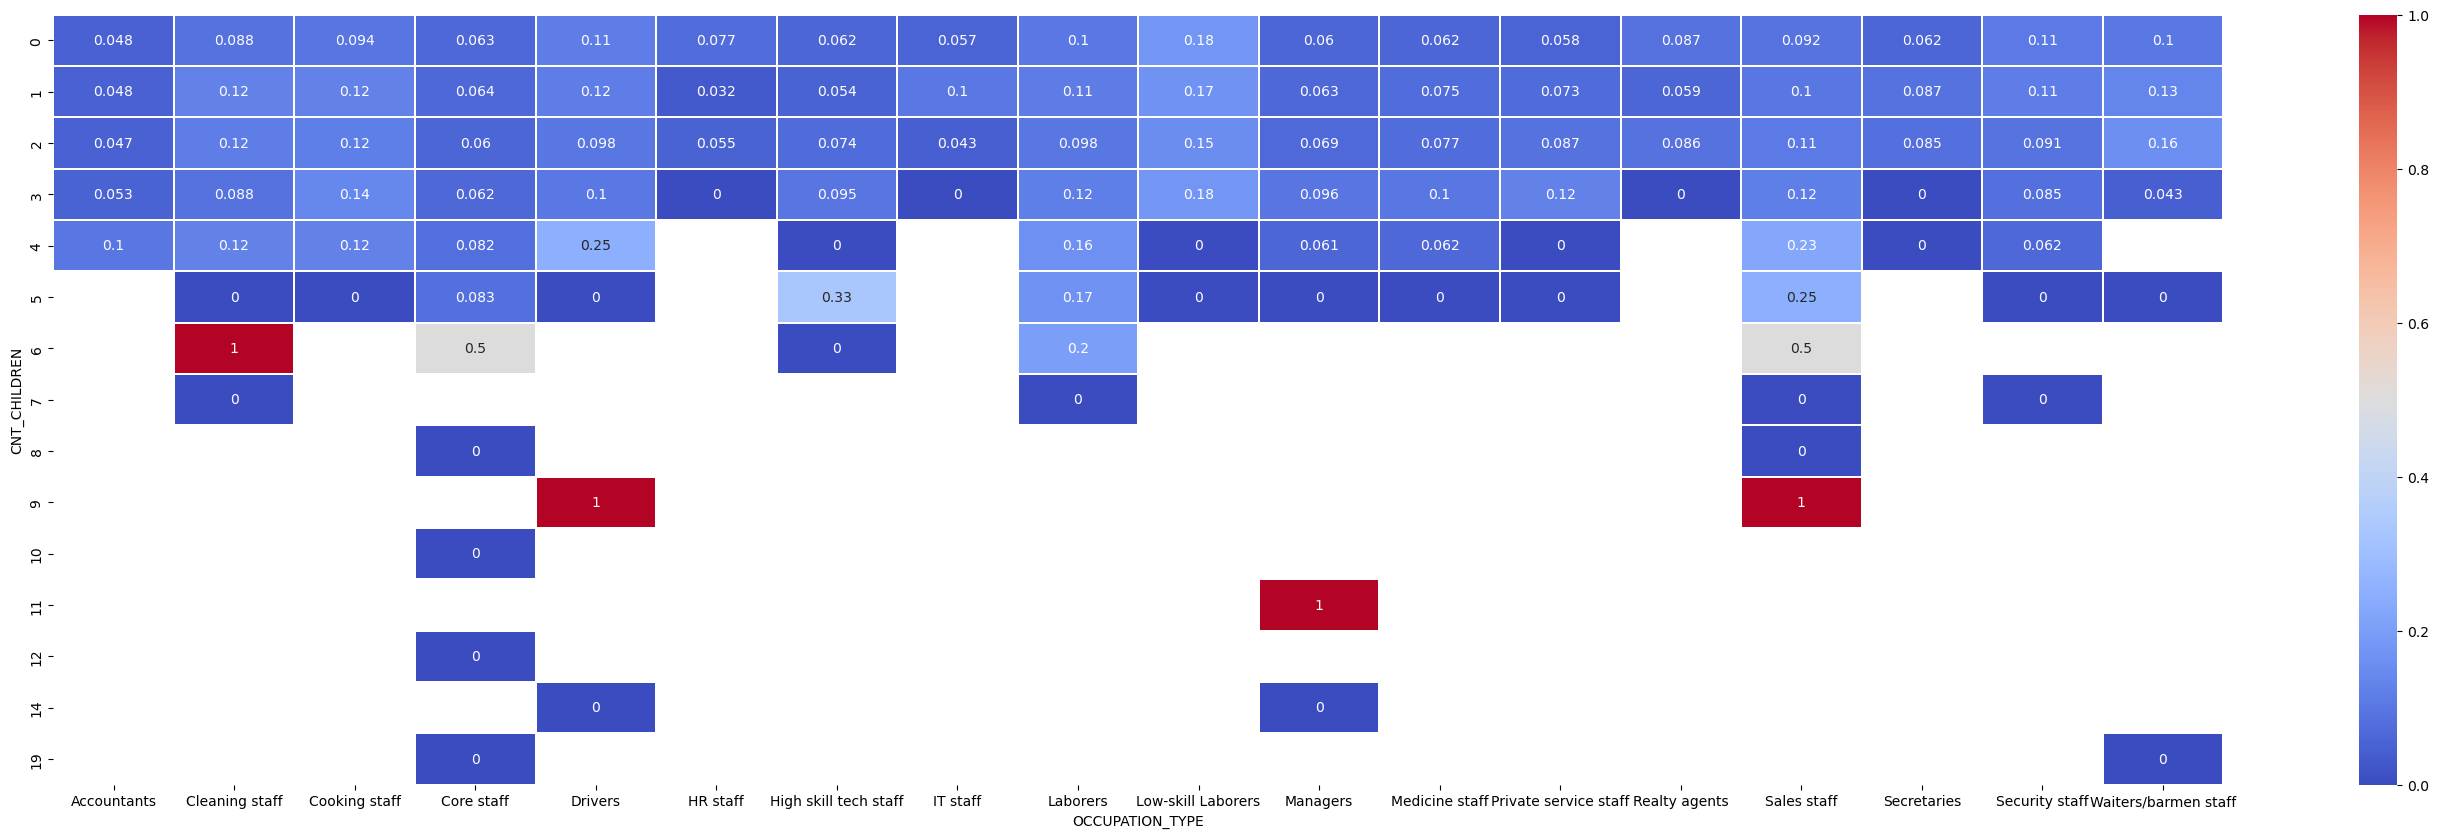

In [103]:
# Heatmap to find the association between CNT_CHILDREN and OCCUPATION_TYPE
CAT_CAT_ANALYSIS("CNT_CHILDREN","OCCUPATION_TYPE")

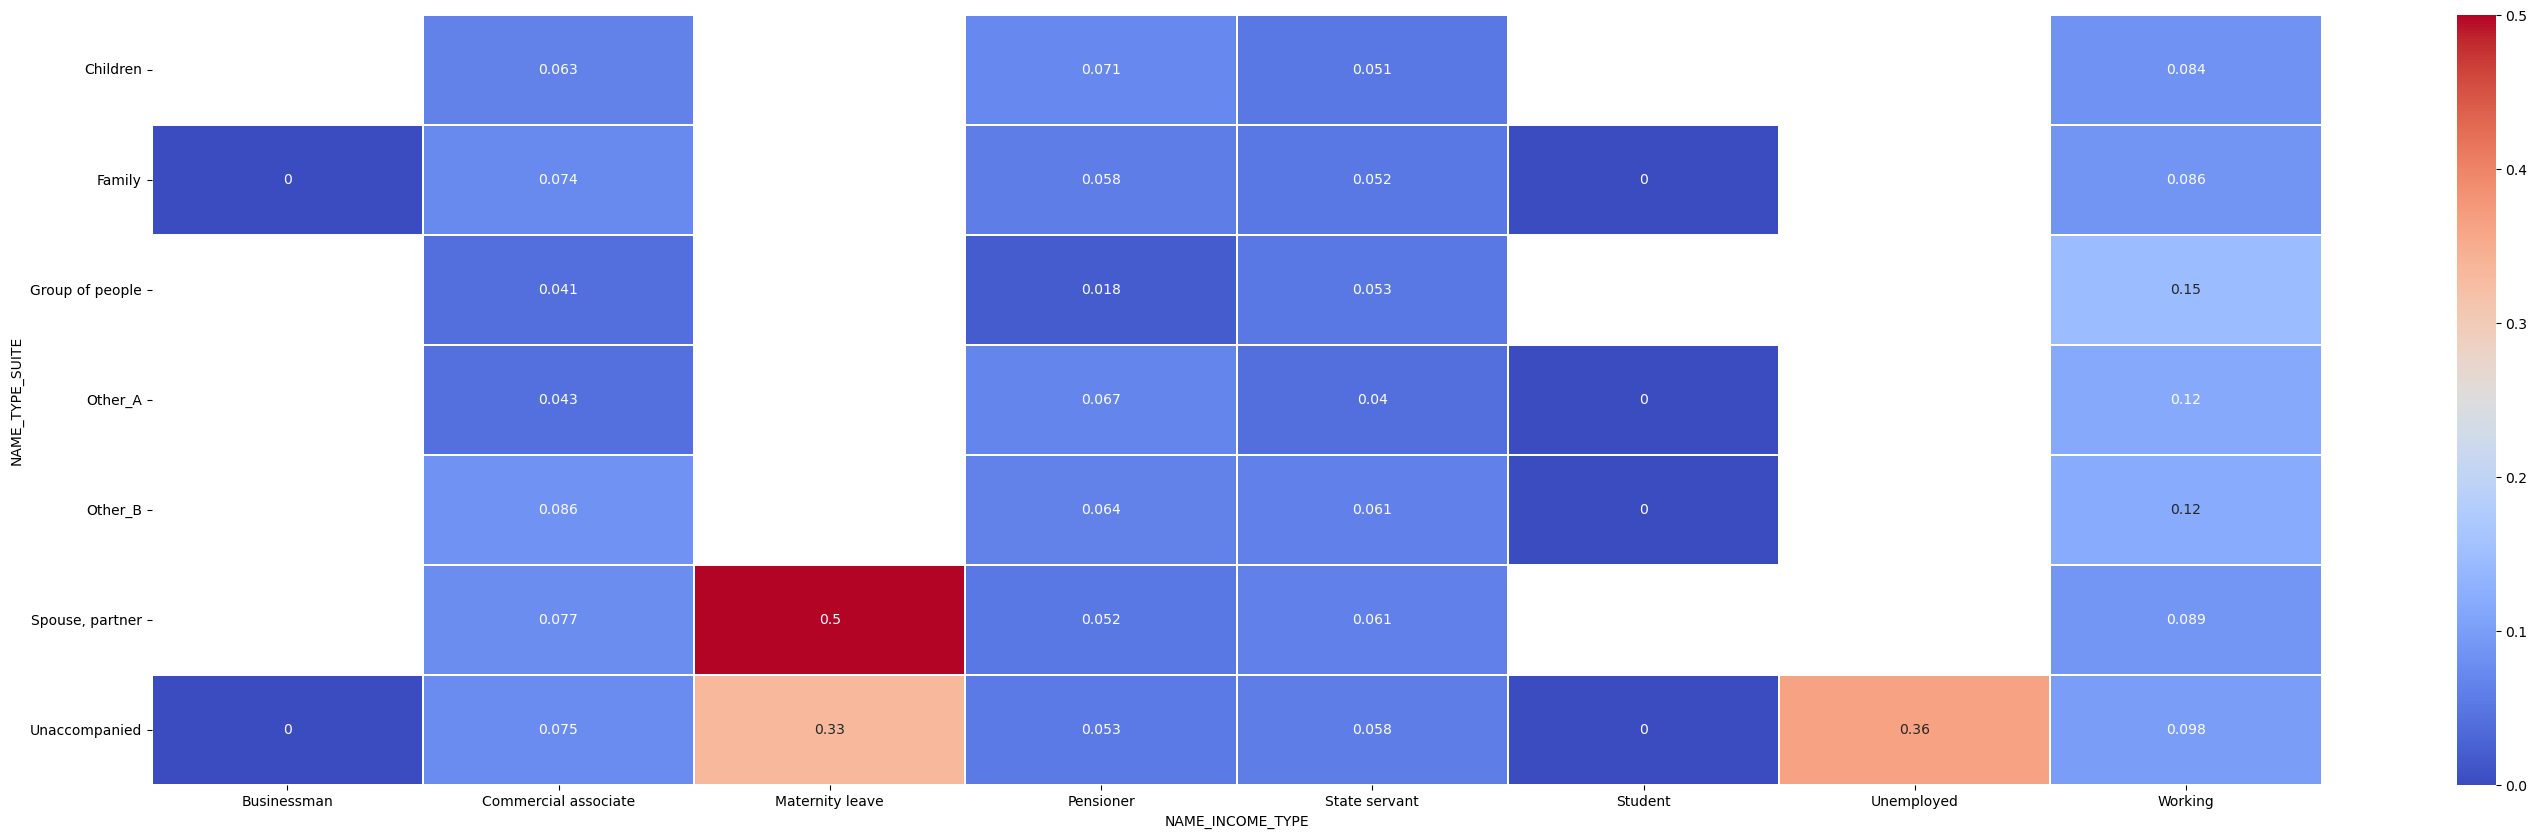

In [104]:
# Heatmap to find the association between NAME_TYPE_SUITE and NAME_INCOME_TYPE
CAT_CAT_ANALYSIS("NAME_TYPE_SUITE", "NAME_INCOME_TYPE")

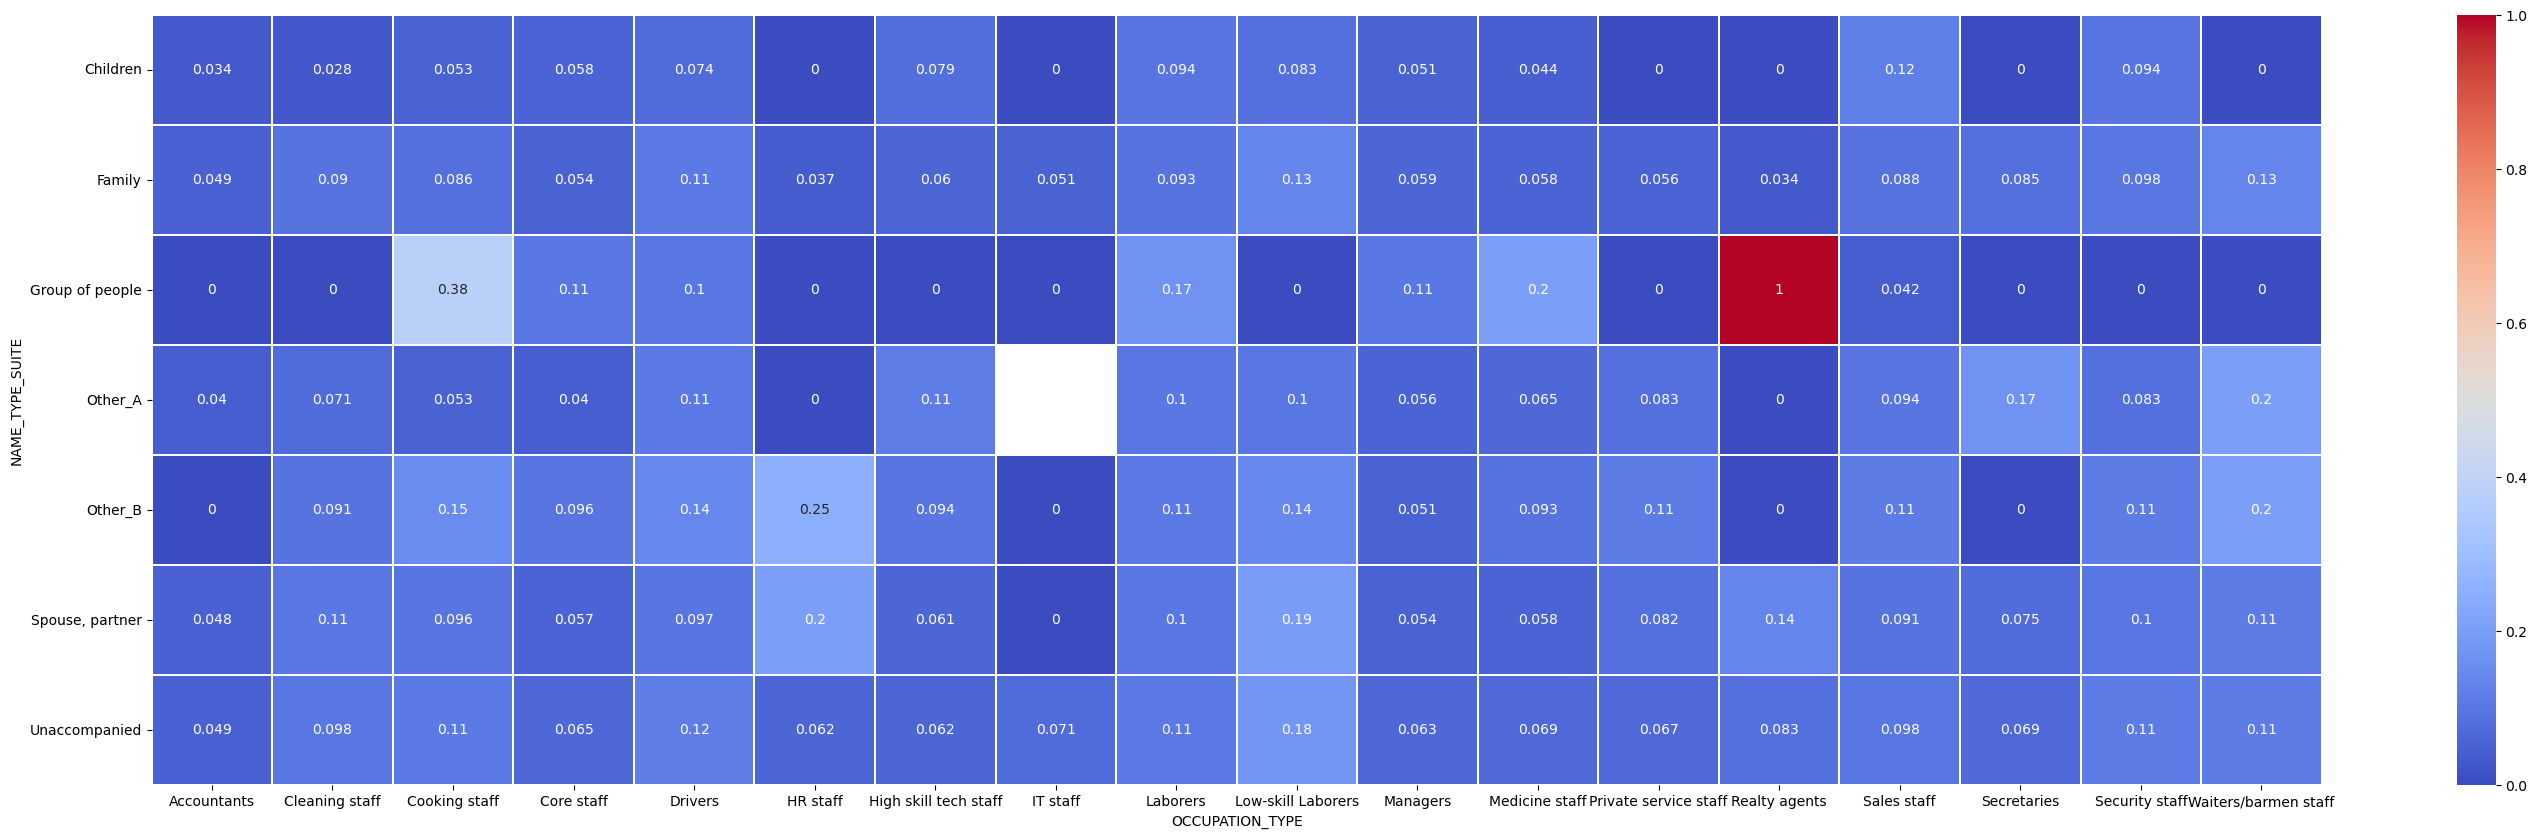

In [105]:
# Heatmap to find the association between NAME_TYPE_SUITE and OCCUPATION_TYPE
CAT_CAT_ANALYSIS("NAME_TYPE_SUITE", "OCCUPATION_TYPE")

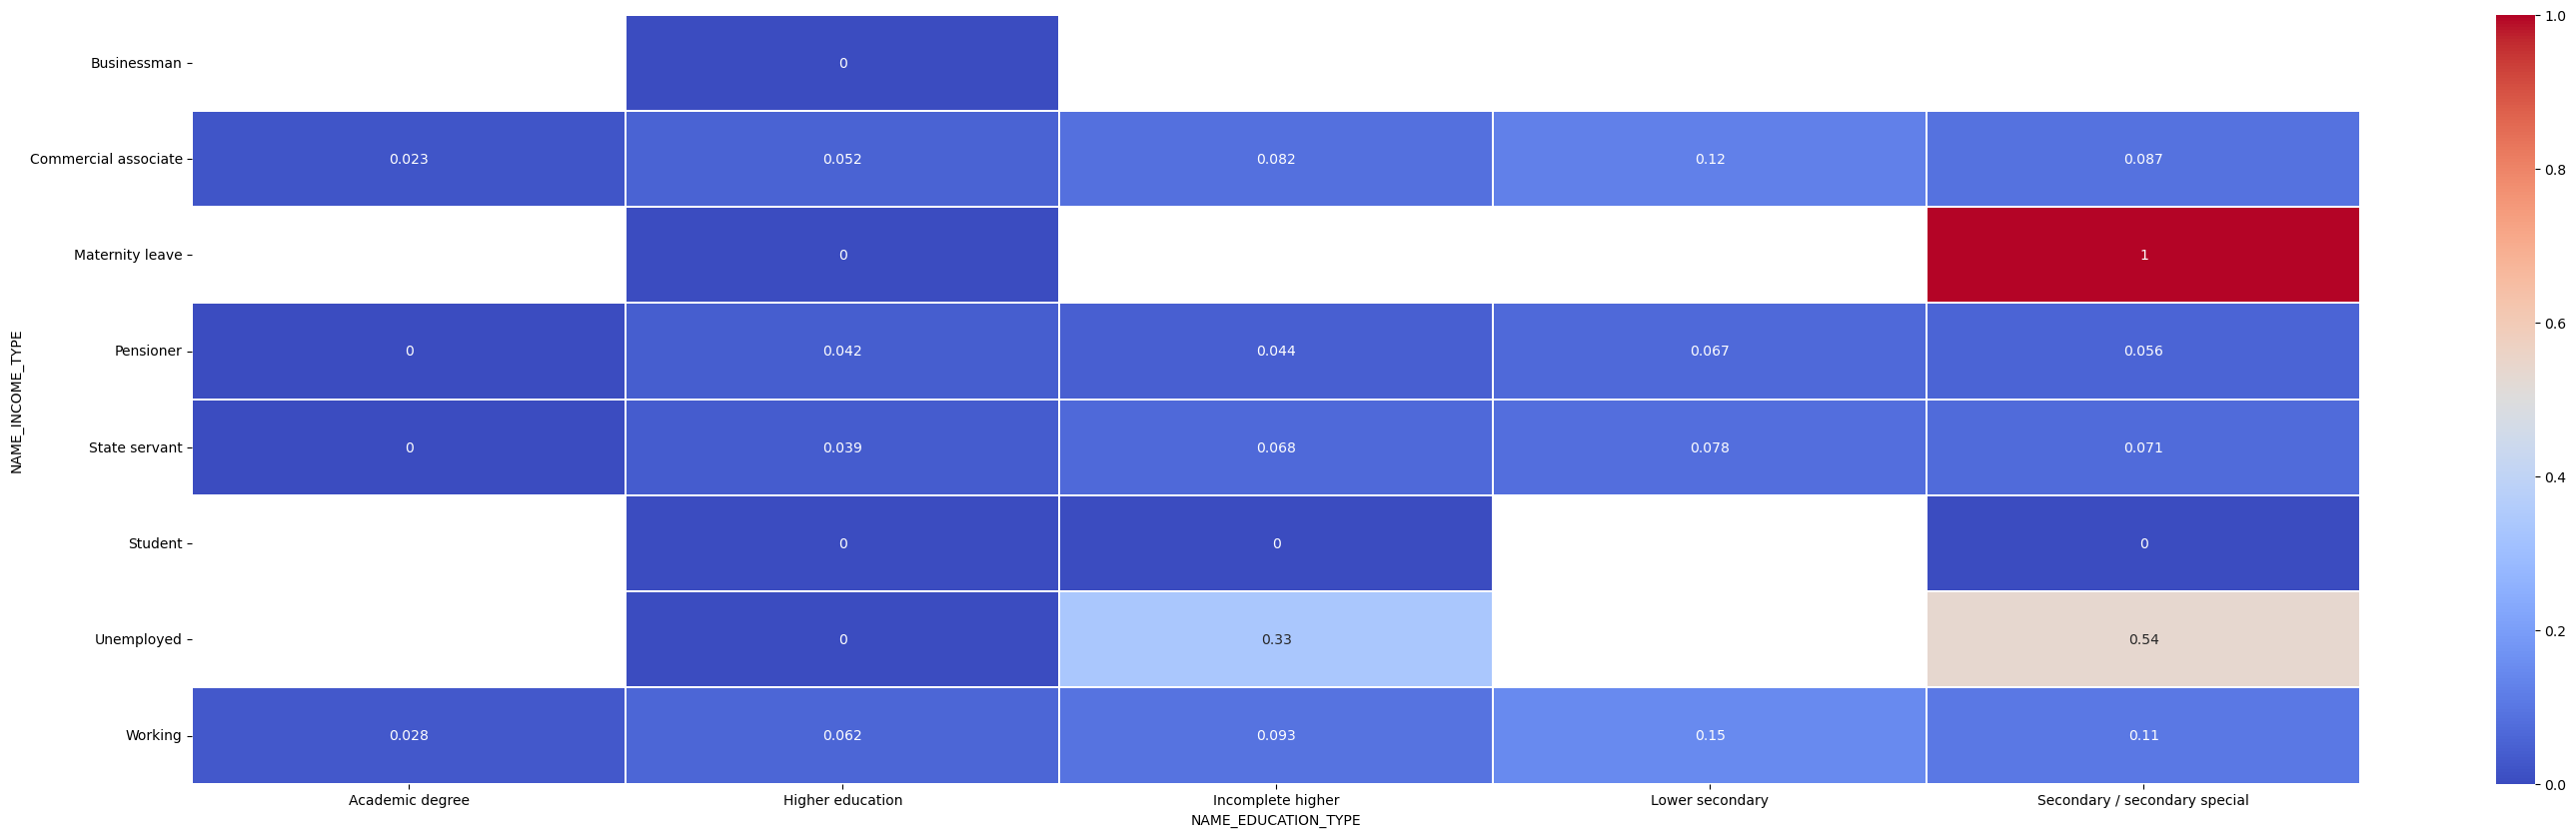

In [106]:
# Heatmap to find the association between NAME_INCOME_TYPE and NAME_EDUCATION_TYPE
CAT_CAT_ANALYSIS("NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE")

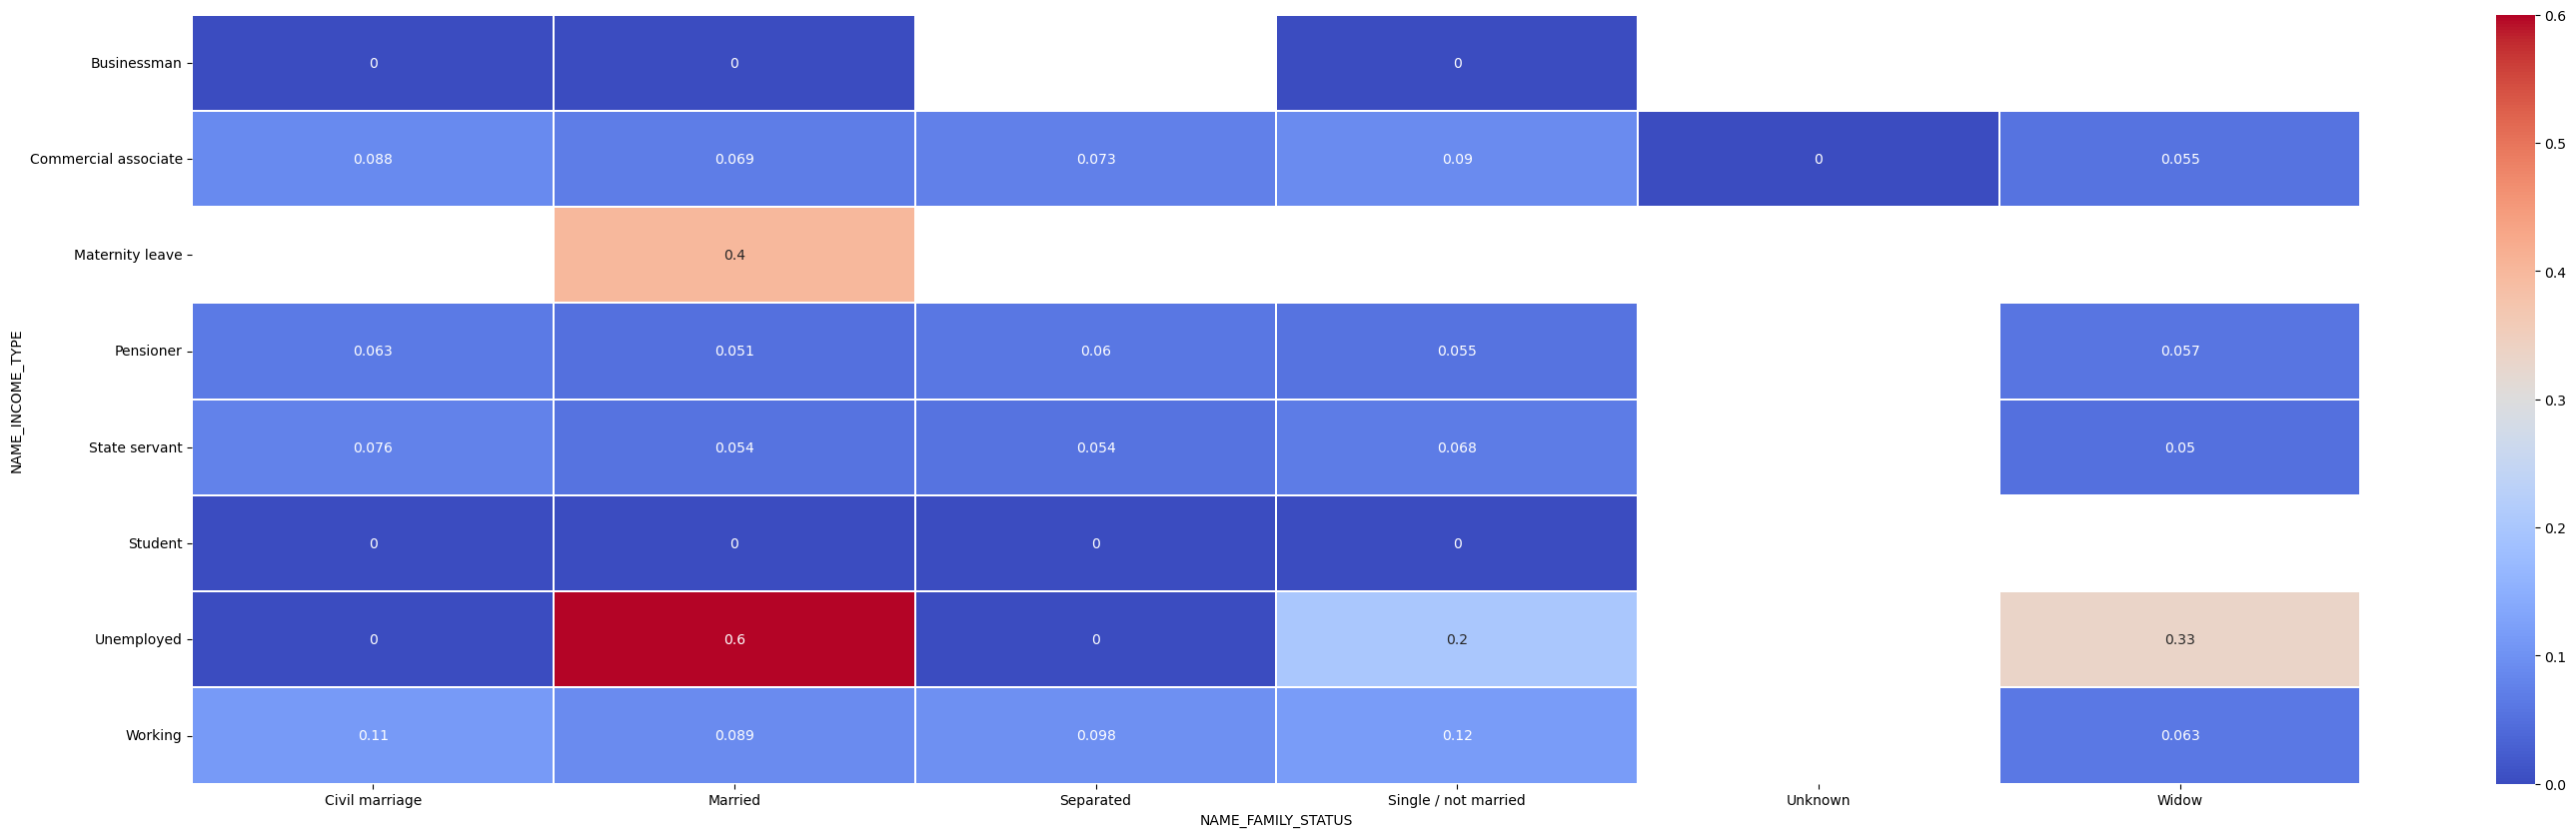

In [107]:
# Heatmap to find the association between NAME_INCOME_TYPE and NAME_FAMILY_STATUS
CAT_CAT_ANALYSIS("NAME_INCOME_TYPE","NAME_FAMILY_STATUS")

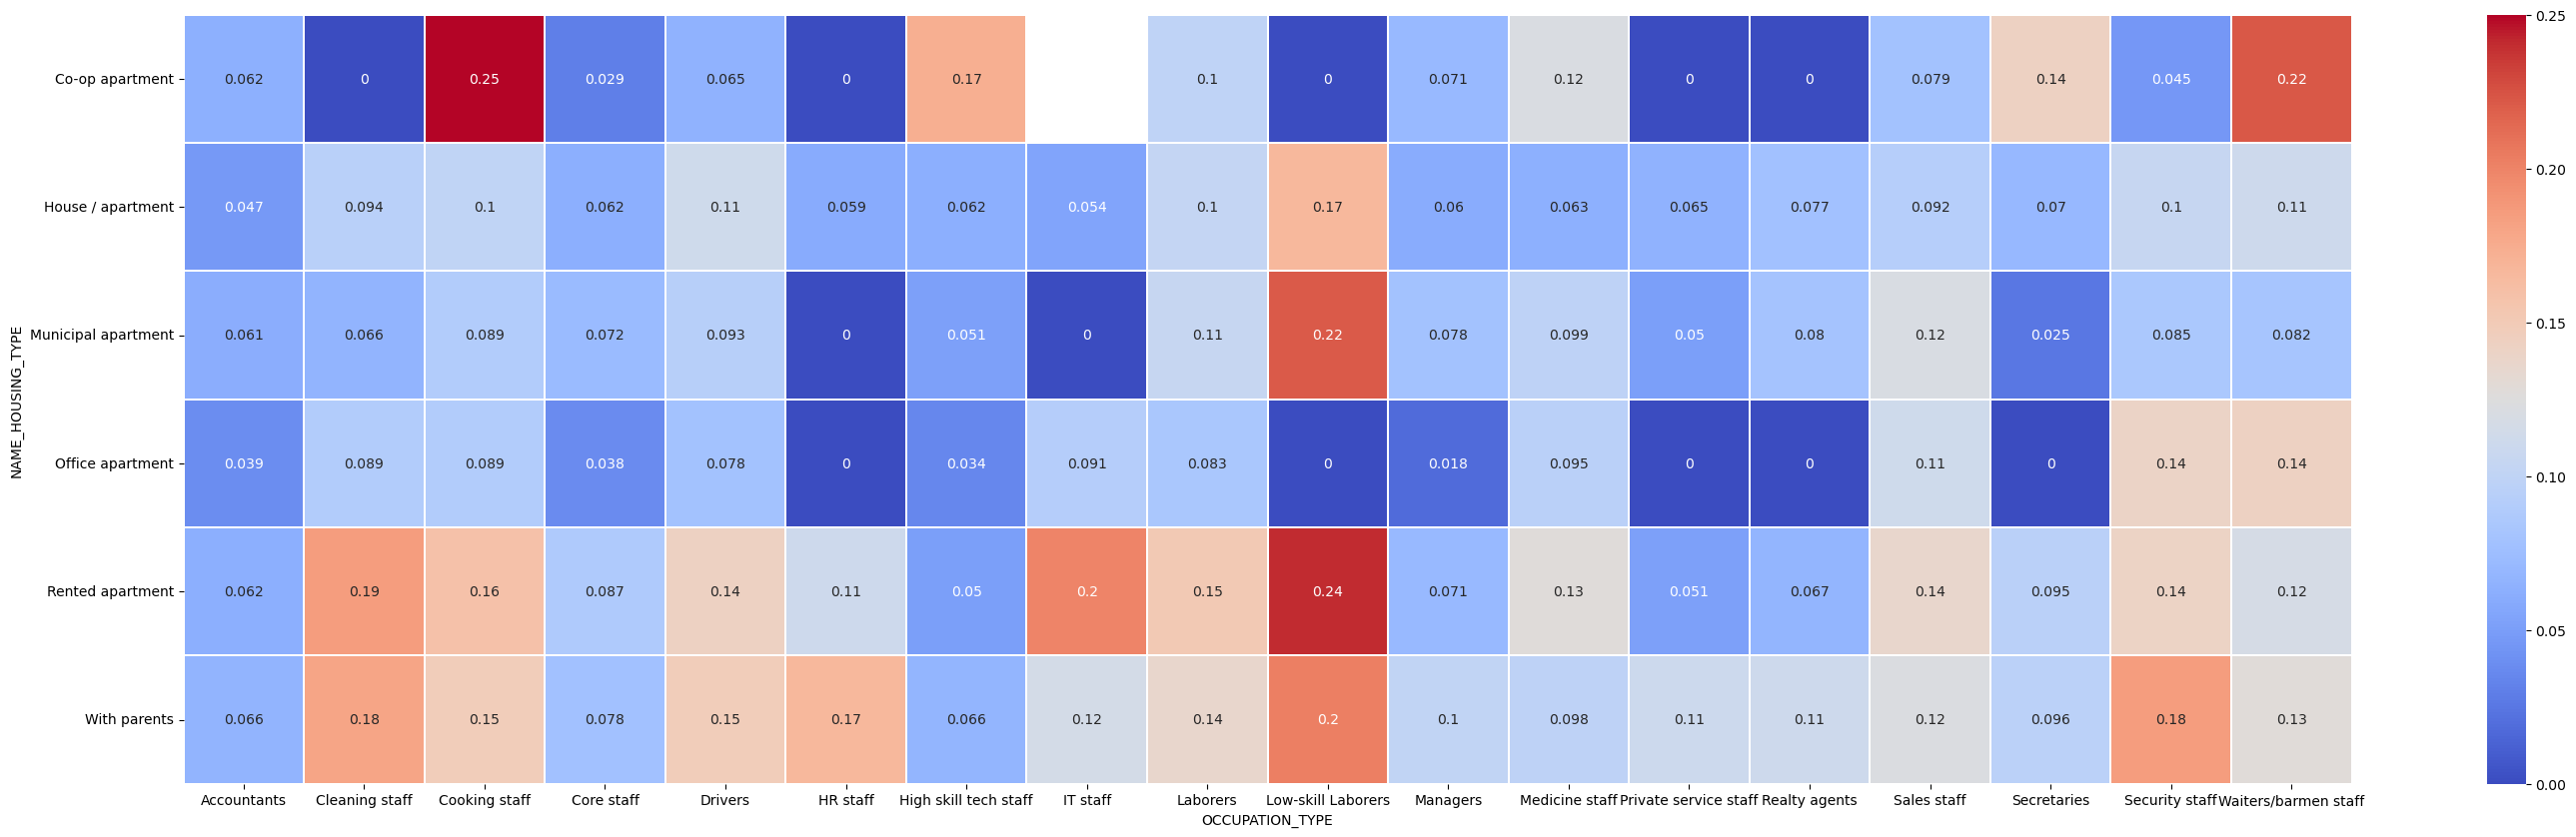

In [108]:
# Heatmap to find the association between NAME_HOUSING_TYPE and OCCUPATION_TYPE
CAT_CAT_ANALYSIS("NAME_HOUSING_TYPE","OCCUPATION_TYPE")

In [109]:
# Importing the 'previous_application' Dataset.
Previous_data = pd.read_csv("previous_application.csv")

In [110]:
# Checking previous dataframe 
Previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [111]:
# Checking for null values.
Previous_data_null = (Previous_data.isnull().sum()/len(Previous_data))*100
Previous_data_null

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [112]:
# Removing the columns with a large number of null values.
Previous_data.drop(Previous_data_null[Previous_data_null.values>=40].index, axis = 1, inplace = True)

# Merging both the data files(application_data and previous_application)

In [113]:
# Merging the data 
merged_data = data.merge(Previous_data, on= 'SK_ID_CURR', how = 'inner')

In [114]:
# Checking the merged data
merged_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801   25.920548           -637           9.994521   
1                    0.003541   45.931507          -1188           3.249315   
2                    0.003541   45.931507          -1188           3.249315   
3                    0.003541   45.931507          -1188           3.249315   
4                    0.010032   52.180822           -225          11.671233   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0         5.808219        Laborers              1.0                     2   
1         0.797260      Core staff              2.0                     1   
2         0.797260      Core staff              2.0                     1   
3         0.797260      Core staff              2.0                     1   
4         6.934247        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            1                           0   
3                            1                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

        ORGANIZATION_TYPE  DAYS_LAST_PHONE_CHANGE  \
0  Business Entity Type 3                 -1134.0   
1                 

In [115]:
# Checking the shape of the merged data
merged_data.shape

(1413701, 60)

# STUDY OF OUTLIERS AND DATA DISTRIBUTION IN PREVIOUS DATA

In [116]:
# Defining a function for boxplots to spot outliers
def box_plot_p(VAR):
    plt.figure(figsize = [10,5])
    g = sns.catplot(x="TARGET",
    y=VAR,
    kind="box",
    data=merged_data)
    plt.show()

<Figure size 1000x500 with 0 Axes>

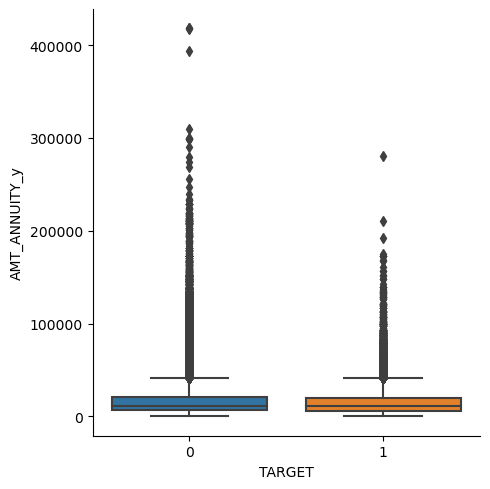

In [117]:
# BoxPlot for AMT_ANNUITY_y
box_plot_p("AMT_ANNUITY_y")

<Figure size 1000x500 with 0 Axes>

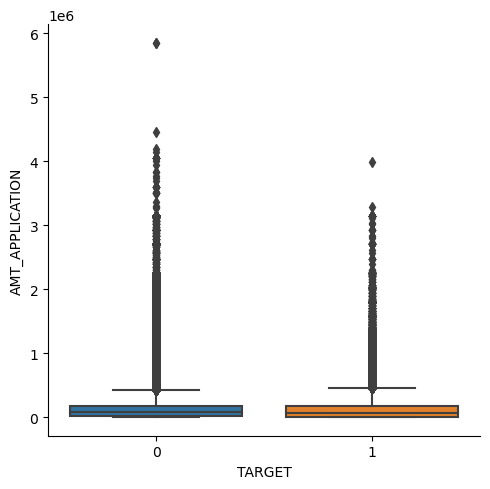

In [118]:
# BoxPlot for AMT_APPLICATION
box_plot_p("AMT_APPLICATION")

<Figure size 1000x500 with 0 Axes>

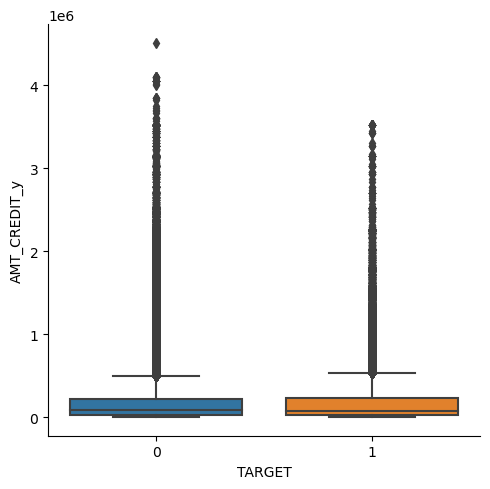

In [119]:
# BoxPlot for AMT_CREDIT_y
box_plot_p("AMT_CREDIT_y")

In [120]:
# Defining a function to analyse the "merged data"
def bar_plot_previous(Attribute, hori = True, rot = False):
    variable = merged_data[Attribute].value_counts(normalize = True)
    Variable_Data_Percentage = merged_data.groupby(merged_data[Attribute]).mean()
    Variable_Data_plot = Variable_Data_Percentage['TARGET']
    if hori:
        plt.figure(figsize=[15,7])
        plt.subplot(1,2,1)
        sns.barplot(x = variable.index, y = variable.values, palette= 'magma')
        plt.xlabel(Attribute)
        plt.ylabel("Percentage of Applicants")
        if rot:
            plt.xticks(rotation = 90)    
        plt.subplot(1,2,2)
        sns.barplot(x = Variable_Data_plot.index, y = Variable_Data_plot.values, palette= 'magma')
        plt.xlabel(Attribute)
        plt.ylabel("Percentage of clients having difficulty in repaying loan")
        if rot:
            plt.xticks(rotation = 90)
        plt.show()
    else:
        plt.figure(figsize=[14,20])
        plt.subplot(2,1,1)
        sns.barplot(x = variable.index, y = variable.values, palette= 'magma')
        plt.xlabel(Attribute)
        plt.ylabel("Percentage of Applicants")
        if rot:
            plt.xticks(rotation = 90)
        
        plt.subplot(2,1,2)
        sns.barplot(x = Variable_Data_plot.index, y = Variable_Data_plot.values,palette= 'magma')
        plt.xlabel(Attribute)
        plt.ylabel("Percentage of clients having difficulty in repaying loan")
        if rot:
            plt.xticks(rotation = 90)
        plt.show()

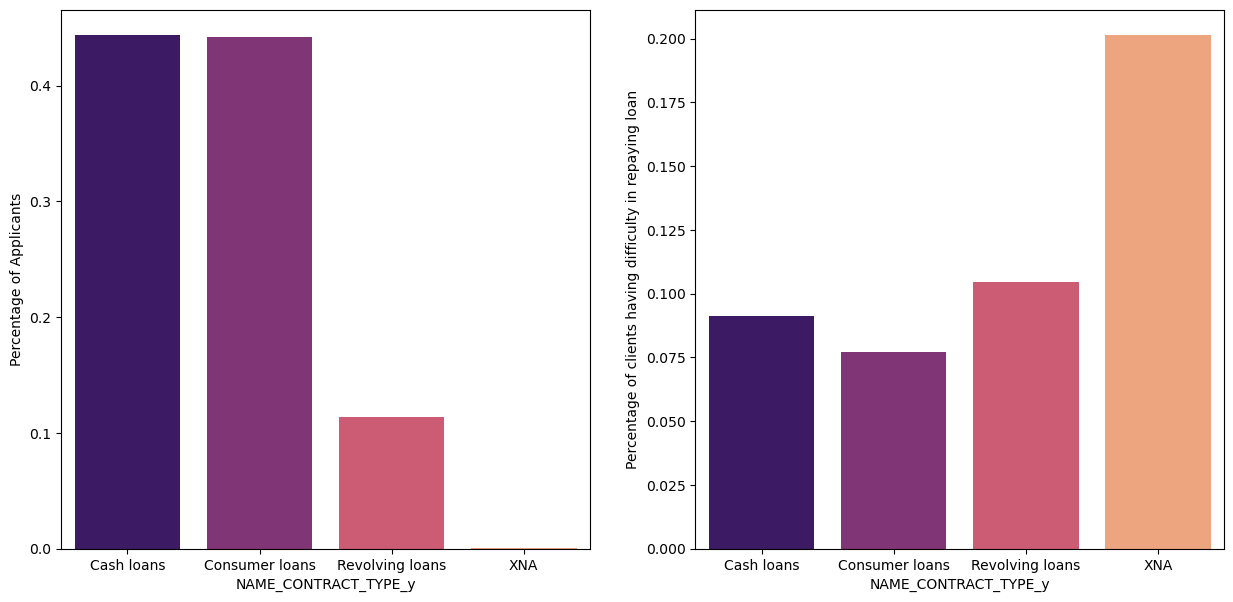

In [121]:
# BarPlots for NAME_CONTRACT_TYPE_y
bar_plot_previous("NAME_CONTRACT_TYPE_y")

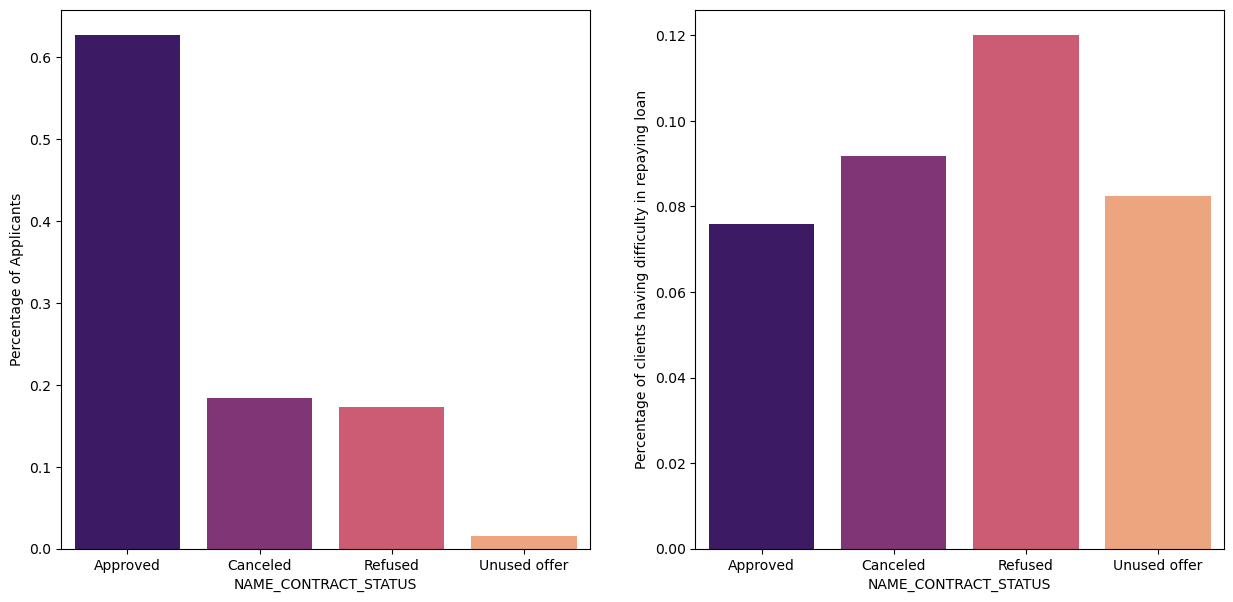

In [122]:
# BarPlots for NAME_CONTRACT_STATUS
bar_plot_previous('NAME_CONTRACT_STATUS')

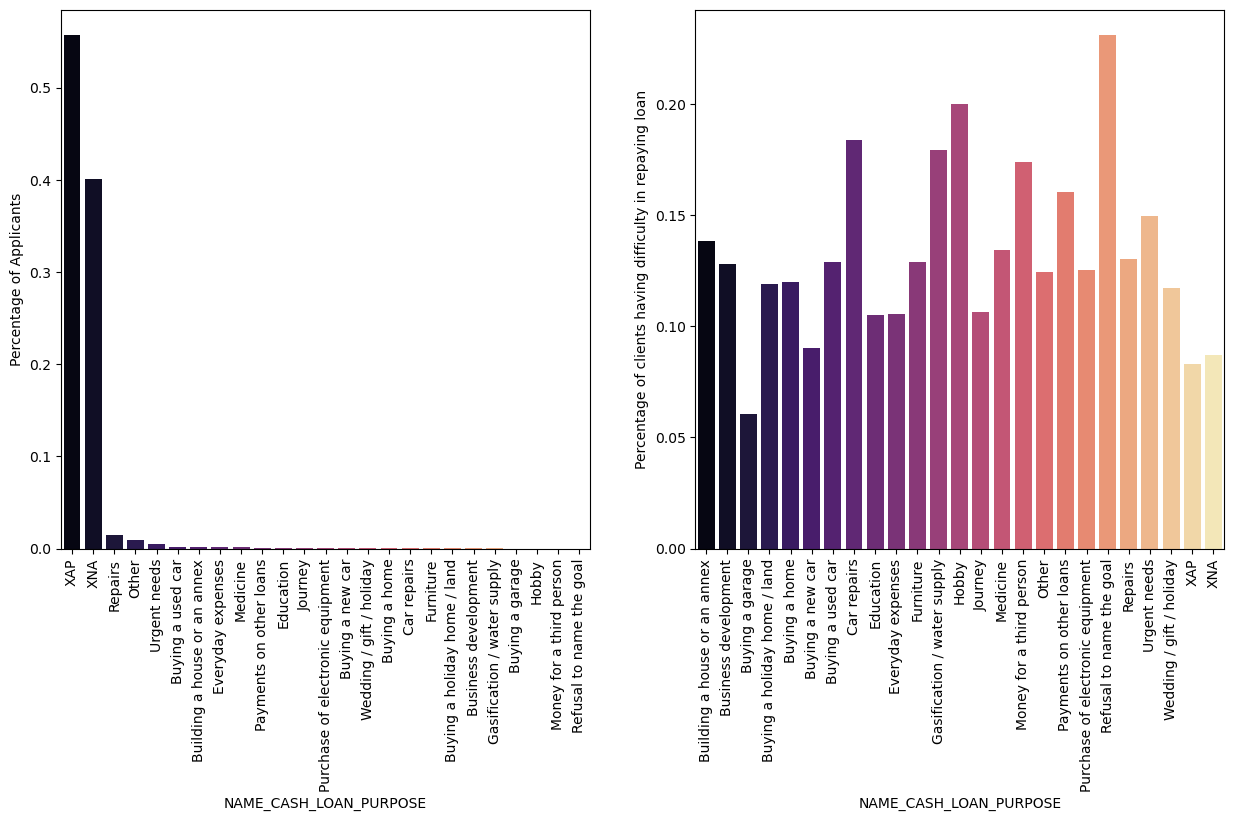

In [123]:
# BarPlots for NAME_CASH_LOAN_PURPOSE
bar_plot_previous("NAME_CASH_LOAN_PURPOSE",rot = True)

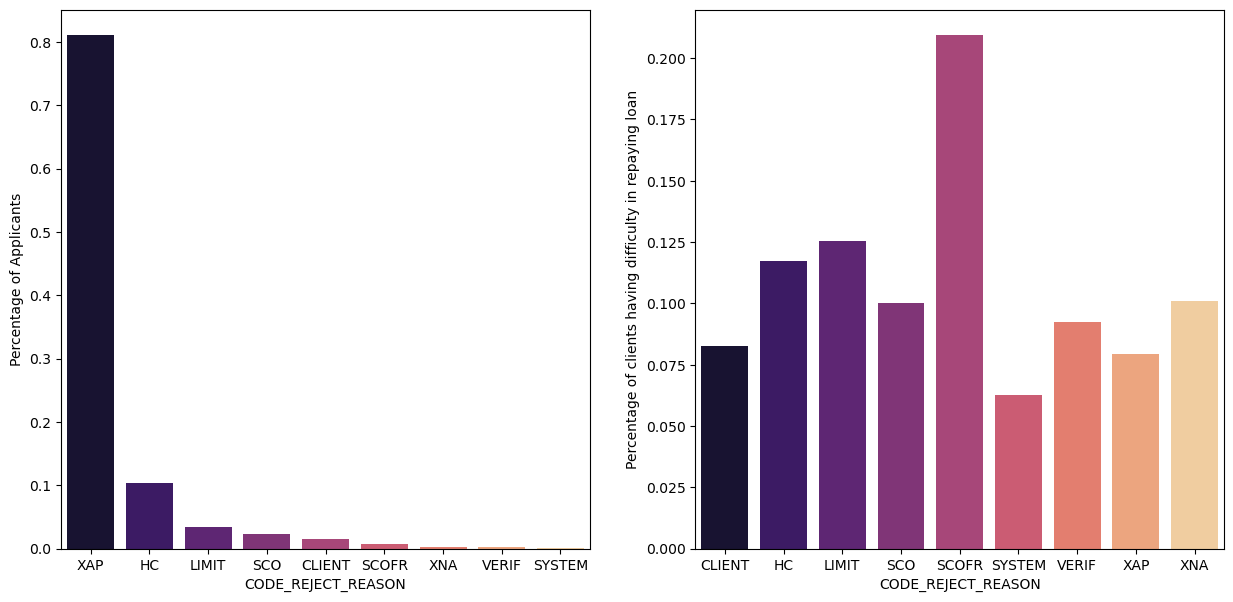

In [124]:
# BarPlots for CODE_REJECT_REASON
bar_plot_previous('CODE_REJECT_REASON')

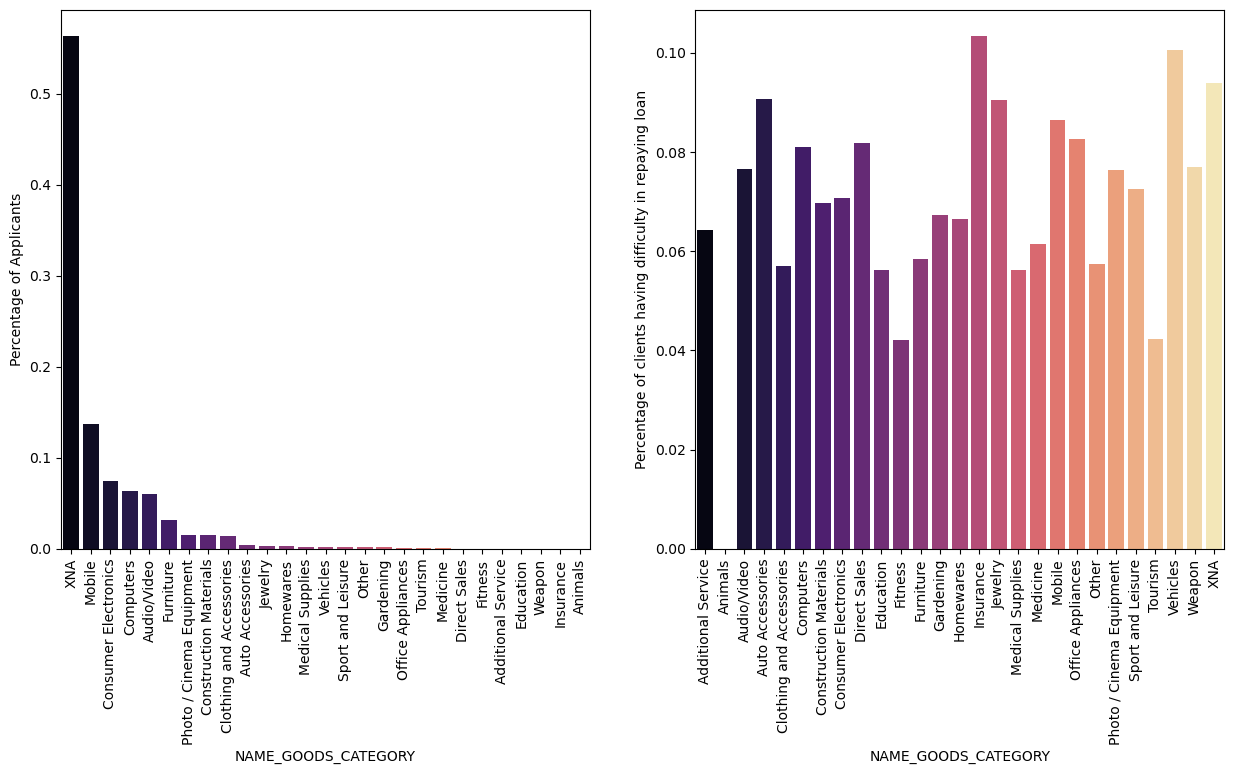

In [125]:

# BarPlots for NAME_GOODS_CATEGORY
bar_plot_previous("NAME_GOODS_CATEGORY", rot = True)

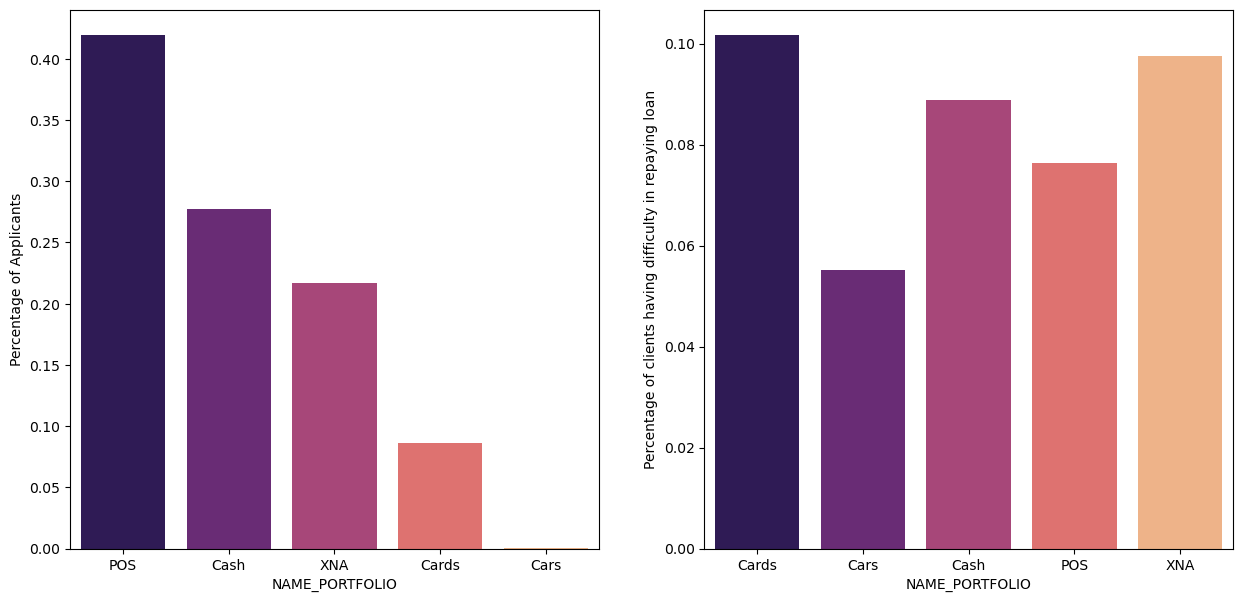

In [126]:
# BarPlots for NAME_PORTFOLIO
bar_plot_previous("NAME_PORTFOLIO")

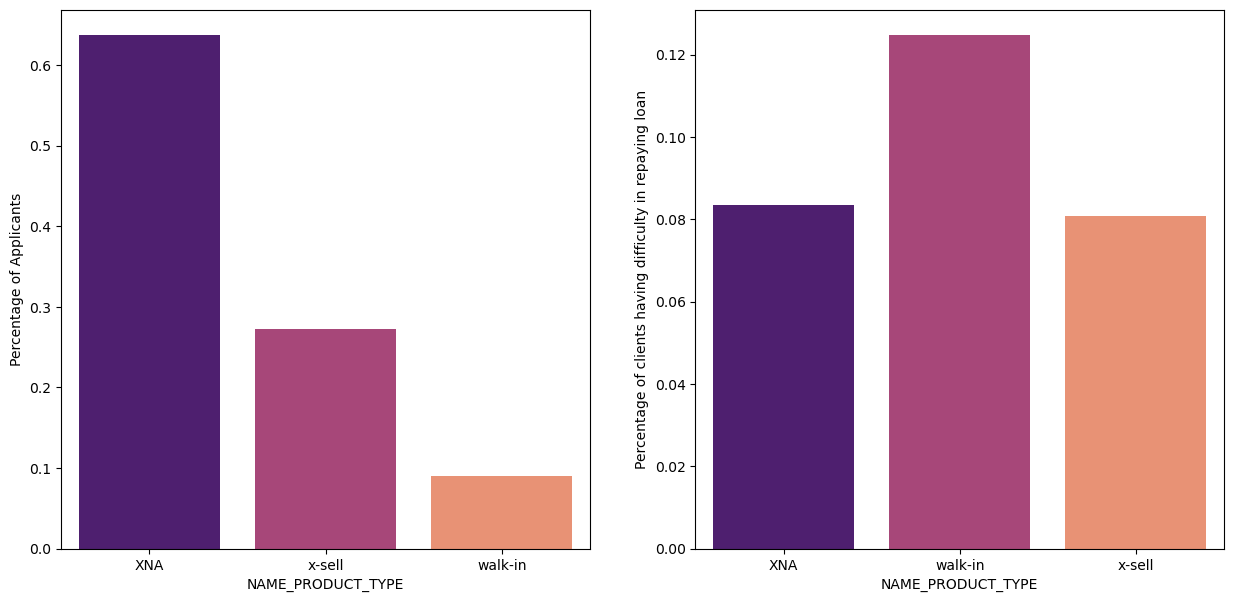

In [127]:
# BarPlots for NAME_PRODUCT_TYPE
bar_plot_previous("NAME_PRODUCT_TYPE")

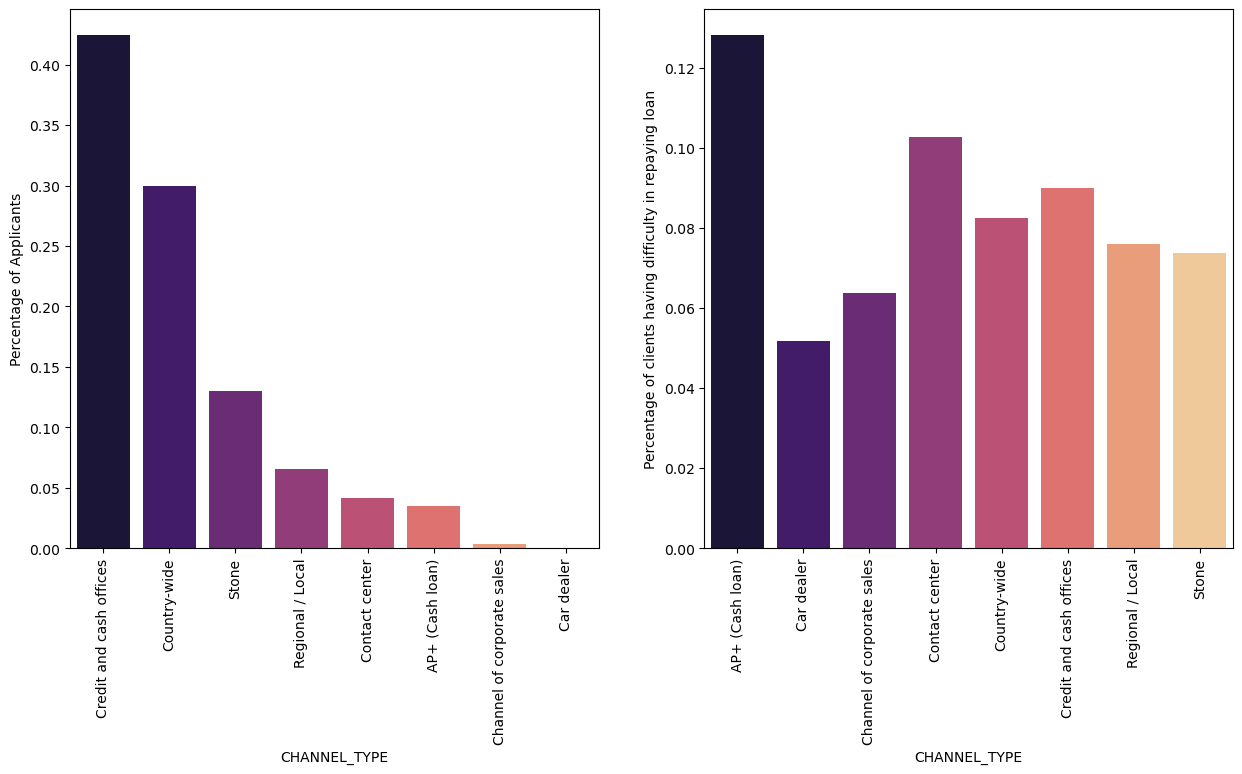

In [128]:
# BarPlots for CHANNEL_TYPE
bar_plot_previous("CHANNEL_TYPE", rot = True)

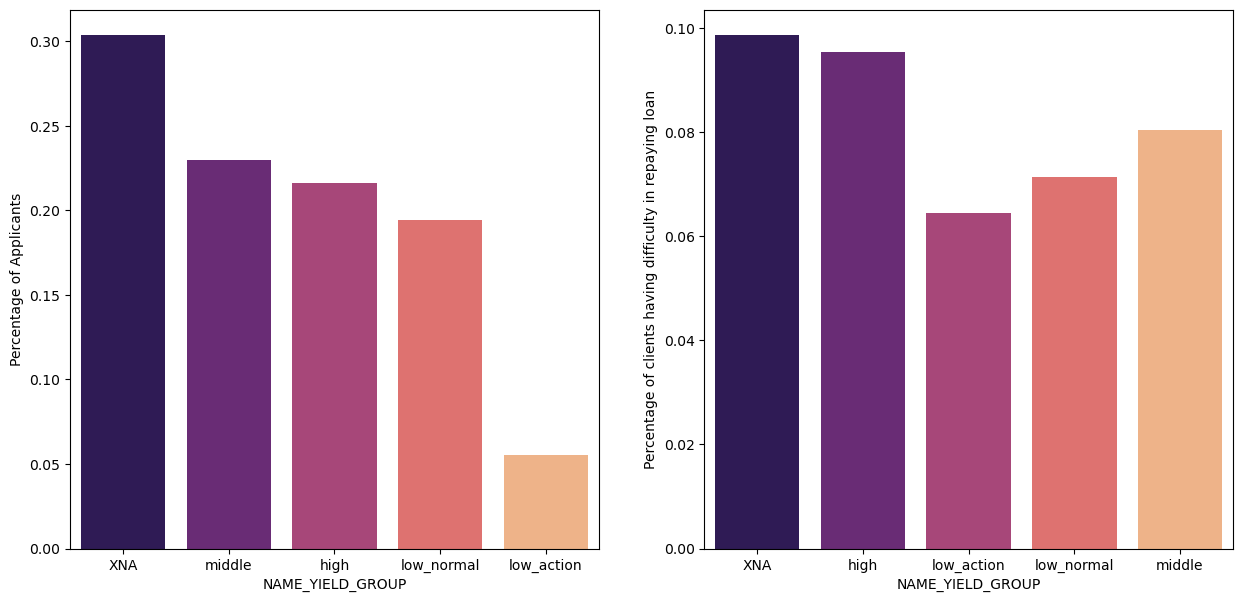

In [129]:
# BarPlots for NAME_YIELD_GROUP
bar_plot_previous("NAME_YIELD_GROUP")

In [130]:
merged_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801   25.920548           -637           9.994521   
1                    0.003541   45.931507          -1188           3.249315   
2                    0.003541   45.931507          -1188           3.249315   
3                    0.003541   45.931507          -1188           3.249315   
4                    0.010032   52.180822           -225          11.671233   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0         5.808219        Laborers              1.0                     2   
1         0.797260      Core staff              2.0                     1   
2         0.797260      Core staff              2.0                     1   
3         0.797260      Core staff              2.0                     1   
4         6.934247        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            1                           0   
3                            1                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

        ORGANIZATION_TYPE  DAYS_LAST_PHONE_CHANGE  \
0  Business Entity Type 3                 -1134.0   
1                 

In [131]:
# Segmenting the merged data w.r.t TARGET variable to better visualize continuous variables
target_p_0 = merged_data.loc[merged_data['TARGET'] == 0]
target_p_1 = merged_data.loc[merged_data['TARGET'] == 1]

In [132]:
# Definind a function to plot continuous variables
def distribution_plot_previous(Attribute):

    plt.figure(figsize = [15,7])
    plt.subplot(1,2,1)
    sns.distplot(merged_data[Attribute], bins= 50, kde= True, rug = True, hist = False)
    plt.ylabel("Frequency")
    
    plt.subplot(1,2,2)
    sns.distplot(target_p_0[Attribute], bins = 50, kde = True, rug= True, hist = False, label = 'TARGET = 0')
    sns.distplot(target_p_1[Attribute], bins = 50, kde = True, rug = True, hist = False, label= 'TARGET = 1')
    plt.ylabel("Frequency")
    plt.show()

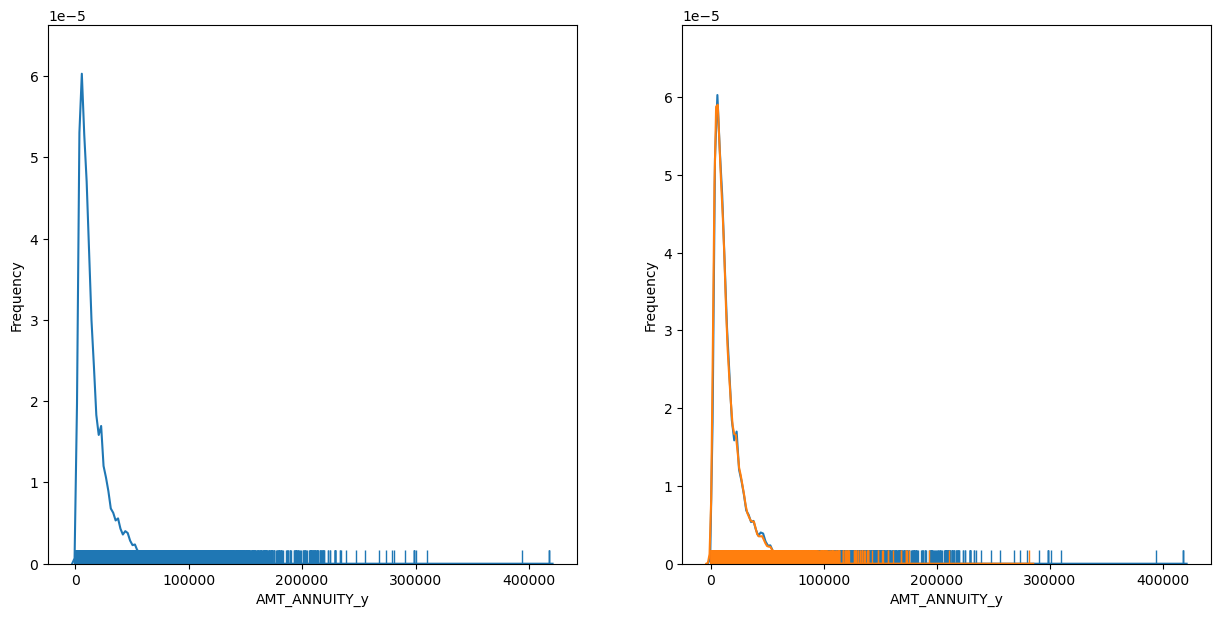

In [133]:
# DistPlots for AMT_ANNUITY_y
distribution_plot_previous("AMT_ANNUITY_y")

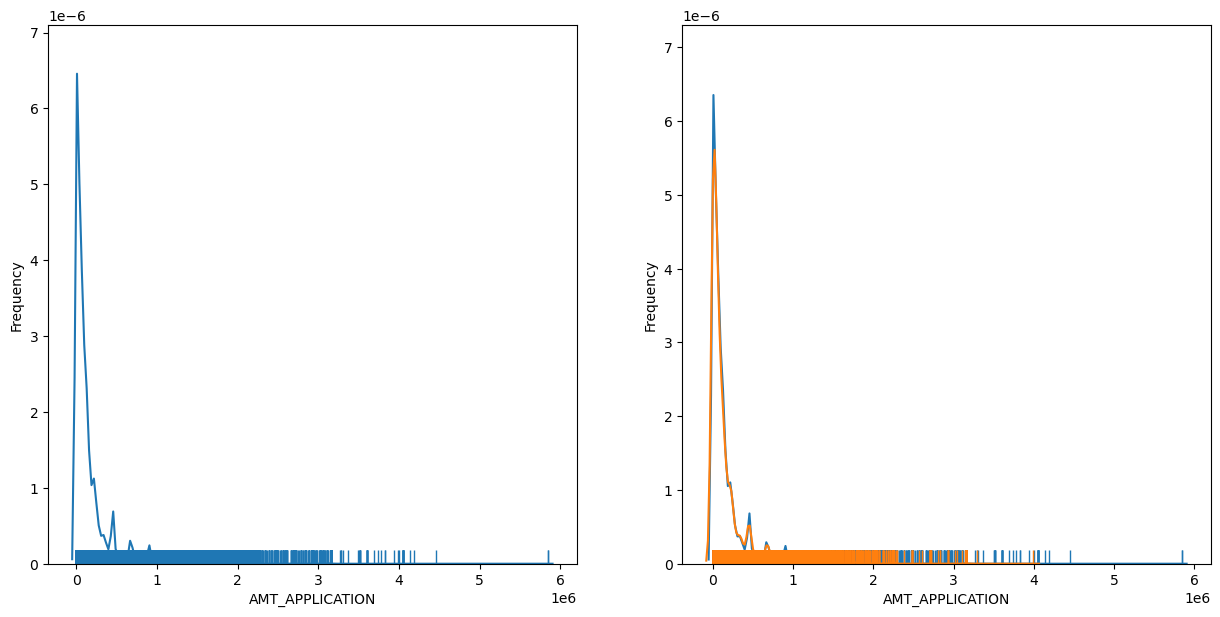

In [134]:
# DistPlots for AMT_APPLICATION
distribution_plot_previous("AMT_APPLICATION")

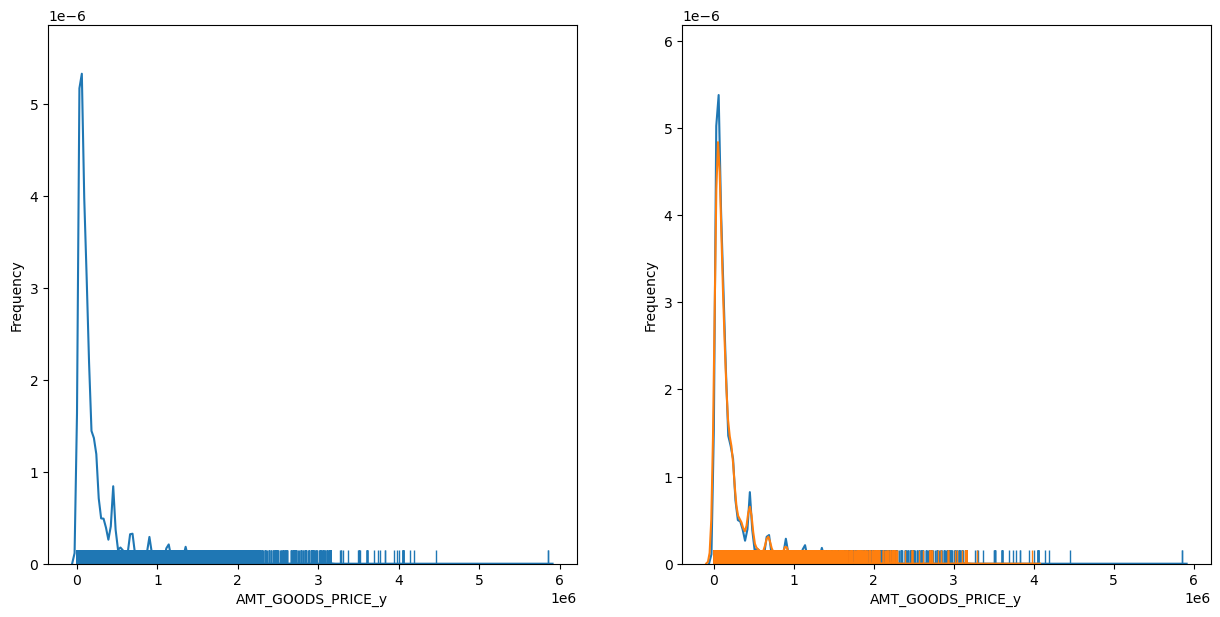

In [135]:
# DistPlots for AMT_GOODS_PRICE_y
distribution_plot_previous("AMT_GOODS_PRICE_y")

In [136]:
# Defining a function for numerical-categorical variable analysis for 'merged data'
def NUMCAT_ANALYSIS_Pre(CATVAR, NUMVAR, rot = False):
    
    plt.figure(figsize=[15,7])
    if rot:
        plt.xticks(rotation = 90)
    sns.boxplot(data = merged_data, x=CATVAR, y= NUMVAR, hue = "TARGET")

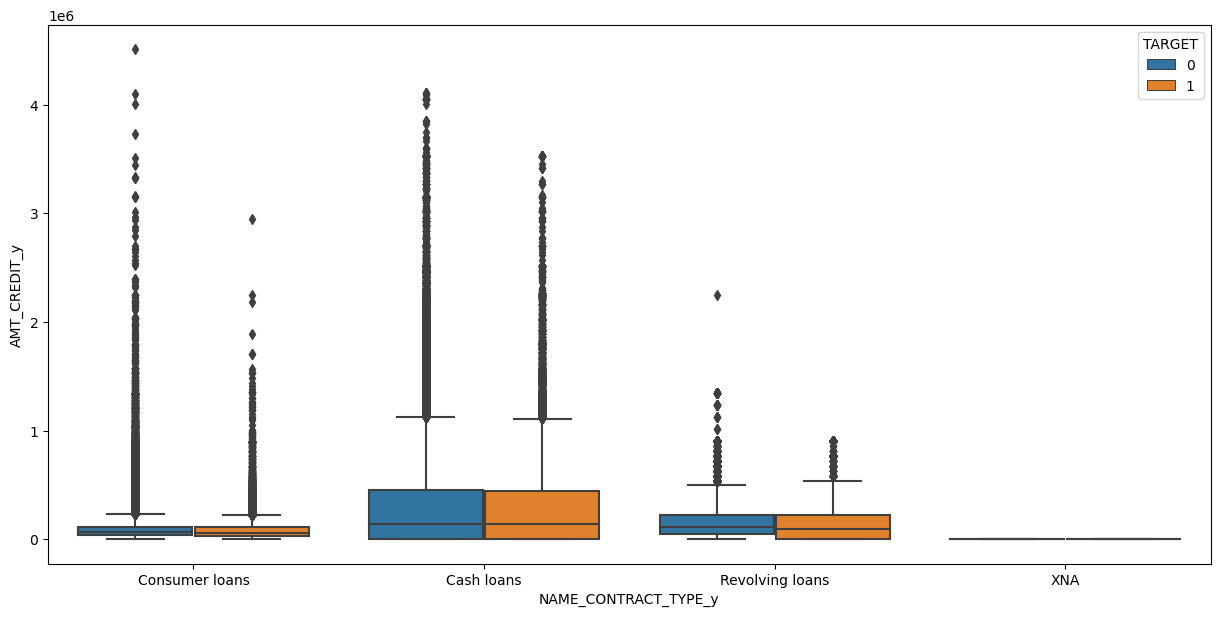

In [137]:
# BoxPlots for NAME_CONTRACT_TYPE_y vs AMT_CREDIT_y
NUMCAT_ANALYSIS_Pre("NAME_CONTRACT_TYPE_y", "AMT_CREDIT_y")

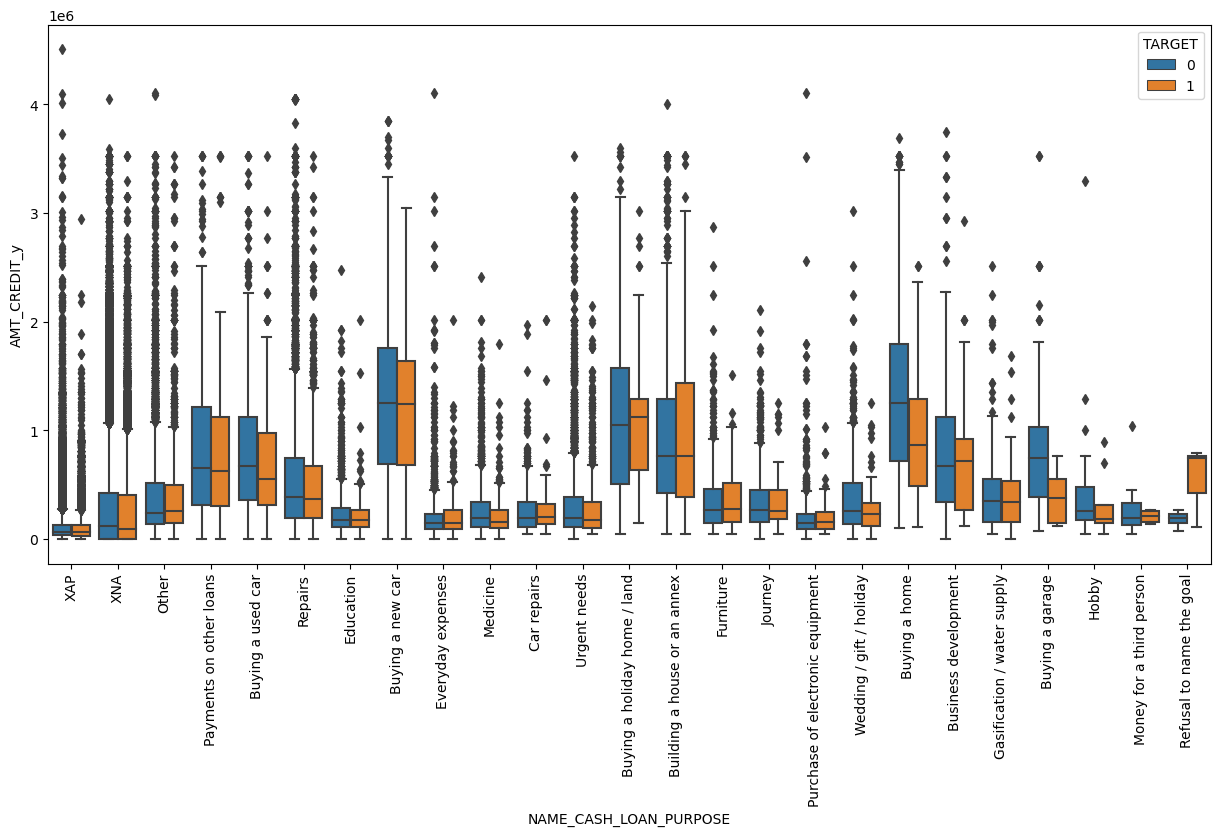

In [138]:
# BoxPlots for NAME_CASH_LOAN_PURPOSE vs AMT_CREDIAMT_CREDIT_y
NUMCAT_ANALYSIS_Pre("NAME_CASH_LOAN_PURPOSE", "AMT_CREDIT_y", rot = True)

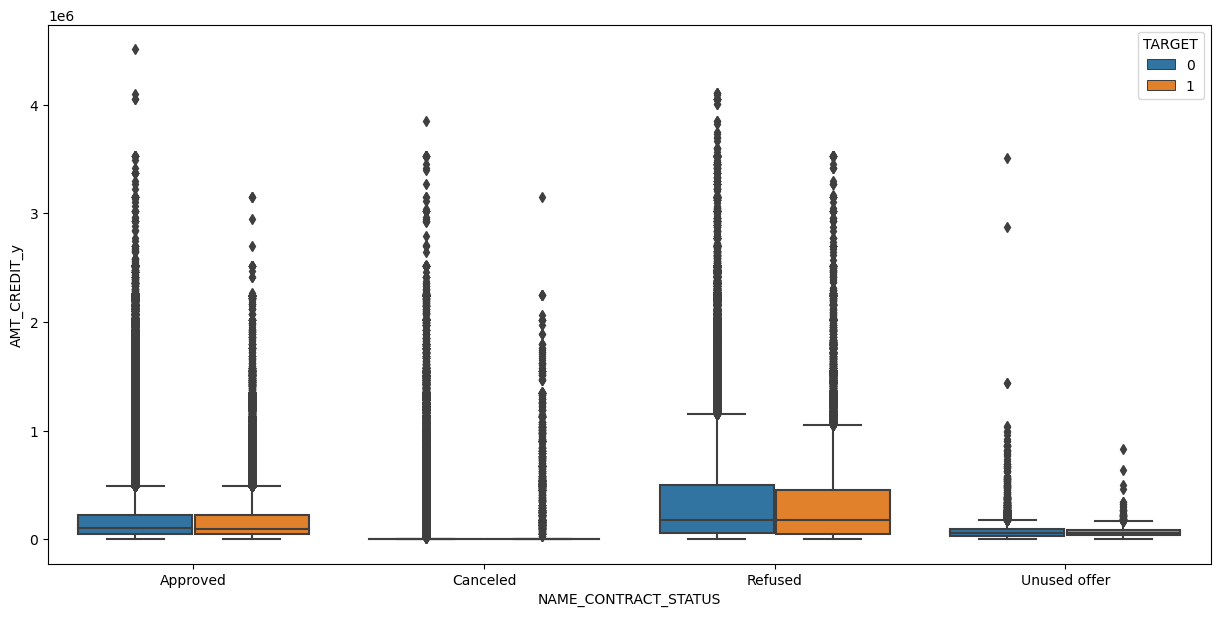

In [139]:
# BoxPlots for NAME_CONTRACT_STATUS vs AMT_CREDIT_y
NUMCAT_ANALYSIS_Pre("NAME_CONTRACT_STATUS", "AMT_CREDIT_y")

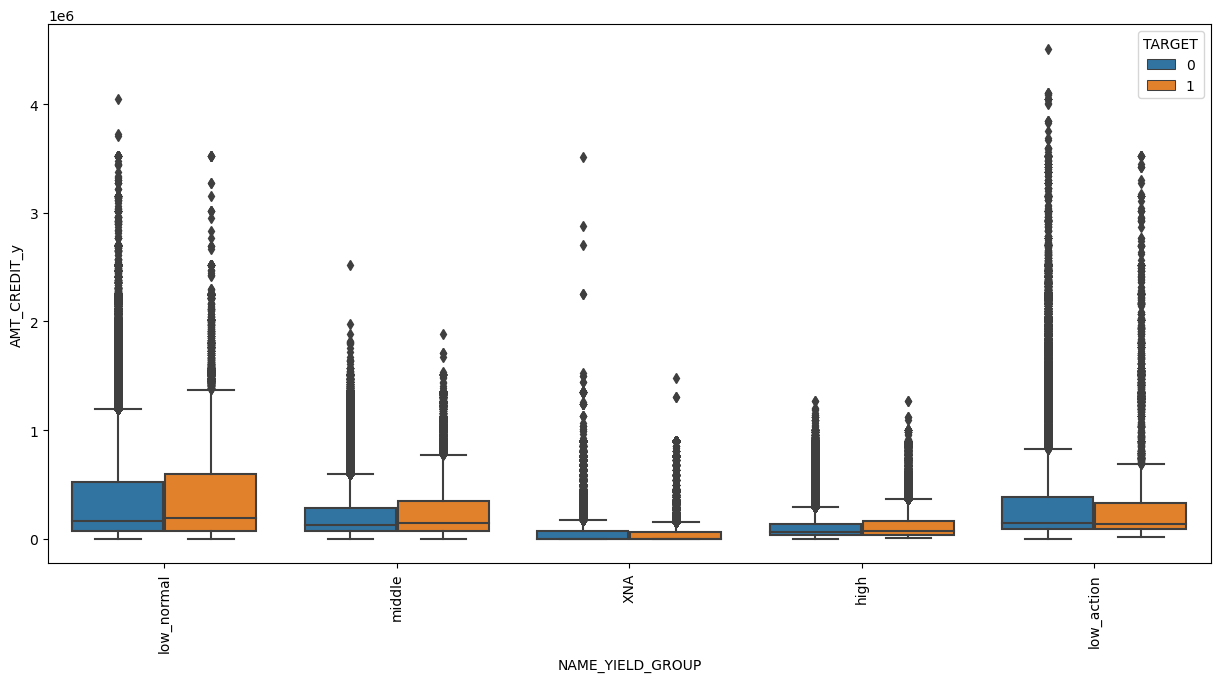

In [140]:
# BoxPlots for NAME_YIELD_GROUP vs AMT_CRAMT_CREDIT_yEDIT
NUMCAT_ANALYSIS_Pre("NAME_YIELD_GROUP", "AMT_CREDIT_y", rot = True)

In [141]:
# Creating a list of important categorical variables
LIST_P = ["NAME_CONTRACT_TYPE_x", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY","NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "NAME_CLIENT_TYPE","NAME_YIELD_GROUP","CNT_CHILDREN"]

In [142]:
# Defining a function to analyse "NAME_CONTRACT_STATUS" against the categorical variables.
def CAT_CAT_ANALYSIS_Prev(LIST_P, rot = False):
    for i in range(1, len(LIST_P)):
        res = pd.pivot_table(data = merged_data, index = LIST_P[i], columns= 'NAME_CONTRACT_STATUS', values = "TARGET")
        plt.figure(figsize=[20,100])
        plt.subplot(len(LIST_P), 1, i)
        plt.subplots_adjust(hspace= 0.5)
        sns.heatmap(data = res, annot = True, cmap = "coolwarm")
        if rot:
            plt.xticks(rotation = 90)
        plt.show()

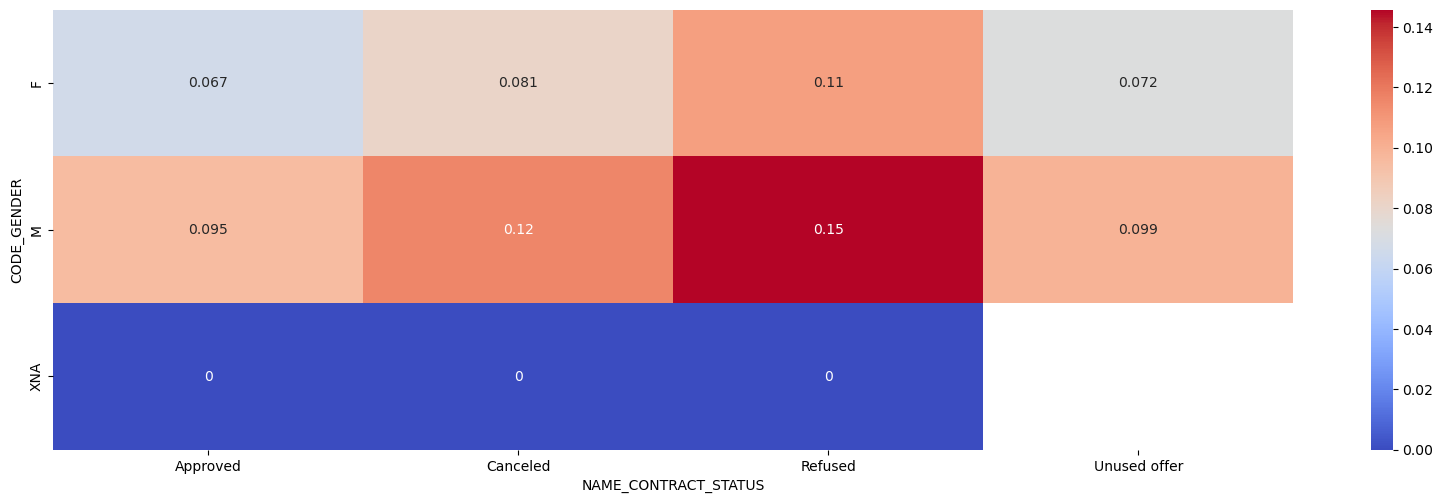

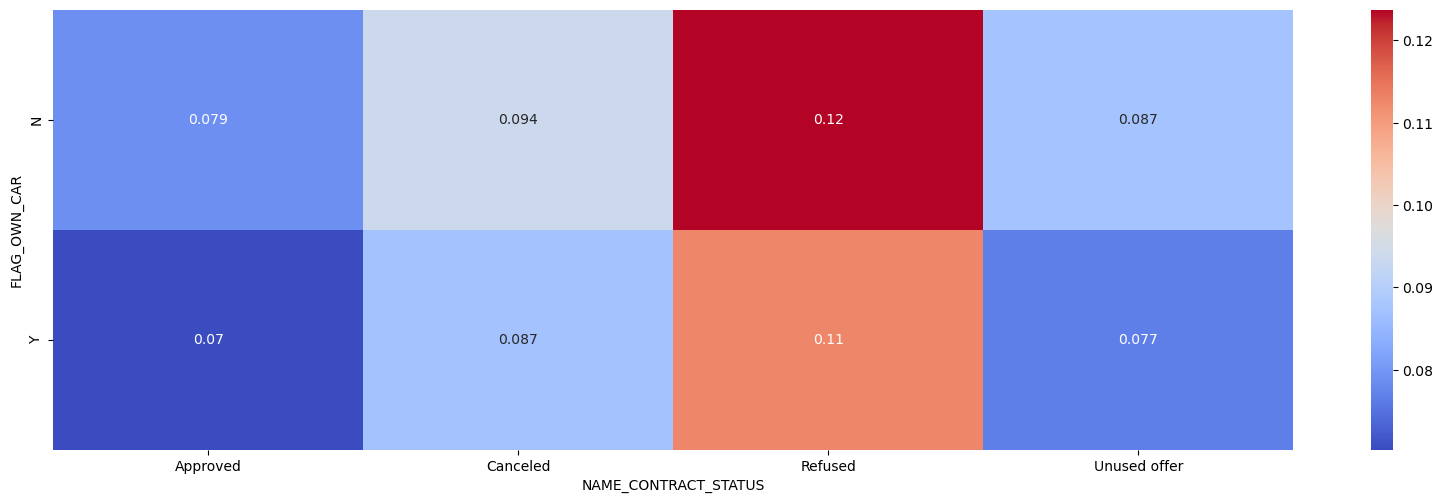

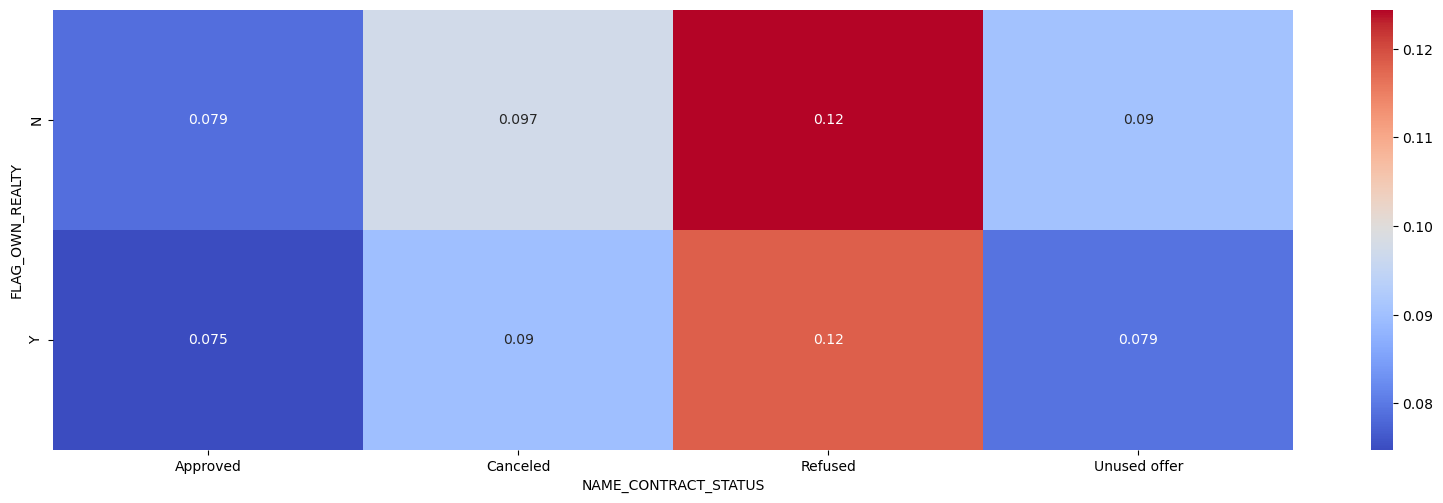

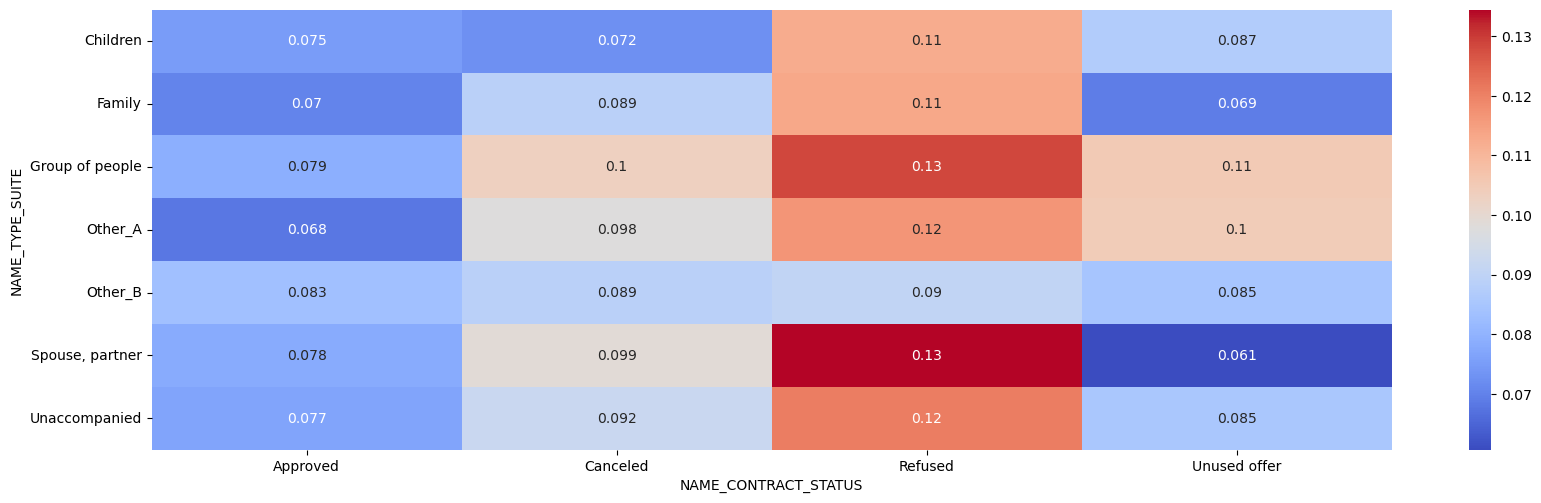

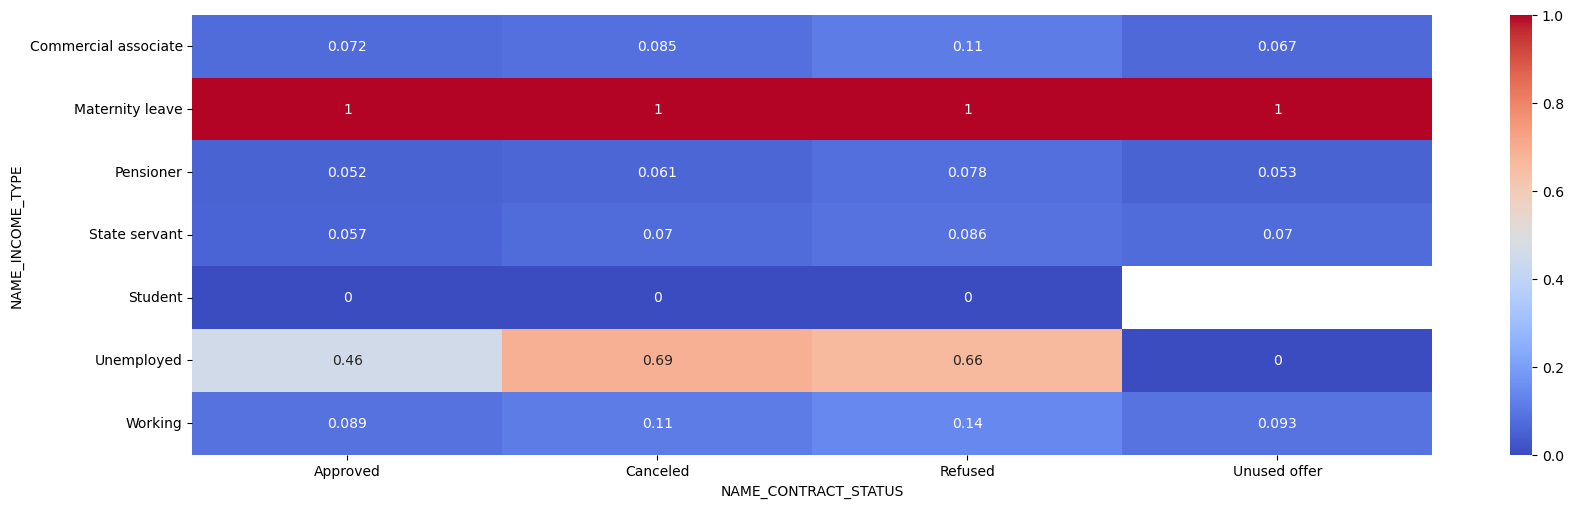

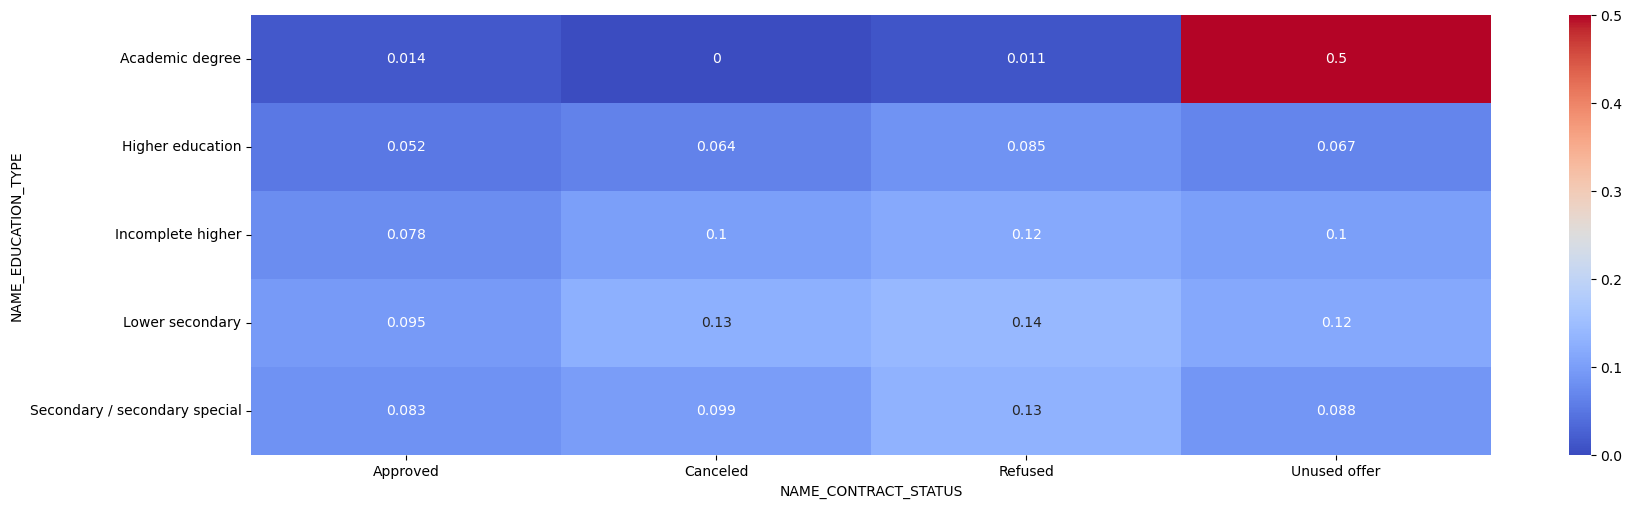

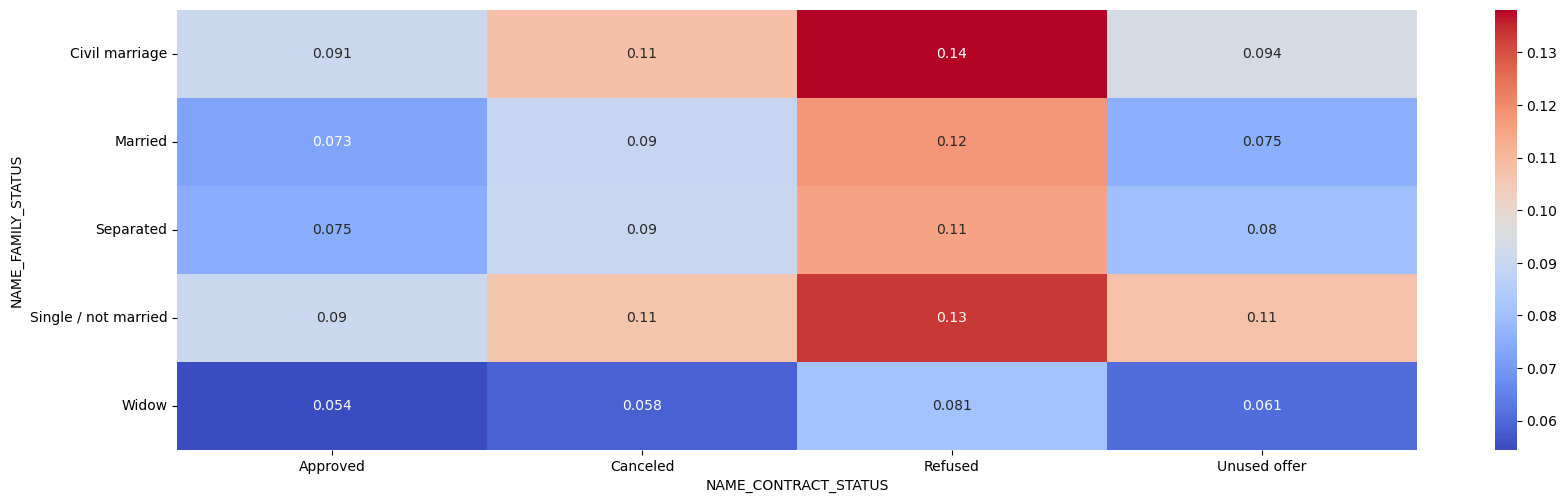

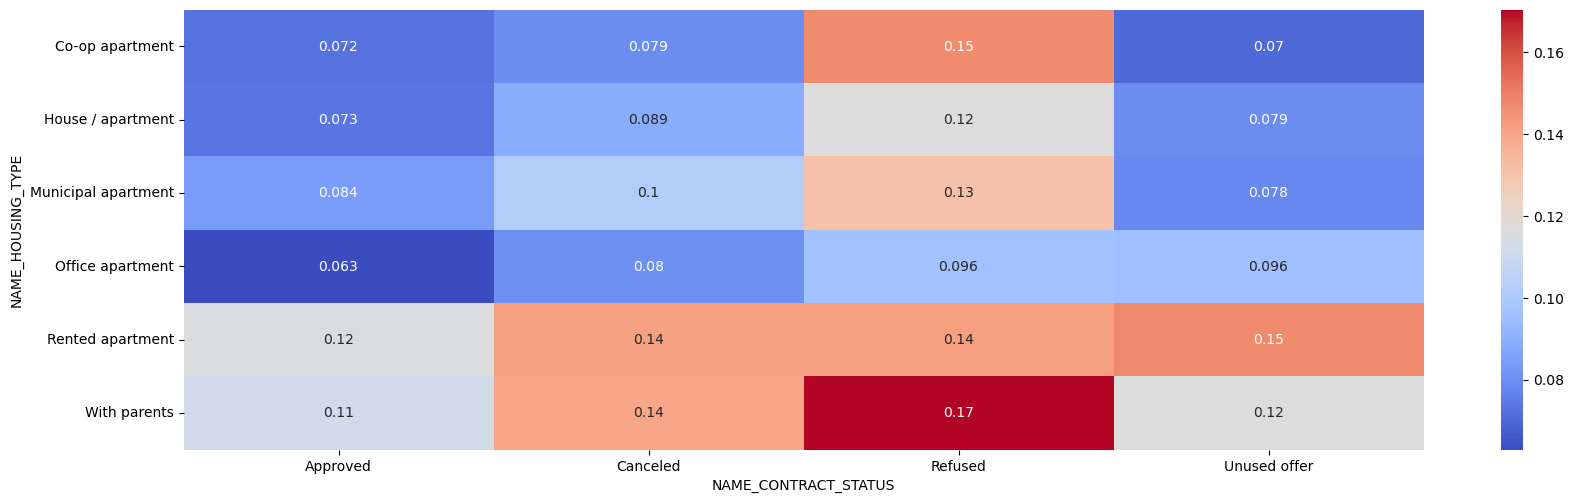

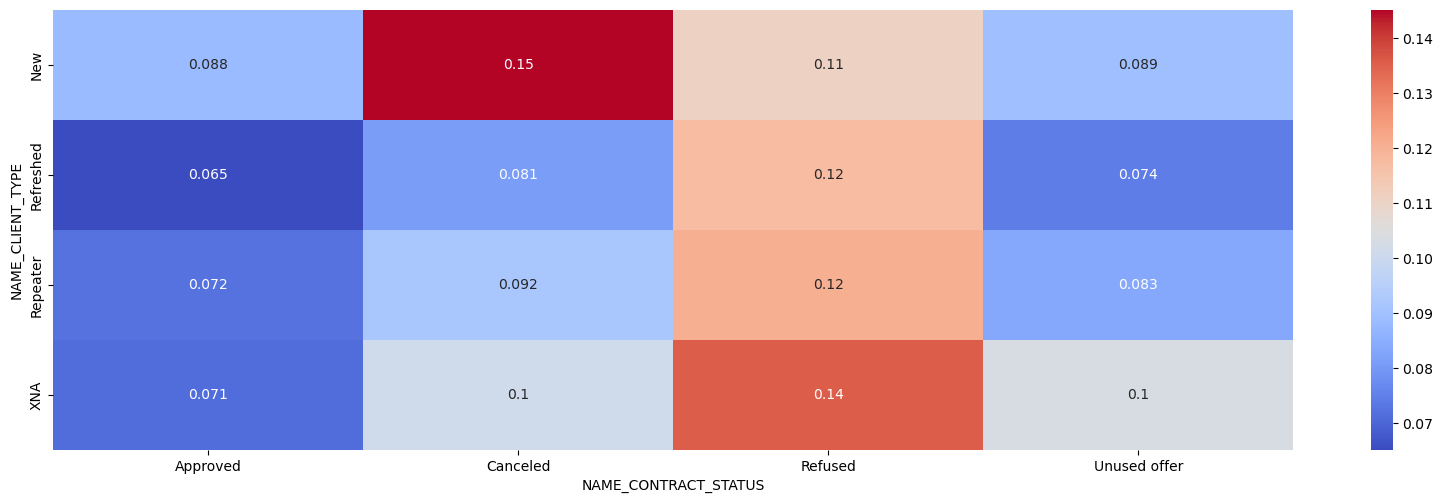

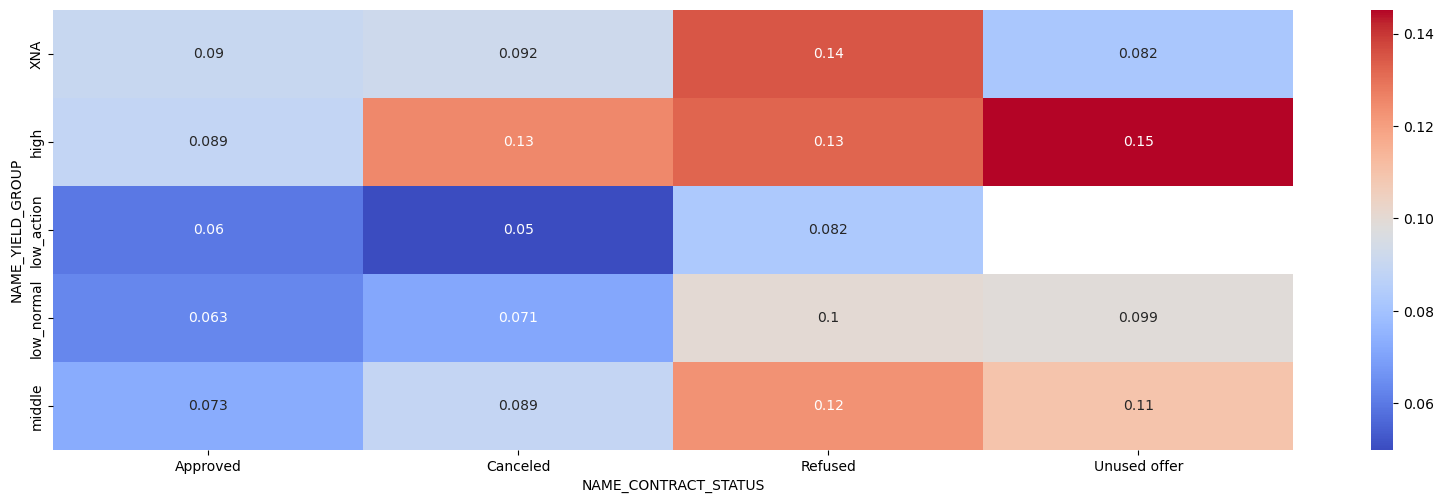

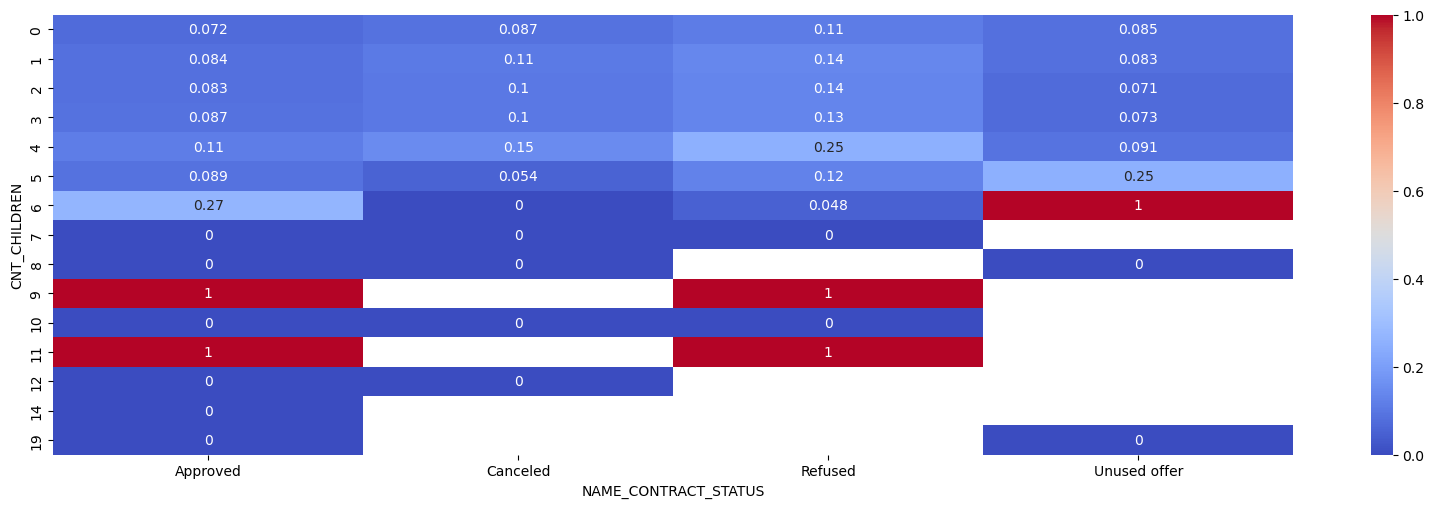

In [143]:
CAT_CAT_ANALYSIS_Prev(LIST_P)

# We have plotted the above heatmaps to analyse the contract status which is available in previous data against important categorical variables, following are the inferences
1.A male client whose contract status is Refused is more likely to default.
2.In general clients whose contract status is refused is more likely to default.
3.Clients who are on maternity leave are more likely to default irrespective of Contract status
4.Unemployed clients whose contract status is refused or cancelled are more likely to default.
5.Clients who have an academic degree whose contract status is unused offer are more likely to default.
6.Clients whose contract status is Refused are more liekly to default irrespective of family status, except widows.
7.Clients who are staying with parents whose contract status is refused are more likely to default.
8.New clients having contract status 'Cancelled' are more likely to default.
9.Clients who have high interest rate for their loans and having contract status 'Unused offer' are more likely to default.
10.The clients with 6 children and unused offer are most likely to default, as we saw before the clients with 9 or 11 children have the highest default rate.
11.Clients who have more number of children are more likely to default irespective of contract status.
12.Clients who are Realty agents and accompanied by a group of people while applying for the loan are most likely to default.

# Conclusions: